In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the display bars longer and spread out 100% across the screen width

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 8)

#import xarray as xr
import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages

!whoami
!date

beatrixh
Fri Jun 18 15:32:45 PDT 2021


# 2.0: WASTING (cause validation)

In [3]:
%cd /ihme/costeffectiveness/results/vivarium_ciff_sam/v2.0_wasting/ciff_sam/2021_06_15_09_14_56/count_data
%ls

/ihme/costeffectiveness/results/vivarium_ciff_sam/v2.0_wasting/ciff_sam/2021_06_15_09_14_56/count_data
deaths.csv                     population.csv                 ylds.csv
deaths.hdf                     population.hdf                 ylds.hdf
disease_state_person_time.csv  wasting_state_person_time.csv  ylls.csv
disease_state_person_time.hdf  wasting_state_person_time.hdf  ylls.hdf
disease_transition_count.csv   wasting_transition_count.csv
disease_transition_count.hdf   wasting_transition_count.hdf


In [4]:
# mkdir /home/j/Project/simulation_science/ciff_malnutrition/verification_and_validation/v2.0_wasting/

In [5]:
master_dir = '/home/j/Project/simulation_science/ciff_malnutrition/'
sim_result_dir = '/ihme/costeffectiveness/results/vivarium_ciff_sam/v2.0_wasting/ciff_sam/2021_06_15_09_14_56/count_data/'
output_dir = master_dir + f'verification_and_validation/v2.0_wasting/'

In [6]:
deaths_explore = pd.read_csv(sim_result_dir + 'deaths.csv')
deaths_explore.cause.unique()

array(['diarrheal_diseases', 'lower_respiratory_infections', 'measles',
       'other_causes'], dtype=object)

In [7]:
deaths_explore.input_draw.nunique()

12

In [8]:
deaths_explore.input_draw.unique()

array([ 29, 223, 232, 357, 394, 524, 602, 629, 650, 680, 829, 946])

In [9]:
deaths_explore.sex.unique()

array(['female', 'male'], dtype=object)

In [10]:
deaths_explore.year.unique()

array([2022, 2023, 2024, 2025, 2026])

In [11]:
#check with rajan how people are born

pt_explore = pd.read_csv(sim_result_dir + 'population.csv')
pt_explore

Unnamed: 0                     measure  input_draw  scenario      value
0            0            total_population          29  baseline  1169038.0
1            1            total_population         223  baseline  1169805.0
2            2            total_population         232  baseline  1168973.0
3            3            total_population         357  baseline  1168712.0
..         ...                         ...         ...       ...        ...
56          56  total_population_untracked         650  baseline        0.0
57          57  total_population_untracked         680  baseline        0.0
58          58  total_population_untracked         829  baseline        0.0
59          59  total_population_untracked         946  baseline        0.0

[60 rows x 5 columns]

In [12]:
pt_explore.groupby('measure').sum()

Unnamed: 0  input_draw       value
measure                                                       
total_population                    66        6095  14028499.0
total_population_dead              210        6095    211266.0
total_population_living            354        6095  13817233.0
total_population_tracked           498        6095  14028499.0
total_population_untracked         642        6095         0.0

In [13]:
# this one is showing sims who are, i.e., infected with diarrheal_diseases, and susceptible_to_child_wasting

disease_pt_explore = pd.read_csv(sim_result_dir + 'disease_state_person_time.csv')
disease_pt_explore

Unnamed: 0     sex  year                   cause            measure  \
0               0  female  2022      diarrheal_diseases  state_person_time   
1               1  female  2022      diarrheal_diseases  state_person_time   
2               2  female  2022      diarrheal_diseases  state_person_time   
3               3  female  2022      diarrheal_diseases  state_person_time   
...           ...     ...   ...                     ...                ...   
11516       11516    male  2026  susceptible_to_measles  state_person_time   
11517       11517    male  2026  susceptible_to_measles  state_person_time   
11518       11518    male  2026  susceptible_to_measles  state_person_time   
11519       11519    male  2026  susceptible_to_measles  state_person_time   

       input_draw  scenario         value                 wasting_state  \
0              29  baseline      4.495551  susceptible_to_child_wasting   
1              29  baseline      0.110883            mild_child_wasting   
2              29  baseline      0.080767   moderate_acute_malnutrition   
3              29  baseline      0.019165     severe_acute_malnutrition   
...           ...       ...           ...                           ...   
11516         946  baseline  57692.067077  susceptible_to_child_wasting   
11517         946  baseline   7459.281314            mild_child_wasting   
11518         946  baseline   3568.436687   moderate_acute_malnutrition   
11519         946  baseline   1123.259411     severe_acute_malnutrition   

                  age  
0      early_neonatal  
1      early_neonatal  
2      early_neonatal  
3      early_neonatal  
...               ...  
11516          1_to_4  
11517          1_to_4  
11518          1_to_4  
11519          1_to_4  

[11520 rows x 10 columns]

In [14]:
disease_pt_explore.cause.unique()

array(['diarrheal_diseases', 'lower_respiratory_infections', 'measles',
       'susceptible_to_diarrheal_diseases',
       'susceptible_to_lower_respiratory_infections',
       'susceptible_to_measles'], dtype=object)

In [15]:
disease_pt_explore.wasting_state.unique()

array(['susceptible_to_child_wasting', 'mild_child_wasting',
       'moderate_acute_malnutrition', 'severe_acute_malnutrition'],
      dtype=object)

In [16]:
# looks like all 4x6 unique combos
disease_pt_explore[['cause','wasting_state']].drop_duplicates()

cause                 wasting_state
0        diarrheal_diseases  susceptible_to_child_wasting
1        diarrheal_diseases            mild_child_wasting
2        diarrheal_diseases   moderate_acute_malnutrition
3        diarrheal_diseases     severe_acute_malnutrition
..                      ...                           ...
960  susceptible_to_measles  susceptible_to_child_wasting
961  susceptible_to_measles            mild_child_wasting
962  susceptible_to_measles   moderate_acute_malnutrition
963  susceptible_to_measles     severe_acute_malnutrition

[24 rows x 2 columns]

In [17]:
# and then this one is just time spend in each wasting state, not stratified on cause?

wasting_pt_explore = pd.read_csv(sim_result_dir + 'wasting_state_person_time.csv')
wasting_pt_explore

Unnamed: 0     sex  year                         cause  \
0              0  female  2022            mild_child_wasting   
1              1  female  2022            mild_child_wasting   
2              2  female  2022            mild_child_wasting   
3              3  female  2022            mild_child_wasting   
...          ...     ...   ...                           ...   
1916        1916    male  2026  susceptible_to_child_wasting   
1917        1917    male  2026  susceptible_to_child_wasting   
1918        1918    male  2026  susceptible_to_child_wasting   
1919        1919    male  2026  susceptible_to_child_wasting   

                measure  input_draw  scenario         value             age  
0     state_person_time          29  baseline      4.475017  early_neonatal  
1     state_person_time          29  baseline     61.364819   late_neonatal  
2     state_person_time          29  baseline  11435.232033   post_neonatal  
3     state_person_time          29  baseline  89900.190281          1_to_4  
...                 ...         ...       ...           ...             ...  
1916  state_person_time         946  baseline    325.637235  early_neonatal  
1917  state_person_time         946  baseline    961.295003   late_neonatal  
1918  state_person_time         946  baseline  15372.772074   post_neonatal  
1919  state_person_time         946  baseline  91286.637919          1_to_4  

[1920 rows x 9 columns]

In [18]:
wasting_pt_explore.cause.unique()

array(['mild_child_wasting', 'moderate_acute_malnutrition',
       'severe_acute_malnutrition', 'susceptible_to_child_wasting'],
      dtype=object)

In [19]:
# shouldn't these be the same?
disease_pt_explore.loc[
    (disease_pt_explore.cause.isin(['diarrheal_diseases','susceptible_to_diarrheal_diseases']))
].value.sum(), wasting_pt_explore.value.sum()

(22186429.864476383, 35234224.11362082)

In [20]:
# these are the same... why isn't sum(disease)/3 == sum(wasting)?

id_cols = ['sex','year','age']
disease_pt_explore[id_cols].drop_duplicates().shape, wasting_pt_explore[id_cols].drop_duplicates().shape

((40, 3), (40, 3))

In [21]:
disease_transition_explore = pd.read_csv(sim_result_dir + 'disease_transition_count.csv')
disease_transition_explore

Unnamed: 0     sex  year  \
0               0  female  2022   
1               1  female  2022   
2               2  female  2022   
3               3  female  2022   
...           ...     ...   ...   
11516       11516    male  2026   
11517       11517    male  2026   
11518       11518    male  2026   
11519       11519    male  2026   

                                                 measure  input_draw  \
0      diarrheal_diseases_to_susceptible_to_diarrheal...          29   
1      diarrheal_diseases_to_susceptible_to_diarrheal...          29   
2      diarrheal_diseases_to_susceptible_to_diarrheal...          29   
3      diarrheal_diseases_to_susceptible_to_diarrheal...          29   
...                                                  ...         ...   
11516      susceptible_to_measles_to_measles_event_count         946   
11517      susceptible_to_measles_to_measles_event_count         946   
11518      susceptible_to_measles_to_measles_event_count         946   
11519      susceptible_to_measles_to_measles_event_count         946   

       scenario  value                 wasting_state             age  
0      baseline  263.0  susceptible_to_child_wasting  early_neonatal  
1      baseline    2.0            mild_child_wasting  early_neonatal  
2      baseline    0.0   moderate_acute_malnutrition  early_neonatal  
3      baseline    0.0     severe_acute_malnutrition  early_neonatal  
...         ...    ...                           ...             ...  
11516  baseline  234.0  susceptible_to_child_wasting          1_to_4  
11517  baseline   39.0            mild_child_wasting          1_to_4  
11518  baseline   46.0   moderate_acute_malnutrition          1_to_4  
11519  baseline   44.0     severe_acute_malnutrition          1_to_4  

[11520 rows x 9 columns]

In [22]:
disease_transition_explore.measure.unique()

array(['diarrheal_diseases_to_susceptible_to_diarrheal_diseases_event_count',
       'lower_respiratory_infections_to_susceptible_to_lower_respiratory_infections_event_count',
       'measles_to_susceptible_to_measles_event_count',
       'susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count',
       'susceptible_to_lower_respiratory_infections_to_lower_respiratory_infections_event_count',
       'susceptible_to_measles_to_measles_event_count'], dtype=object)

In [23]:
wasting_transition_explore = pd.read_csv(sim_result_dir + 'wasting_transition_count.csv')
wasting_transition_explore

Unnamed: 0     sex  year  \
0              0  female  2022   
1              1  female  2022   
2              2  female  2022   
3              3  female  2022   
...          ...     ...   ...   
2876        2876    male  2026   
2877        2877    male  2026   
2878        2878    male  2026   
2879        2879    male  2026   

                                                measure  input_draw  scenario  \
0     mild_child_wasting_to_moderate_acute_malnutrit...          29  baseline   
1     mild_child_wasting_to_moderate_acute_malnutrit...          29  baseline   
2     mild_child_wasting_to_moderate_acute_malnutrit...          29  baseline   
3     mild_child_wasting_to_moderate_acute_malnutrit...          29  baseline   
...                                                 ...         ...       ...   
2876  susceptible_to_child_wasting_to_mild_child_was...         946  baseline   
2877  susceptible_to_child_wasting_to_mild_child_was...         946  baseline   
2878  susceptible_to_child_wasting_to_mild_child_was...         946  baseline   
2879  susceptible_to_child_wasting_to_mild_child_was...         946  baseline   

      value             age  
0       0.0  early_neonatal  
1       0.0   late_neonatal  
2      24.0   post_neonatal  
3     275.0          1_to_4  
...     ...             ...  
2876    0.0  early_neonatal  
2877    0.0   late_neonatal  
2878    1.0   post_neonatal  
2879    0.0          1_to_4  

[2880 rows x 8 columns]

In [24]:
# yep this is everything expected
wasting_transition_explore.measure.unique()

array(['mild_child_wasting_to_moderate_acute_malnutrition_event_count',
       'mild_child_wasting_to_susceptible_to_child_wasting_event_count',
       'moderate_acute_malnutrition_to_mild_child_wasting_event_count',
       'moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count',
       'severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count',
       'susceptible_to_child_wasting_to_mild_child_wasting_event_count'],
      dtype=object)

# Sim results

In [25]:
def load_sim_count_data(sim_result_dir: str):
    columns = ['age', 'sex', 'year', 'input_draw', 'scenario', 'measure']
    df = {}
    fnames = ['deaths', 'disease_transition_count', 'wasting_transition_count',
              'disease_state_person_time', 'wasting_state_person_time']
    for fname in fnames:
        df[fname] = pd.read_csv(sim_result_dir + fname + '.csv', index_col=0)
        # get aggregated results if stratifications exist
        if 'cause' in df[fname].columns:
            df[fname] = df[fname].groupby(columns + ['cause']).value.sum().reset_index()
        else:
            df[fname] = df[fname].groupby(columns).value.sum().reset_index()
    return df

In [26]:
df = load_sim_count_data(sim_result_dir)

### DEATH counts 

In [27]:
#deaths

deaths_count_dd = df['deaths'].query('cause == "diarrheal_diseases"')
deaths_count_lri = df['deaths'].query('cause == "lower_respiratory_infections"')
deaths_count_msls = df['deaths'].query('cause == "measles"')
deaths_count_others = df['deaths'].query('cause == "other_causes"')

total_deaths_count = (df['deaths']
                     .groupby(['age', 'sex', 'year', 'input_draw', 'scenario', 'measure'])
                     .value.sum()
                     .reset_index())

total_deaths_count['cause'] = 'all_causes'

### cause incidence counts

In [28]:
df['disease_transition_count'].measure.unique()

array(['diarrheal_diseases_to_susceptible_to_diarrheal_diseases_event_count',
       'lower_respiratory_infections_to_susceptible_to_lower_respiratory_infections_event_count',
       'measles_to_susceptible_to_measles_event_count',
       'susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count',
       'susceptible_to_lower_respiratory_infections_to_lower_respiratory_infections_event_count',
       'susceptible_to_measles_to_measles_event_count'], dtype=object)

In [29]:
#incidence counts 

#incident cases of diarrheal diseases: S to diarrhea
incidence_dd_count = (df['disease_transition_count'].query('measure == "susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count"'))
incidence_dd_count['cause'] = 'diarrheal_disease'
incidence_dd_count['measure'] = 'incidence'

#incident cases of lri: S to LRI
incidence_lri_count = (df['disease_transition_count'].query('measure == "susceptible_to_lower_respiratory_infections_to_lower_respiratory_infections_event_count"'))
incidence_lri_count['cause'] = 'lri'
incidence_lri_count['measure'] = 'incidence'

#incident cases of lri: S to measles
incidence_msls_count = (df['disease_transition_count'].query('measure == "susceptible_to_measles_to_measles_event_count"'))
incidence_msls_count['cause'] = 'measles'
incidence_msls_count['measure'] = 'incidence'


In [30]:
# remission counts 

#incident cases of diarrheal diseases: S to diarrhea
remission_dd_count = (df['disease_transition_count']
                      .query('measure == "diarrheal_diseases_to_susceptible_to_diarrheal_diseases_event_count"'))
remission_dd_count['cause'] = 'diarrheal_disease'
remission_dd_count['measure'] = 'remission'

#incident cases of lri: S to LRIb
remission_lri_count = (df['disease_transition_count']
                      .query('measure == "lower_respiratory_infections_to_susceptible_to_lower_respiratory_infections_event_count"'))
remission_lri_count['cause'] = 'lri'
remission_lri_count['measure'] = 'remission'

#incident cases of lri: S to measles
remission_msls_count = (df['disease_transition_count']
                      .query('measure == "measles_to_susceptible_to_measles_event_count"'))
remission_msls_count['cause'] = 'measles'
remission_msls_count['measure'] = 'remission'


### disease state person-time

In [31]:
df['disease_state_person_time'].cause.unique()

array(['diarrheal_diseases', 'lower_respiratory_infections', 'measles',
       'susceptible_to_diarrheal_diseases',
       'susceptible_to_lower_respiratory_infections',
       'susceptible_to_measles'], dtype=object)

In [32]:
person_time_dd = df['disease_state_person_time'].query('cause == "diarrheal_diseases"')
person_time_lri = df['disease_state_person_time'].query('cause == "lower_respiratory_infections"')
person_time_msls = df['disease_state_person_time'].query('cause == "measles"')

person_time_sus_dd = df['disease_state_person_time'].query('cause == "susceptible_to_diarrheal_diseases"')
person_time_sus_lri = df['disease_state_person_time'].query('cause == "susceptible_to_lower_respiratory_infections"')
person_time_sus_msls = df['disease_state_person_time'].query('cause == "susceptible_to_measles"')

#person_time_pc['measure'] = 'prevalence'
#person_time_c['measure'] = 'prevalence'

In [36]:
## add total person time
df['person_time'] = df['disease_state_person_time'].loc[
    df['disease_state_person_time'].cause.isin(['diarrheal_diseases','susceptible_to_diarrheal_diseases'])
].groupby(['age','sex','year','input_draw','scenario','measure']).sum().reset_index()

df['person_time']['cause'] = 'all_causes'

In [37]:
def get_measure(data: pd.DataFrame):
    """
    rate per PY among source population
    note the numerator is 'data' and denominator is df['person_time']
    """
    
    result = ((data
               .set_index(['age', 'sex', 'year', 'input_draw', 'scenario', 'measure', 'cause'])
               .div(df['person_time'].drop(columns=['measure','cause'])
                    .set_index(['age', 'sex', 'year', 'input_draw', 'scenario'])))
              .reset_index())
    
    result['age_group'] = np.where(result['age'] == 'early_neonatal', 1,
                              np.where(result['age'] == 'late_neonatal', 2,
                                       np.where(result['age'] == 'post_neonatal',3,
                                        4)))
    
    result_summary = (result
                      .groupby(['age_group', 'sex', 'year', 'scenario', 'measure', 'cause'])
                      .value.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
    
    return result_summary

### ACMR and CSMR

In [38]:
# deaths acmr + csmr

acmr = get_measure(total_deaths_count)
deaths_dd = get_measure(deaths_count_dd)
deaths_lri = get_measure(deaths_count_lri)
deaths_msls = get_measure(deaths_count_msls)
deaths_other = get_measure(deaths_count_others)

In [39]:
deaths_dd.head()

age_group     sex  year  scenario measure               cause      mean  \
0          1  female  2022  baseline   death  diarrheal_diseases  0.005348   
1          1  female  2023  baseline   death  diarrheal_diseases  0.006909   
2          1  female  2024  baseline   death  diarrheal_diseases  0.006922   
3          1  female  2025  baseline   death  diarrheal_diseases  0.011367   
4          1  female  2026  baseline   death  diarrheal_diseases  0.007341   

       2.5%     97.5%  
0  0.000000  0.012434  
1  0.000000  0.021636  
2  0.000000  0.023250  
3  0.001345  0.025213  
4  0.000000  0.018243

# PREVALENCE
#### 'prevalence' = 'infected_person_time' / 'person_time'


In [40]:
df['person_time'].age.nunique() * \
df['person_time'].sex.nunique() * \
df['person_time'].year.nunique() * \
df['person_time'].input_draw.nunique()


480

In [41]:
person_time_dd.shape, df['person_time'].shape

((480, 8), (480, 8))

In [42]:
#denominator

df['person_time'].head() #480 rows

age     sex  year  input_draw  scenario            measure  \
0  1_to_4  female  2022          29  baseline  state_person_time   
1  1_to_4  female  2022         223  baseline  state_person_time   
2  1_to_4  female  2022         232  baseline  state_person_time   
3  1_to_4  female  2022         357  baseline  state_person_time   
4  1_to_4  female  2022         394  baseline  state_person_time   

           value       cause  
0  245011.952088  all_causes  
1  244860.366872  all_causes  
2  246279.679671  all_causes  
3  245254.436687  all_causes  
4  243542.413415  all_causes

In [43]:
# cause prevalence
prevalence_dd = get_measure(person_time_dd)
prevalence_lri = get_measure(person_time_lri)
prevalence_msls = get_measure(person_time_msls)

# CAUSE INCIDENCE 

In [44]:
#numerator: incidence_{cause}_count
incidence_dd_count
incidence_lri_count
incidence_msls_count

age     sex  year  input_draw  scenario    measure   value  \
5            1_to_4  female  2022          29  baseline  incidence  2317.0   
11           1_to_4  female  2022         223  baseline  incidence  4195.0   
17           1_to_4  female  2022         232  baseline  incidence  4868.0   
23           1_to_4  female  2022         357  baseline  incidence  3007.0   
...             ...     ...   ...         ...       ...        ...     ...   
2861  post_neonatal    male  2026         650  baseline  incidence   179.0   
2867  post_neonatal    male  2026         680  baseline  incidence    64.0   
2873  post_neonatal    male  2026         829  baseline  incidence   316.0   
2879  post_neonatal    male  2026         946  baseline  incidence    62.0   

        cause  
5     measles  
11    measles  
17    measles  
23    measles  
...       ...  
2861  measles  
2867  measles  
2873  measles  
2879  measles  

[480 rows x 8 columns]

In [45]:
incidence_msls_count.age.unique()

array(['1_to_4', 'early_neonatal', 'late_neonatal', 'post_neonatal'],
      dtype=object)

In [46]:
#denominator
person_time_sus_dd = df['disease_state_person_time'].query('cause == "susceptible_to_diarrheal_diseases"')
person_time_sus_lri = df['disease_state_person_time'].query('cause == "susceptible_to_lower_respiratory_infections"')
person_time_sus_msls = df['disease_state_person_time'].query('cause == "susceptible_to_measles"')


In [47]:
def get_transition(data_numerator: pd.DataFrame, data_denominator: pd.DataFrame):
    # rate per PY among source population
    
    result = (data_numerator.set_index(['age', 'sex', 'year', 'input_draw', 'scenario', 'measure', 'cause'])
              .div(data_denominator.drop(columns='measure').drop(columns='cause').set_index(['age', 'sex', 'year', 'input_draw', 'scenario']))
              .reset_index())
    
    result['age_group'] = np.where(result['age'] == 'early_neonatal', 1,
                              np.where(result['age'] == 'late_neonatal', 2,
                                       np.where(result['age'] == 'post_neonatal',3,
                                        4)))
    
    result_summary = (result
                      .groupby(['age_group','sex', 'year', 'scenario', 'measure','cause'])
                      .value.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
    
    return result_summary

In [48]:
# incidence
incidence_dd = get_transition(incidence_dd_count, person_time_sus_dd)
incidence_lri = get_transition(incidence_lri_count, person_time_sus_lri )
incidence_msls = get_transition(incidence_msls_count, person_time_sus_msls)

In [49]:
incidence_msls.head()

age_group     sex  year  scenario    measure    cause  mean  2.5%  97.5%
0          1  female  2022  baseline  incidence  measles   0.0   0.0    0.0
1          1  female  2023  baseline  incidence  measles   0.0   0.0    0.0
2          1  female  2024  baseline  incidence  measles   0.0   0.0    0.0
3          1  female  2025  baseline  incidence  measles   0.0   0.0    0.0
4          1  female  2026  baseline  incidence  measles   0.0   0.0    0.0

In [50]:
incidence_msls.age_group.unique()

array([1, 2, 3, 4])

# CAUSE REMISSION

In [51]:
# remission
remission_dd = get_transition(remission_dd_count, person_time_dd)
remission_lri = get_transition(remission_lri_count, person_time_lri )
remission_msls = get_transition(remission_msls_count, person_time_msls)

In [52]:
remission_msls.head()

age_group     sex  year  scenario    measure    cause  mean  2.5%  97.5%
0          1  female  2022  baseline  remission  measles   NaN   NaN    NaN
1          1  female  2023  baseline  remission  measles   NaN   NaN    NaN
2          1  female  2024  baseline  remission  measles   NaN   NaN    NaN
3          1  female  2025  baseline  remission  measles   NaN   NaN    NaN
4          1  female  2026  baseline  remission  measles   NaN   NaN    NaN

# EXCESS MORTALITY RATE
#### 'excess_mortality_rate' = 'deaths from cause' / 'infected_person_time'

In [53]:
def get_emr(data_numerator: pd.DataFrame, data_denominator: pd.DataFrame):
    # rate per PY among source population
    
    result = (data_numerator.set_index(['age', 'sex', 'year', 'input_draw', 'scenario', 'measure', 'cause'])
              .div(data_denominator.drop(columns='measure').drop(columns='cause').set_index(['age', 'sex', 'year', 'input_draw', 'scenario']))
              .reset_index())
    
    #print(data_numerator)
    #print(data_denominator)
    
    result['age_group'] = np.where(result['age'] == 'early_neonatal', 1,
                              np.where(result['age'] == 'late_neonatal', 2,
                                       np.where(result['age'] == 'post_neonatal',3,
                                        4)))
    
    result_summary = (result
                      .groupby(['age_group', 'sex', 'year', 'scenario', 'measure','cause'])
                      .value.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
    
    return result_summary

In [54]:
emr_dd = get_emr(deaths_count_dd, person_time_dd)
emr_lri = get_emr(deaths_count_lri, person_time_lri)
emr_msls = get_emr(deaths_count_msls, person_time_msls)

In [55]:
emr_msls.head()

age_group     sex  year  scenario measure    cause  mean  2.5%  97.5%
0          1  female  2022  baseline   death  measles   NaN   NaN    NaN
1          1  female  2023  baseline   death  measles   NaN   NaN    NaN
2          1  female  2024  baseline   death  measles   NaN   NaN    NaN
3          1  female  2025  baseline   death  measles   NaN   NaN    NaN
4          1  female  2026  baseline   death  measles   NaN   NaN    NaN

In [56]:
emr_msls.age_group.unique()

array([1, 2, 3, 4])

# ARTIFACT

In [57]:
#filepath

%cd /ihme/costeffectiveness/artifacts/vivarium_ciff_sam/
%ls

/ihme/costeffectiveness/artifacts/vivarium_ciff_sam
ethiopia.hdf


In [58]:
from vivarium import Artifact

#explore the artifact data (note age groups)
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf', filter_terms=['year_start == 2019', 'age_start >=  0.076712', f'age_end <= 5'])

In [59]:
#load population structure

art_pop = art.load('population.structure').reset_index()
art_pop

location     sex  age_start  age_end  year_start  year_end         value
0  Ethiopia  Female   0.076712      1.0        2019      2020  1.573806e+06
1  Ethiopia  Female   1.000000      5.0        2019      2020  6.437387e+06
2  Ethiopia    Male   0.076712      1.0        2019      2020  1.651227e+06
3  Ethiopia    Male   1.000000      5.0        2019      2020  6.742224e+06

In [60]:
# define function to load data from artifact for a specified cause and measure
# this function is called in the next function below

def load_artifact_data(cause:str, measure:str):
    master_art_data = pd.DataFrame()
    for i in ['ethiopia']: #in case there are other countries
        art = Artifact('' + i + '.hdf', 
                   filter_terms=['year_start == 2019', 'age_start < 5'])
        data = art.load('cause.' + cause + '.' + measure)
        #data = pd.DataFrame(data.mean(axis=1)).reset_index().rename(columns={0:'value'})
        data = data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).filter(['mean', '2.5%', '97.5%']).reset_index()
        
        #print(data)
        data['location'] = i.capitalize()
        data['measure'] = measure
        data['age'] = 0
        data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', 
                                   np.where(data['age_end'] == 1, 'post_neonatal',
                                            np.where(data['age_start'] == 1, '1_to_4', 
                                                    'late_neonatal')))
        
        data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == 'post_neonatal', 3, 
                                                    4)))
        
        
        data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
   
    master_art_data = master_art_data.append(data)
        
    return master_art_data

# PLOT sim vs artifact

In [61]:
def add_age_midpoint(data: pd.DataFrame, output: str):
    data = data.copy()
    if output == 'sim':
        data['age_midpoint'] = list(map(lambda x, y: y-int(x.split('_to_')[1])+2, data['age'], data['year']))
    else:
        data['age_midpoint'] = data['age_group'].map(lambda x: int(x.split(' ')[0])+2)
    return data

### ART DATA

In [62]:
#ARTIFACT

#mortality
art_acmr = load_artifact_data('all_causes', 'cause_specific_mortality_rate')
art_csmr_dd = load_artifact_data('diarrheal_diseases','cause_specific_mortality_rate')
art_csmr_lri = load_artifact_data('lower_respiratory_infections','cause_specific_mortality_rate')
art_csmr_msls = load_artifact_data('measles','cause_specific_mortality_rate')

#prevalence 
art_prevalence_dd = load_artifact_data('diarrheal_diseases','prevalence')
art_prevalence_lri = load_artifact_data('lower_respiratory_infections','prevalence')
art_prevalence_msls = load_artifact_data('measles','prevalence')

#incidence
art_incidence_dd = load_artifact_data('diarrheal_diseases','incidence_rate')
art_incidence_lri = load_artifact_data('lower_respiratory_infections', 'incidence_rate')
art_incidence_msls = load_artifact_data('measles','incidence_rate')

#remission
art_remission_dd = load_artifact_data('diarrheal_diseases','remission_rate')
art_remission_lri = load_artifact_data('lower_respiratory_infections','remission_rate')
#art_remission_msls = load_artifact_data('measles','remission_rate')

#emr
art_emr_dd = load_artifact_data('diarrheal_diseases','excess_mortality_rate')
art_emr_lri = load_artifact_data('lower_respiratory_infections','excess_mortality_rate')
art_emr_msls = load_artifact_data('measles','excess_mortality_rate')

### SIM DATA 

In [65]:
#SIM

#mortality (5)
acmr = get_measure(total_deaths_count)
acmr['measure'] = 'acmr'
deaths_dd = get_measure(deaths_count_dd)
deaths_dd['measure'] = 'csmr_dd'
deaths_lri = get_measure(deaths_count_lri)
deaths_lri['measure'] = 'csmr_lri'
deaths_msls = get_measure(deaths_count_msls)
deaths_msls['measure'] = 'csmr_msls'
deaths_other = get_measure(deaths_count_others)
deaths_other['measure'] = 'csmr_other'

#CAUSE prevalence (3)
prevalence_dd = get_measure(person_time_dd)
prevalence_dd['measure'] = 'prevalence_dd'
prevalence_lri = get_measure(person_time_lri)
prevalence_lri['measure'] = 'prevalence_lri'
prevalence_msls = get_measure(person_time_msls)
prevalence_msls['measure'] = 'prevalence_msls'

#CAUSE incidence (3)
incidence_dd = get_transition(incidence_dd_count, person_time_sus_dd)
incidence_dd['measure'] = 'incidence_dd'
incidence_lri = get_transition(incidence_lri_count, person_time_sus_lri)
incidence_lri['measure'] = 'incidence_lri'
incidence_msls = get_transition(incidence_msls_count, person_time_sus_msls)
incidence_msls['measure'] = 'incidence_msls'

#CAUSE remission (3)
remission_dd = get_transition(remission_dd_count, person_time_dd)
remission_dd['measure'] = 'remission_dd'
remission_lri = get_transition(remission_lri_count, person_time_lri )
remission_lri['measure'] = 'remission_lri'
remission_msls = get_transition(remission_msls_count, person_time_msls)
remission_msls['measure'] = 'remission_msls'

#emr (3)
emr_dd = get_emr(deaths_count_dd, person_time_dd)
emr_dd['measure'] = 'emr_dd'
emr_lri = get_emr(deaths_count_lri, person_time_lri)
emr_dd['measure'] = 'emr_lri'
emr_msls = get_emr(deaths_count_msls, person_time_msls)
emr_dd['measure'] = 'emr_msls'

In [66]:
def plot_sim_vs_artifact(sim_data: pd.DataFrame, artifact_data: pd.DataFrame, sim_year: int, art_year: int, sex: str, sim_measure: str):
        
        
    ## add age label
    age_labels = {1: 'early_neonatal', 2: 'late_neonatal', 3: 'post_neonatal', 4: '1_to_4'}
    sim_data['age_label'] = sim_data.age_group.map(age_labels)
    artifact_data['age_label'] = artifact_data.age_group.map(age_labels)
    
    sim_sub = sim_data[(sim_data.scenario == 'baseline') & (sim_data.year == sim_year) & (sim_data.sex == sex)]
    artifact_sub = artifact_data[(artifact_data.year_start == art_year) & (artifact_data.sex == sex)]
    
#     fig, ax = plt.subplots() #
    plt.figure(figsize=(6, 4), dpi=120)
    plt.plot(sim_sub['age_group'], sim_sub['mean'], marker='o', label='sim baseline')
    plt.fill_between(sim_sub['age_group'], sim_sub['2.5%'], sim_sub['97.5%'], alpha=.3)
    plt.plot(artifact_sub['age_group'], artifact_sub['mean'], marker='o', label='artifact (2019)')
    plt.fill_between(artifact_sub['age_group'], artifact_sub['2.5%'], artifact_sub['97.5%'], alpha=.3)
    plt.title(f'{sim_year}, {sex}')
    plt.xlabel('Age')
    plt.xticks(ticks = [1, 2, 3, 4], labels = ['early neonatal', 'late neonatal', 'post neonatal', '1 to 4'], rotation = 45) 
    
    if sim_measure == 'acmr':
        plt.ylabel('Deaths due to all causes\n (per PY)')
    elif sim_measure == 'csmr_dd':
        plt.ylabel(f'Deaths due to diarrhea\n (per PY)')
    elif sim_measure == 'csmr_lri':
        plt.ylabel(f'Deaths due to lri\n (per PY)')
    elif sim_measure == 'csmr_msls':
        plt.ylabel(f'Deaths due to measles\n (per PY)')
    elif sim_measure == 'csmr_other':
        plt.ylabel(f'Deaths due to other causes\n (per PY)')
    elif sim_measure == 'prevalence_dd':
        plt.ylabel(f'Prevalence of diarrhea\n (per PY)')
    elif sim_measure == 'prevalence_lri':
        plt.ylabel(f'Prevalence of LRI\n (per PY)')    
    elif sim_measure == 'prevalence_msls':
        plt.ylabel(f'Prevalence of measles\n (per PY)')     
    elif sim_measure == 'incidence_dd':
        plt.ylabel(f'Incidence of diarrhea\n (per PY)')       
    elif sim_measure == 'incidence_lri':
        plt.ylabel(f'Incidence of LRI\n (per PY)')         
    elif sim_measure == 'incidence_msls':
        plt.ylabel(f'Incidence of measles\n (per PY)') 
    elif sim_measure == 'remission_dd':
        plt.ylabel(f'Remission of diarrhea\n (Cases per PY)')
    elif sim_measure == 'remission_lri':
        plt.ylabel(f'Remission of LRI\n (Cases per PY)')
    elif sim_measure == 'remission_msls':
        plt.ylabel(f'Remission of measles\n (Cases per PY)')
    elif sim_measure == 'emr_dd':
        plt.ylabel(f'Excess mortality rate of diarrhea\n (Cases per PY)')
    elif sim_measure == 'emr_lri':
        plt.ylabel(f'Excess mortality rate of LRI\n (Cases per PY)')
    elif sim_measure == 'emr_msls':
        plt.ylabel(f'Excess mortality rate of measles\n (Cases per PY)')
    else: # measure == 'prevalence'
        plt.ylabel(f'xxx\n (proportion)')
        
        
    plt.legend(loc=(1.05, .1))
    plt.grid()

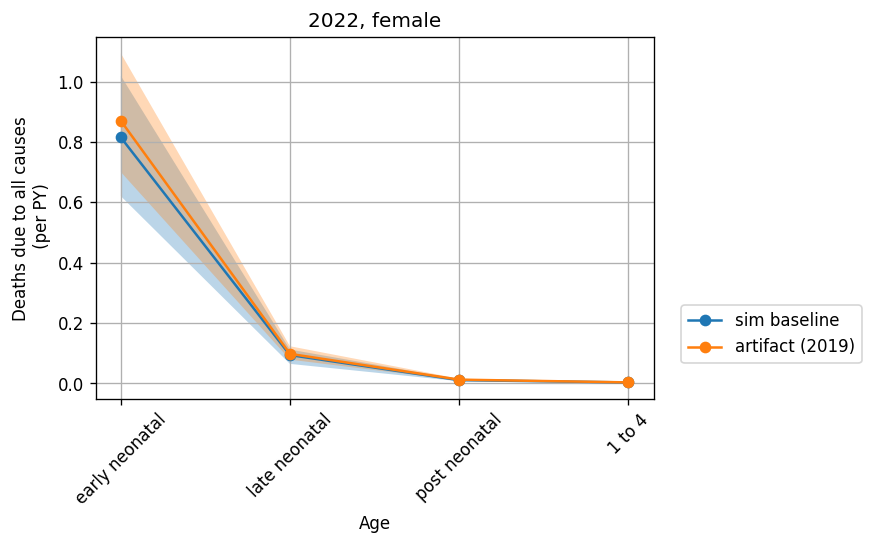

In [68]:
#plot_sim_vs_artifact(sim_data: pd.DataFrame, artifact_data: pd.DataFrame, sim_year: int, art_year: int, sex: str, sim_measure: str):
plot_sim_vs_artifact(acmr, art_acmr, 2022, 2019, 'female', 'acmr')

In [69]:
ls /home/j/Project/simulation_science/ciff_malnutrition/verification_and_validation/v2.0_wasting/

all_cause_mortality.pdf  diarrhea_remission.pdf  lri_remission.pdf
diarrhea_emr.pdf         lri_emr.pdf             measles_emr.pdf
diarrhea_incidence.pdf   lri_incidence.pdf       measles_incidence.pdf
diarrhea_mortality.pdf   lri_mortality.pdf       measles_mortality.pdf
diarrhea_prevalence.pdf  lri_prevalence.pdf      measles_prevalence.pdf


In [70]:
output_dir

'/home/j/Project/simulation_science/ciff_malnutrition/verification_and_validation/v2.0_wasting/'

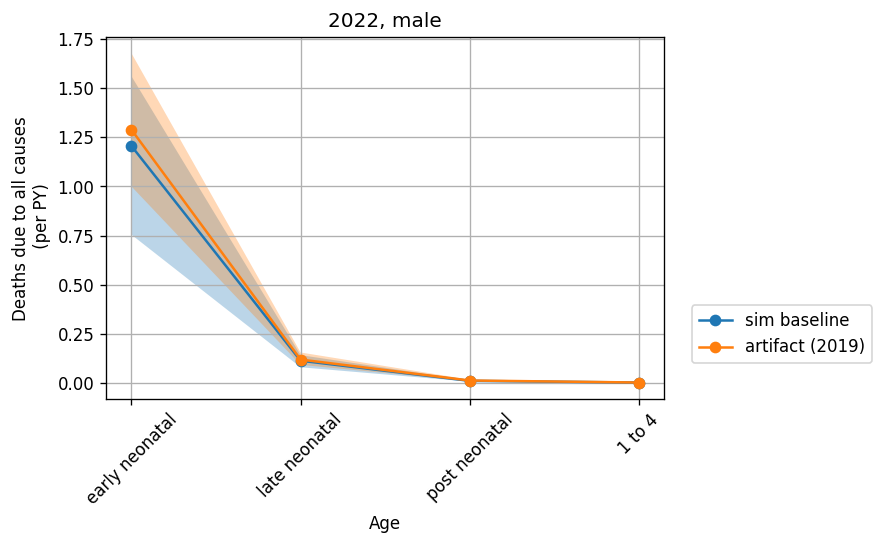

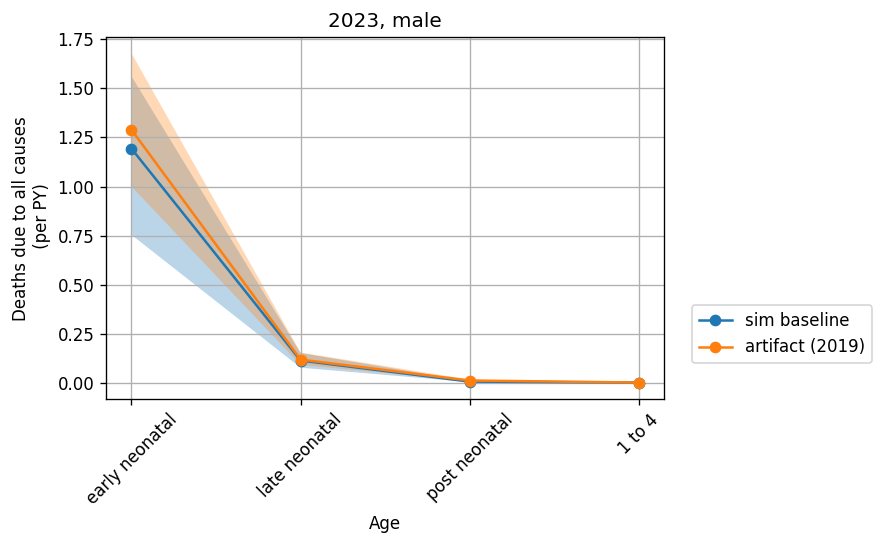

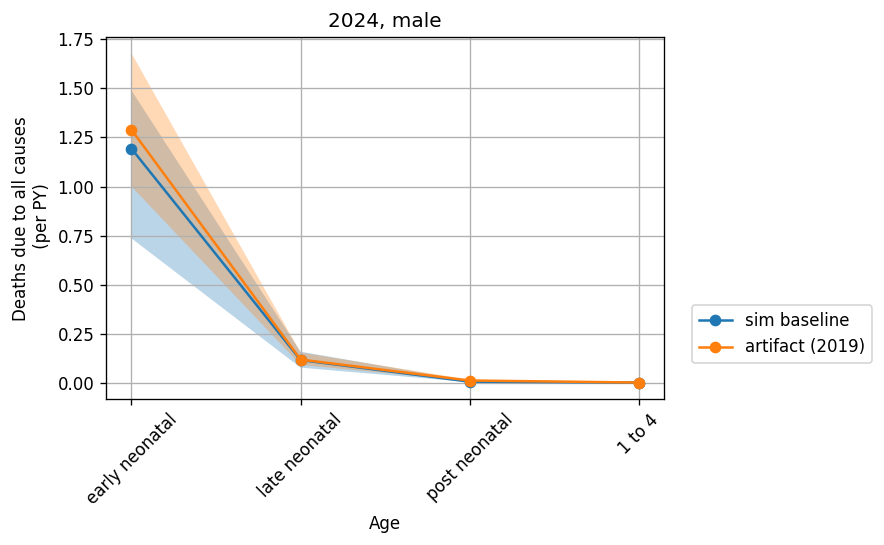

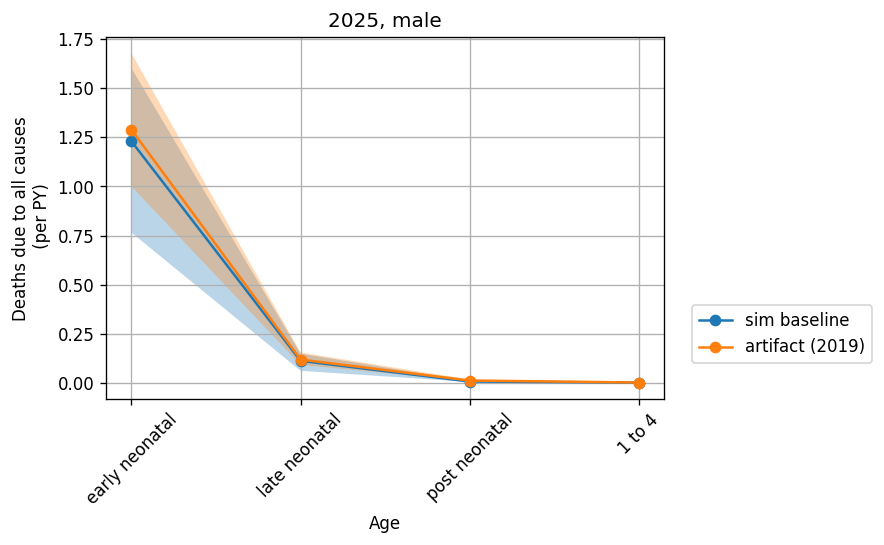

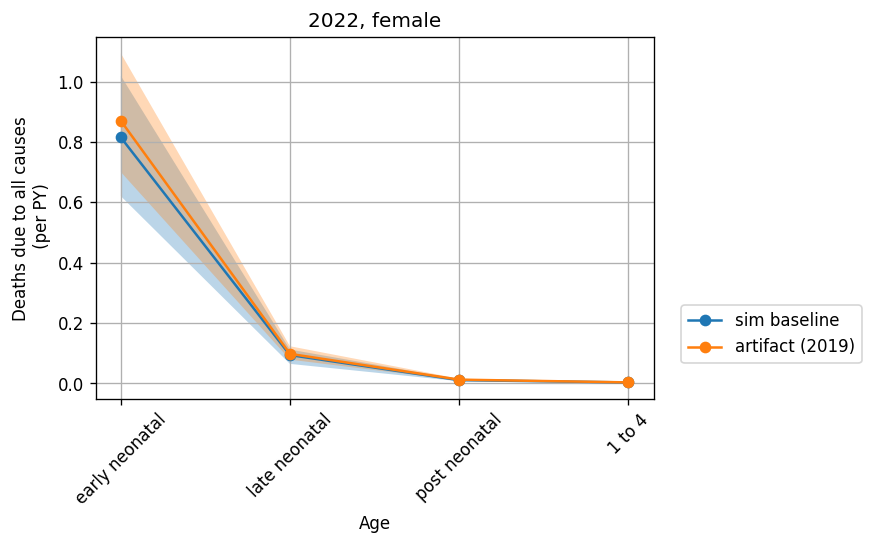

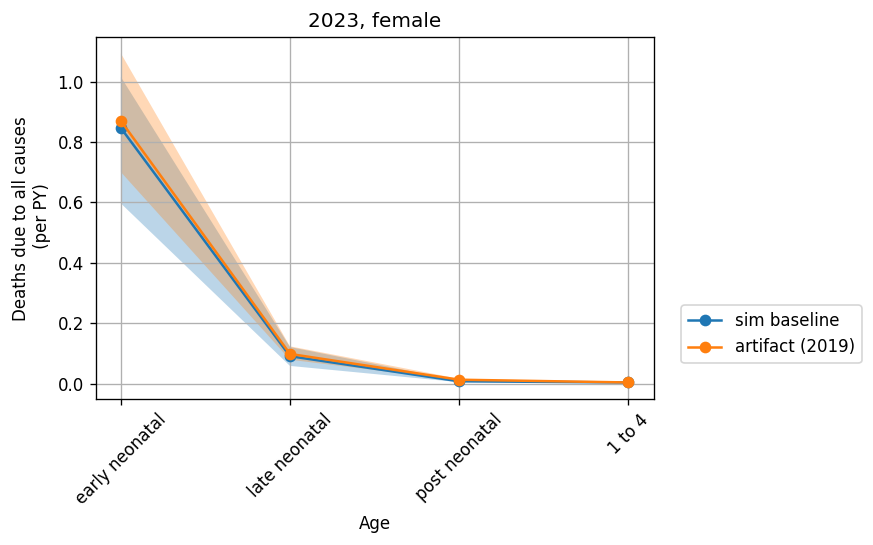

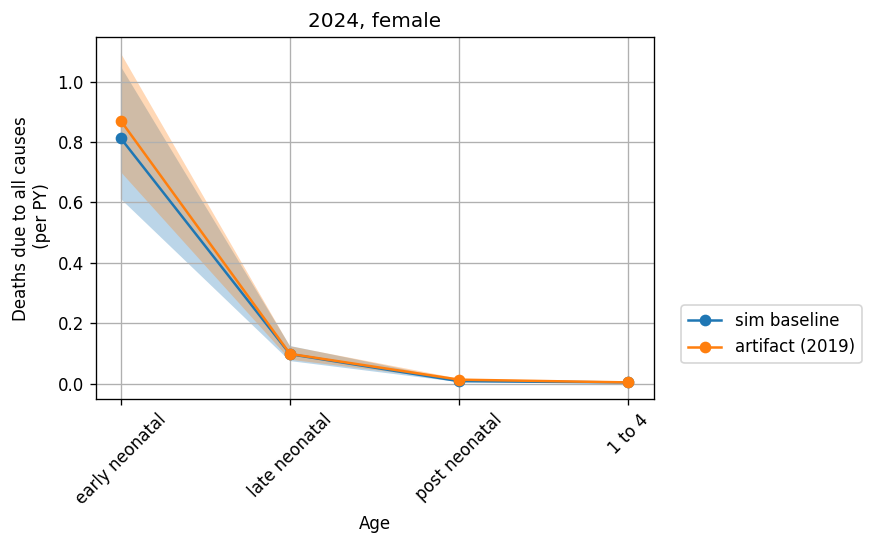

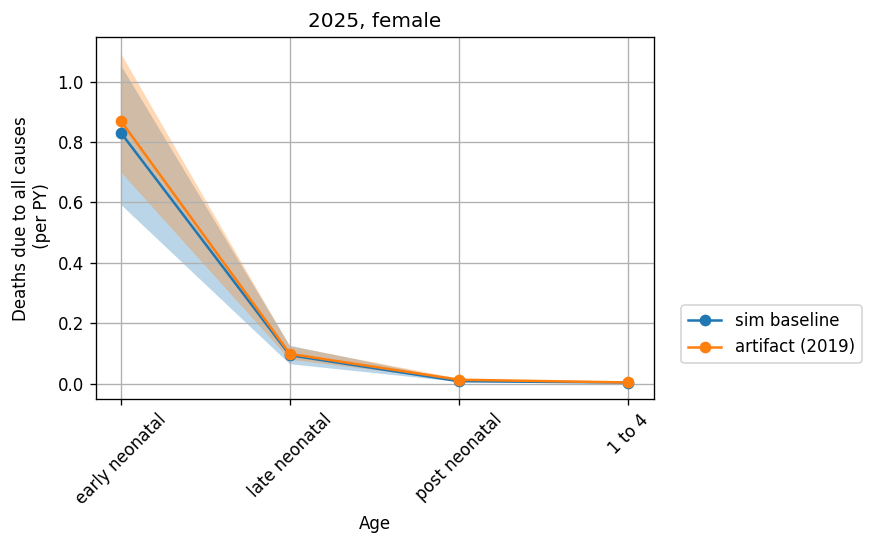

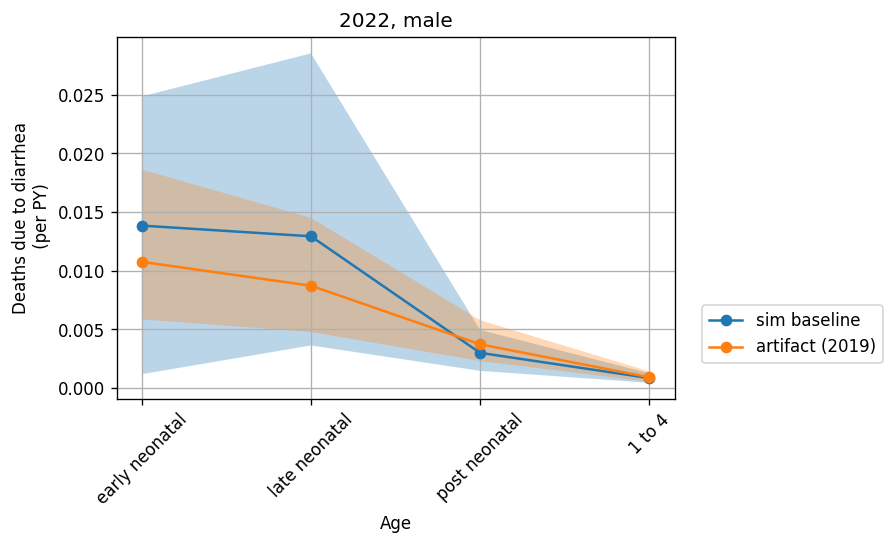

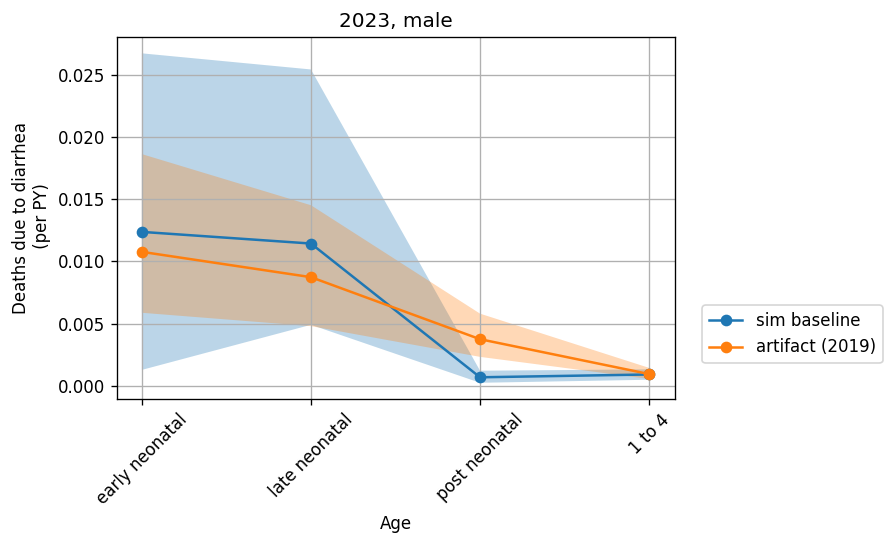

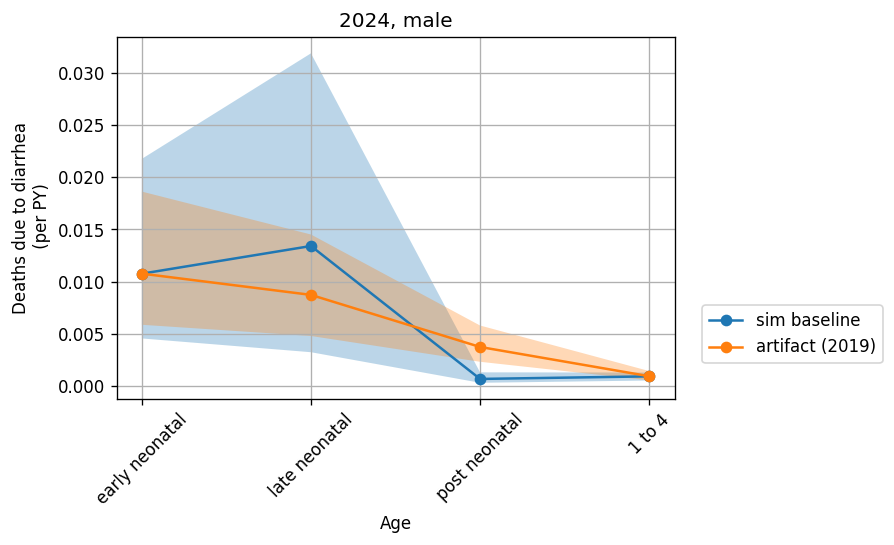

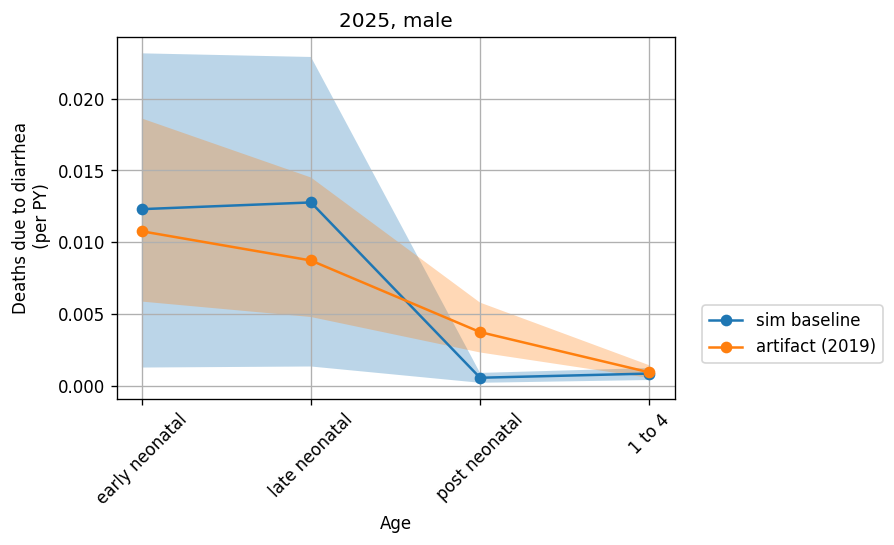

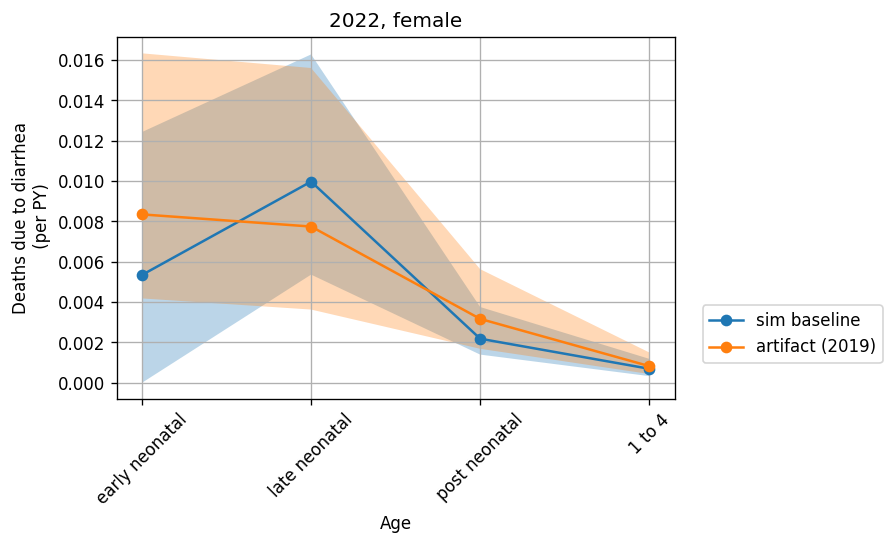

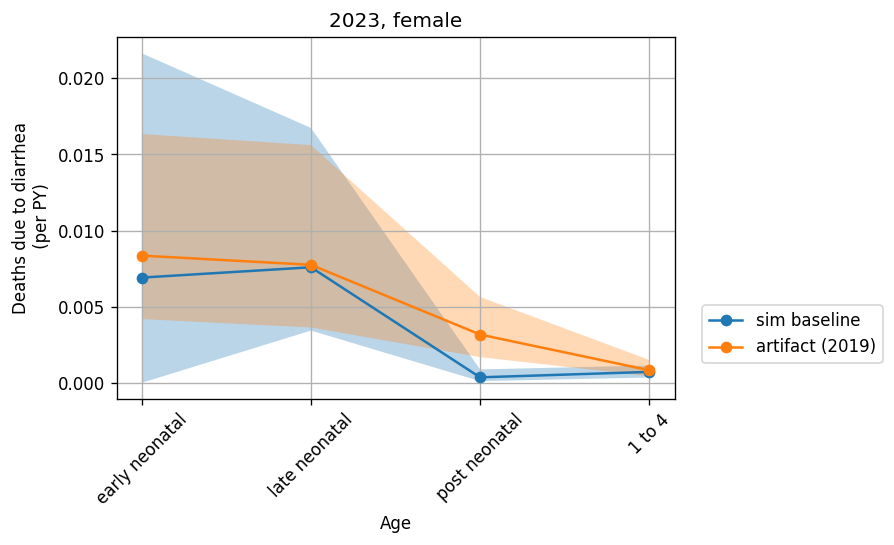

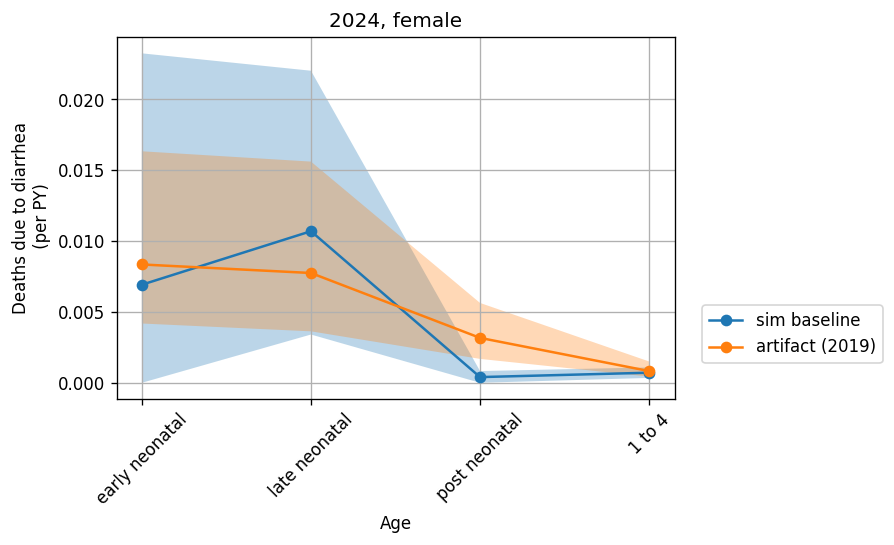

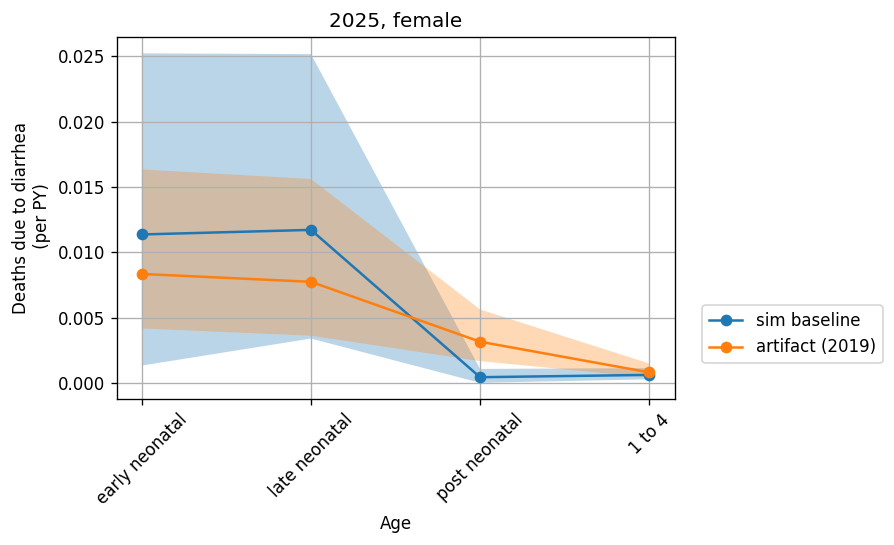

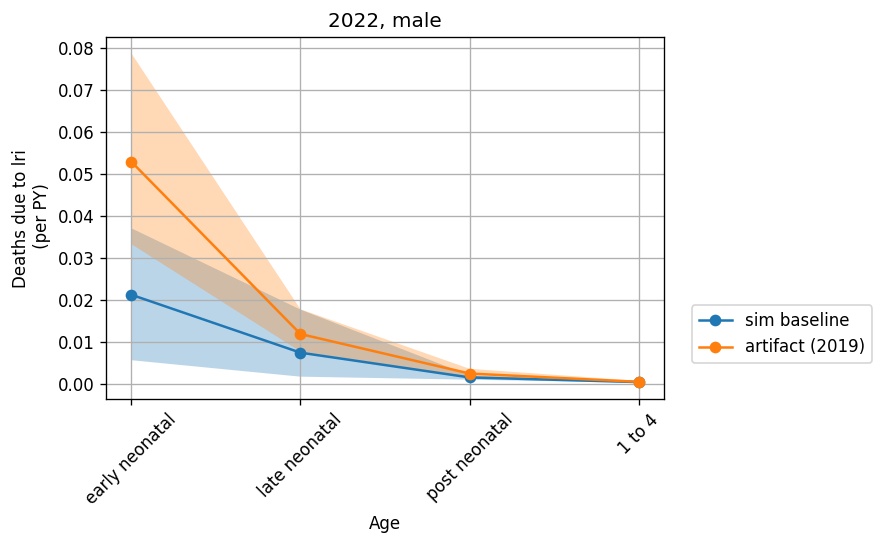

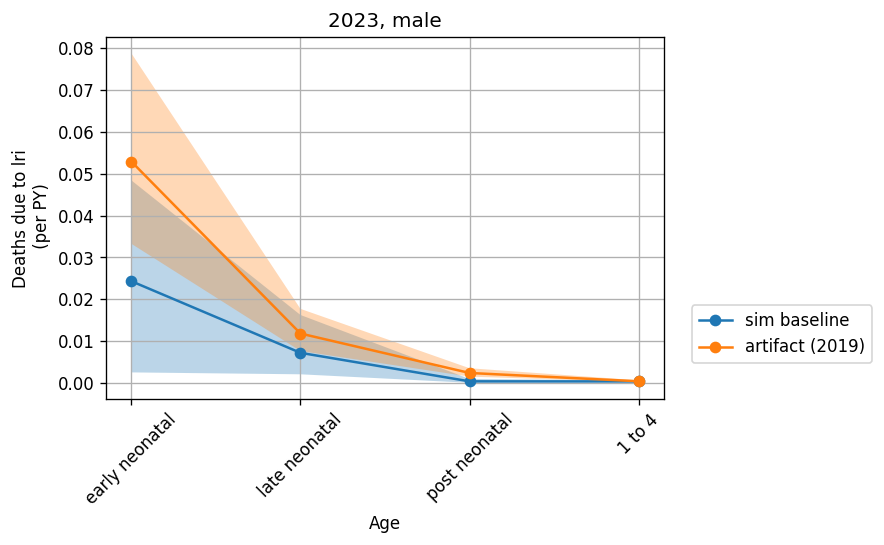

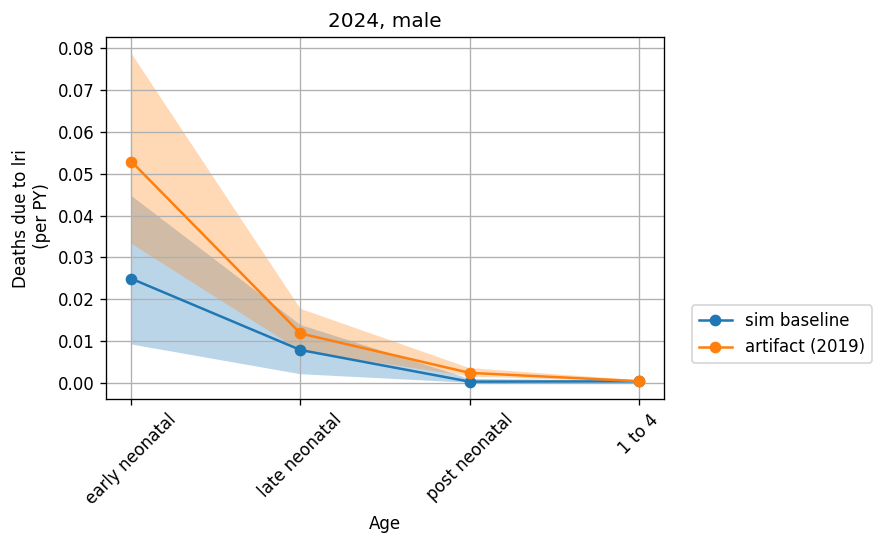

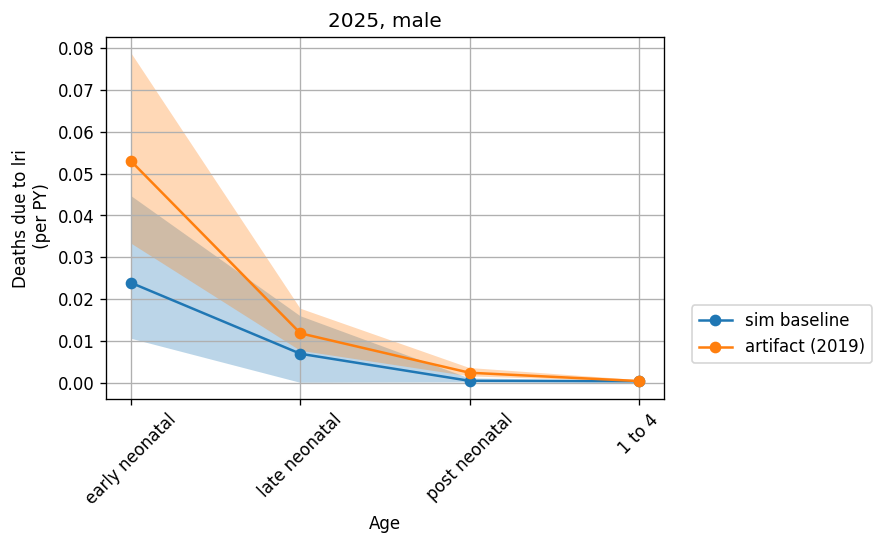

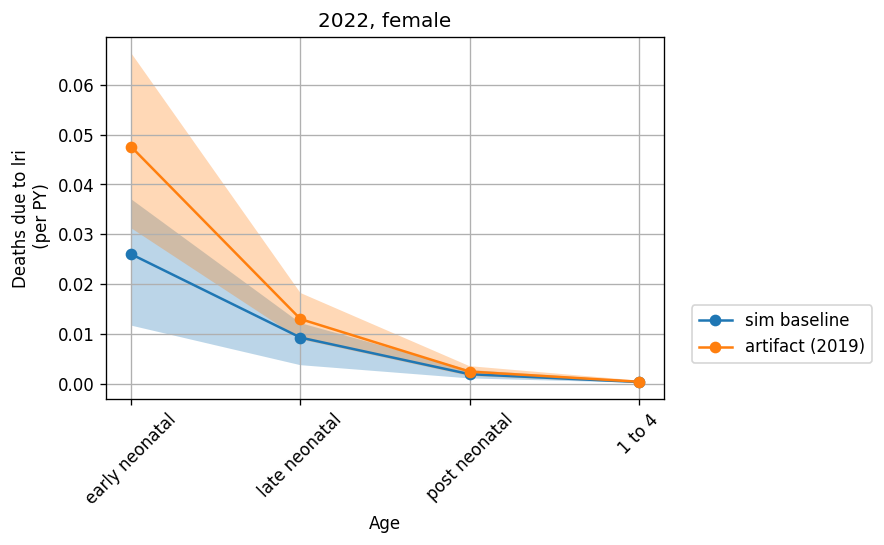

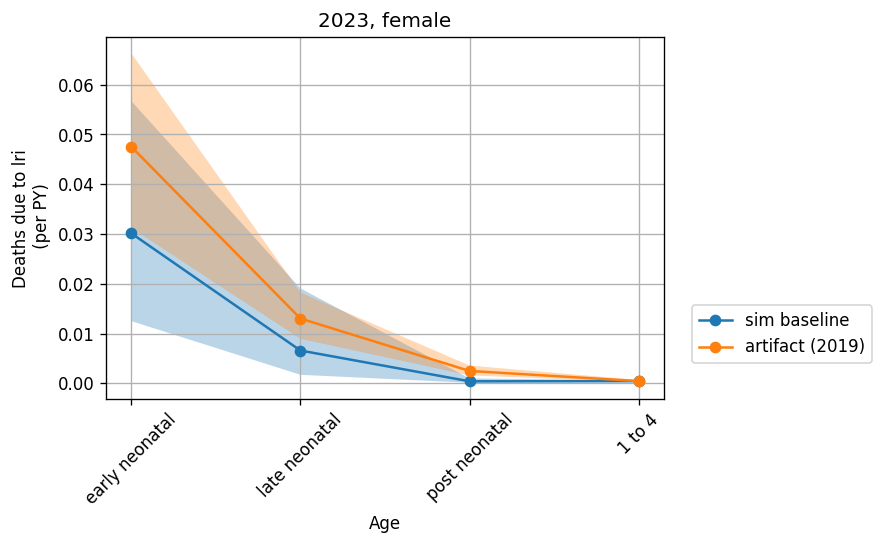

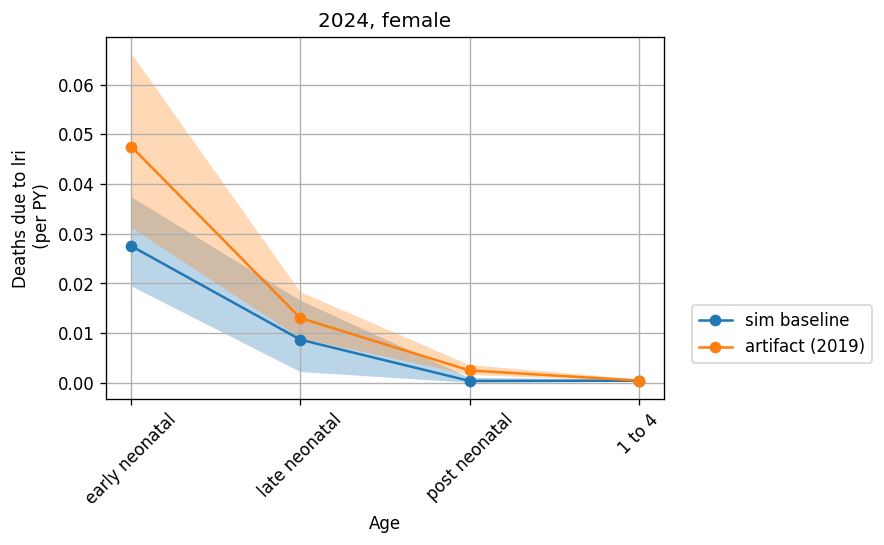

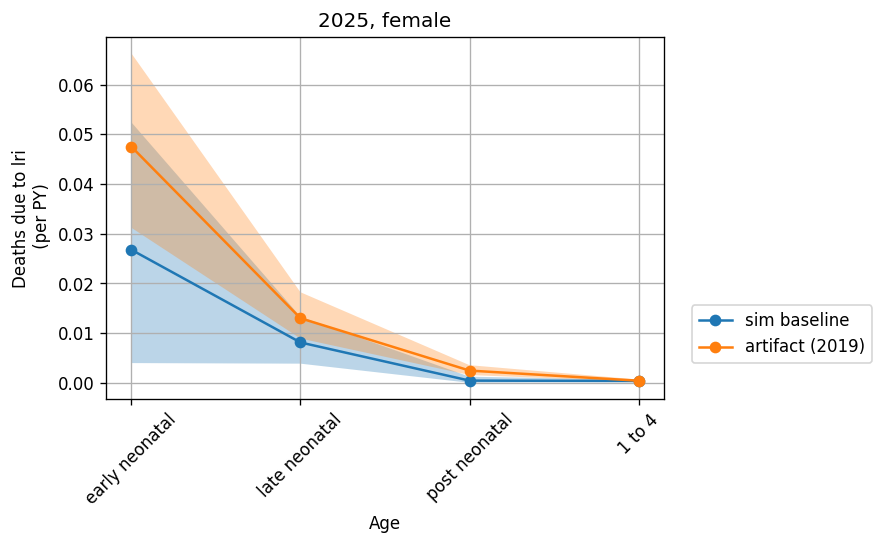

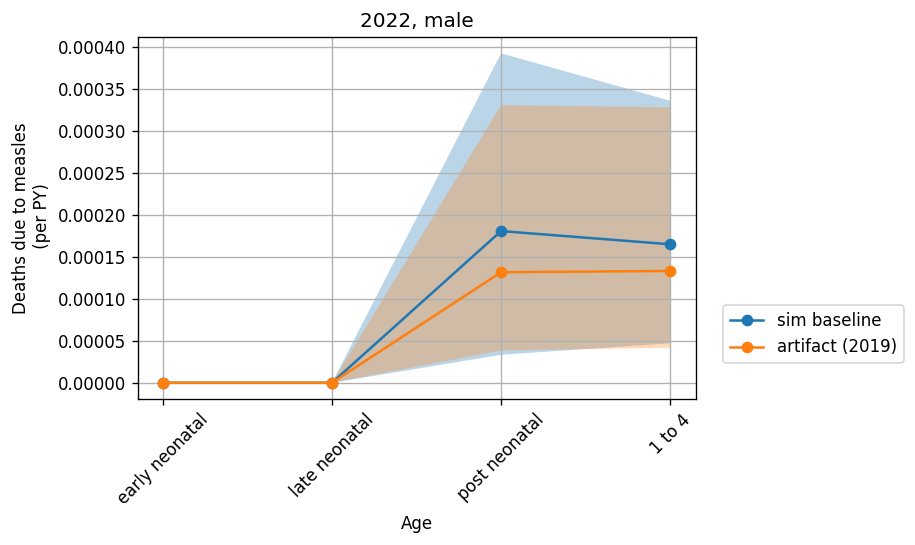

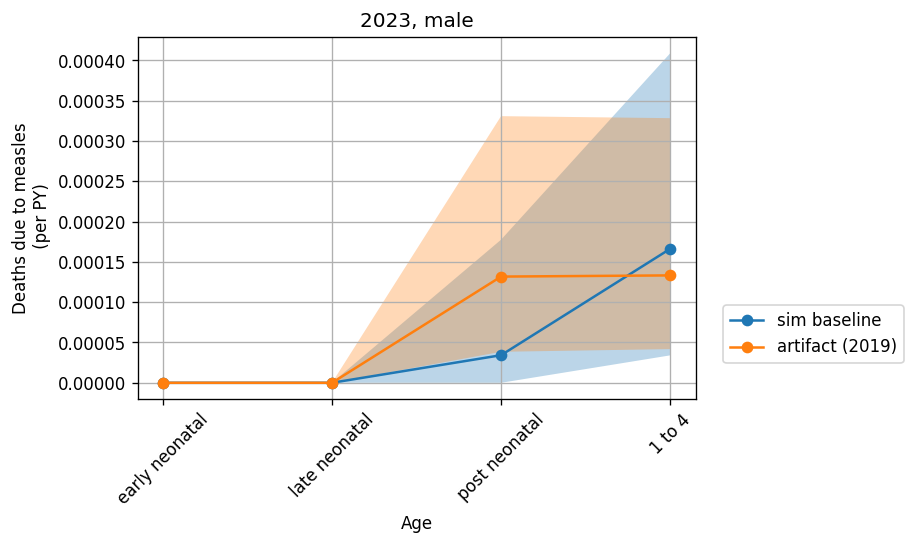

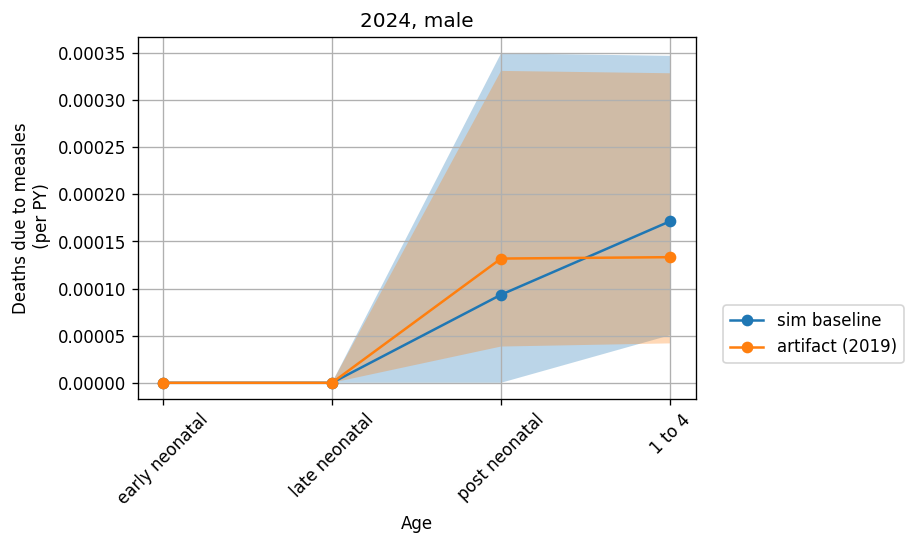

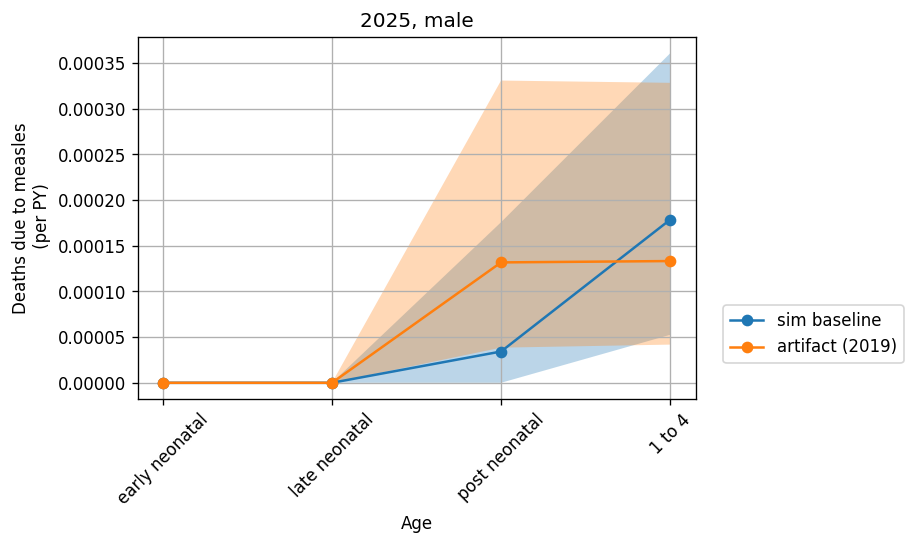

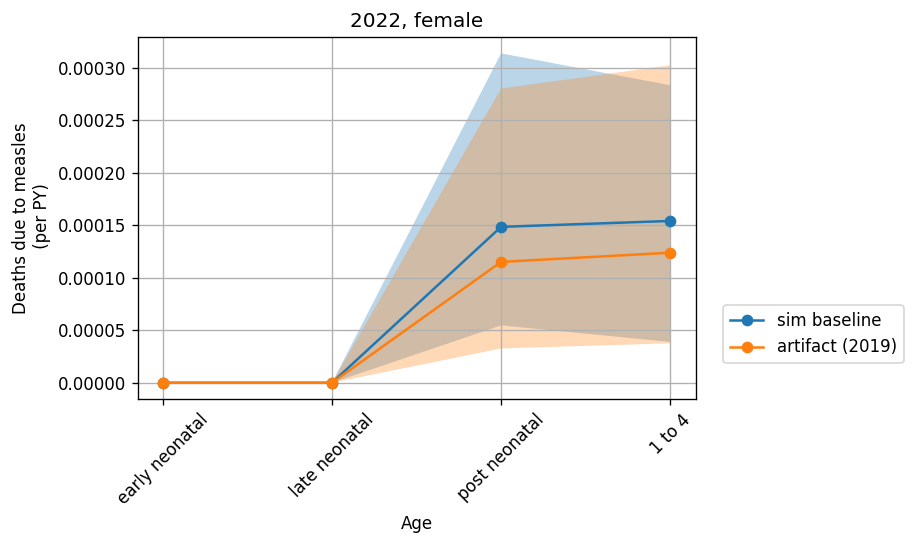

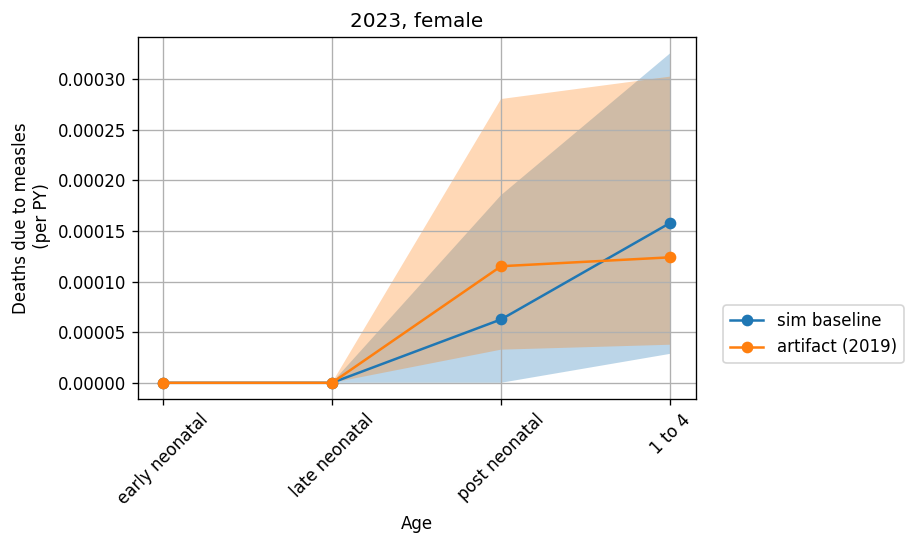

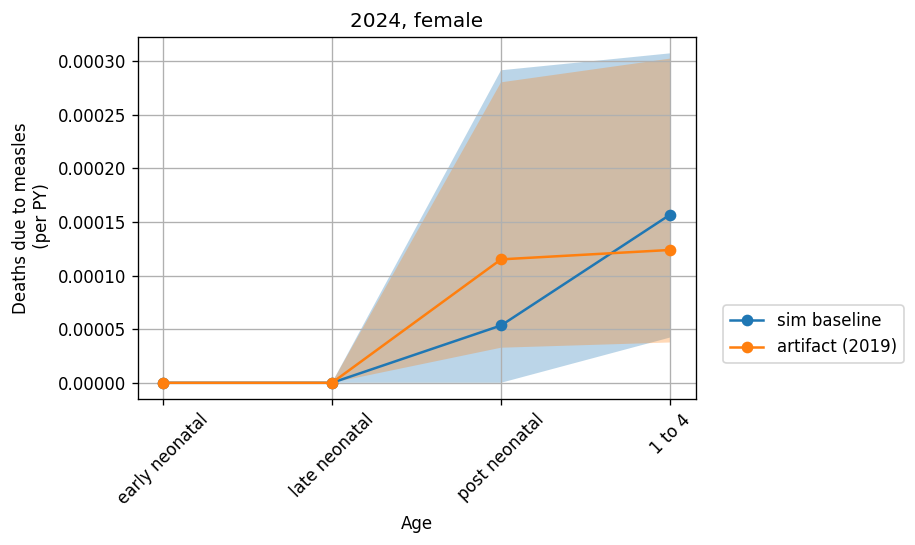

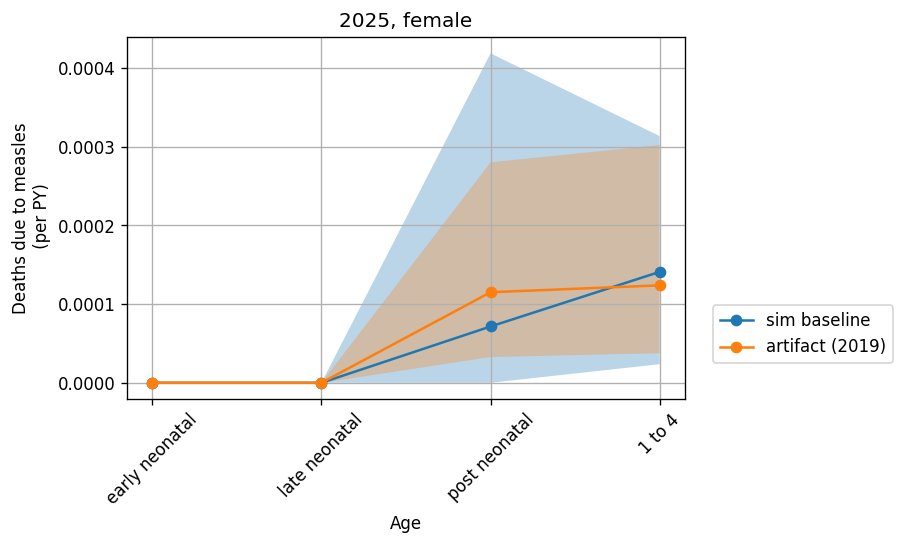

In [71]:
with PdfPages(output_dir + 'all_cause_mortality.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(acmr, art_acmr, sim_year, 2019, sex, 'acmr')
            pdf.savefig(bbox_inches='tight')
    
with PdfPages(output_dir + 'diarrhea_mortality.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(deaths_dd, art_csmr_dd, sim_year, 2019, sex, 'csmr_dd')      
            pdf.savefig(bbox_inches='tight')
    
with PdfPages(output_dir + 'lri_mortality.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(deaths_lri, art_csmr_lri, sim_year, 2019, sex, 'csmr_lri') 
            pdf.savefig(bbox_inches='tight')
    
with PdfPages(output_dir + 'measles_mortality.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(deaths_msls, art_csmr_msls, sim_year, 2019, sex, 'csmr_msls') 
            pdf.savefig(bbox_inches='tight')

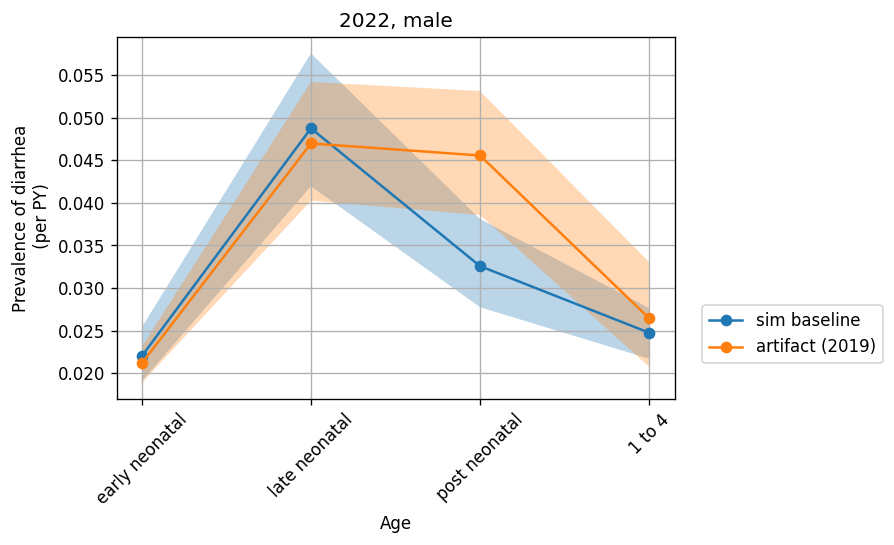

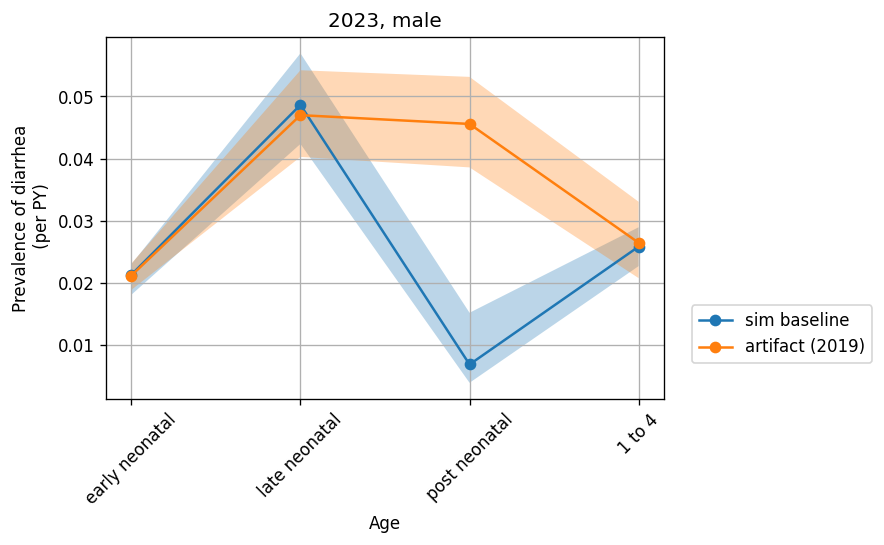

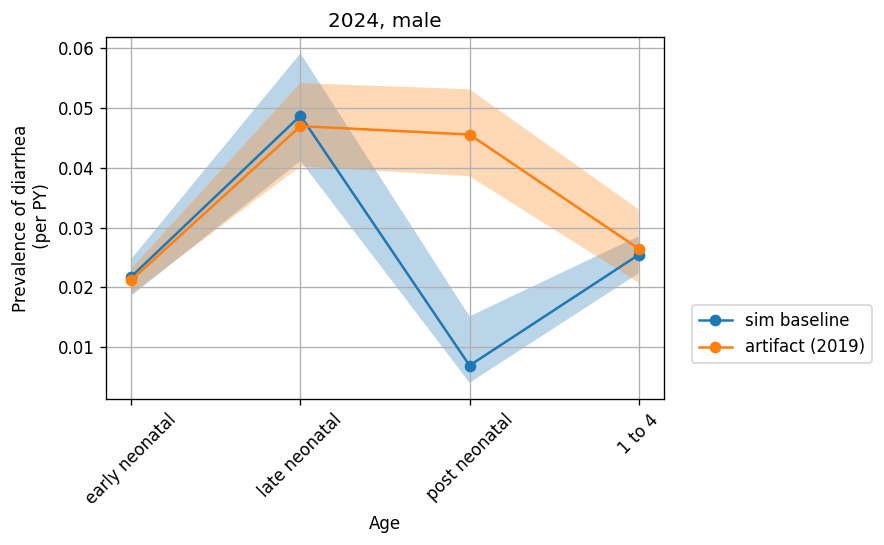

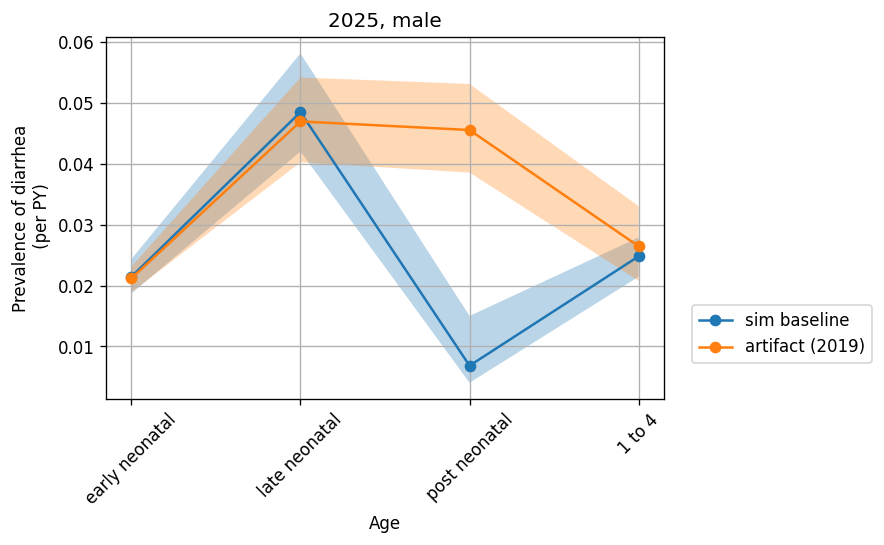

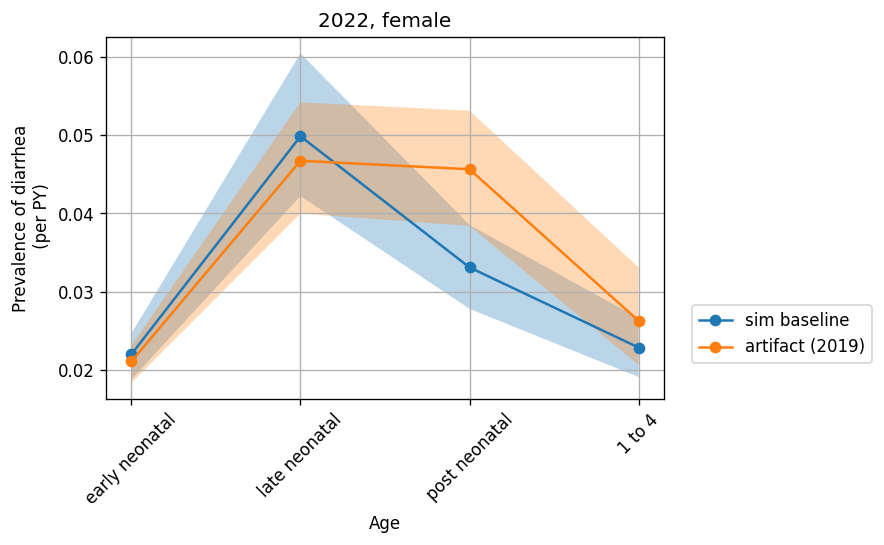

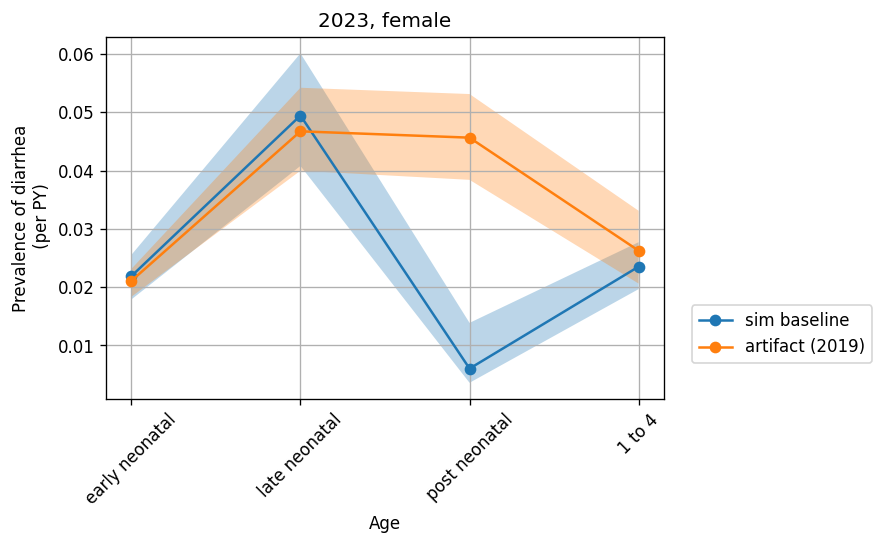

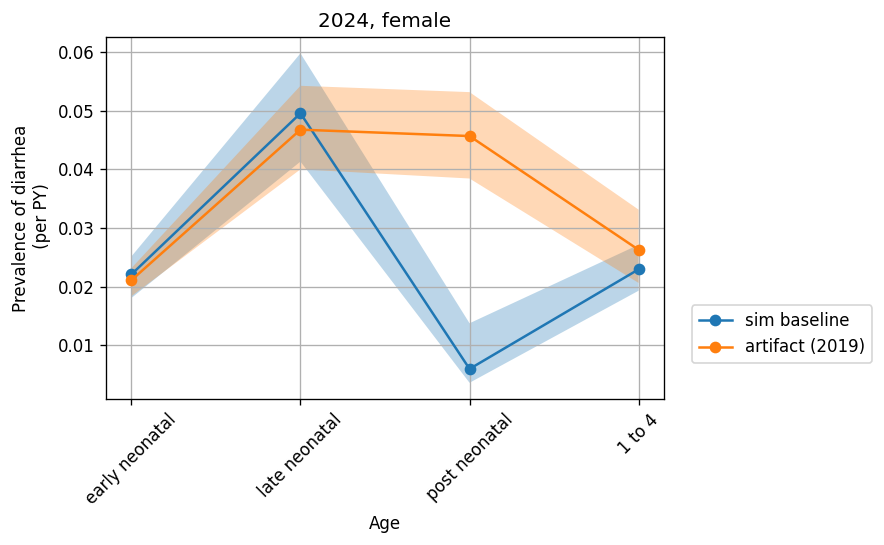

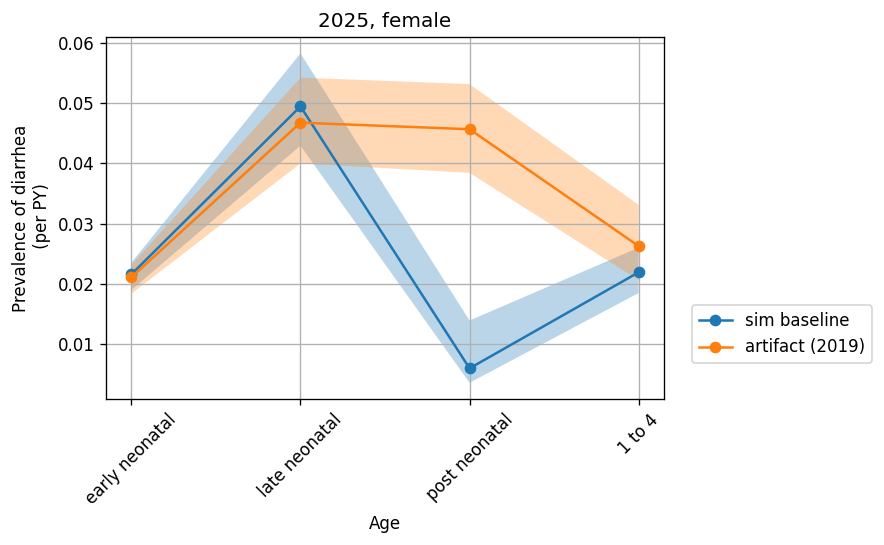

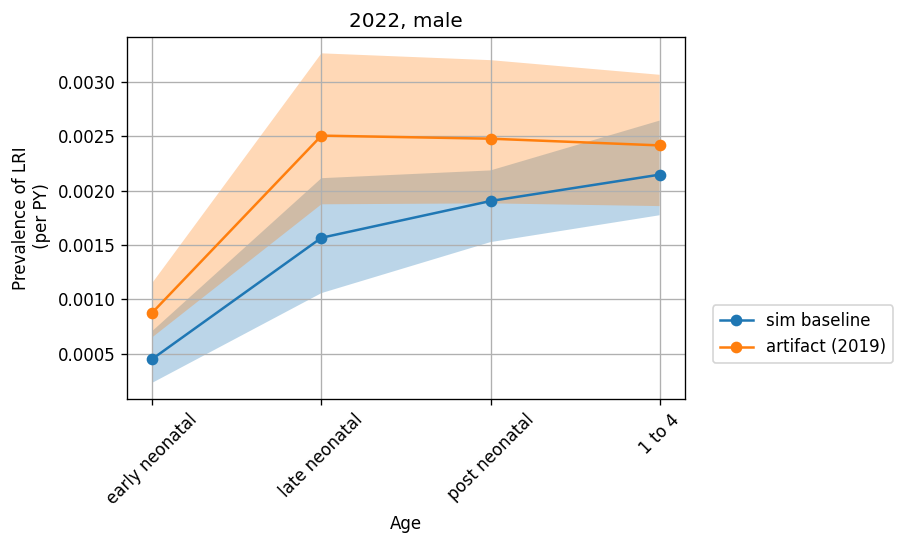

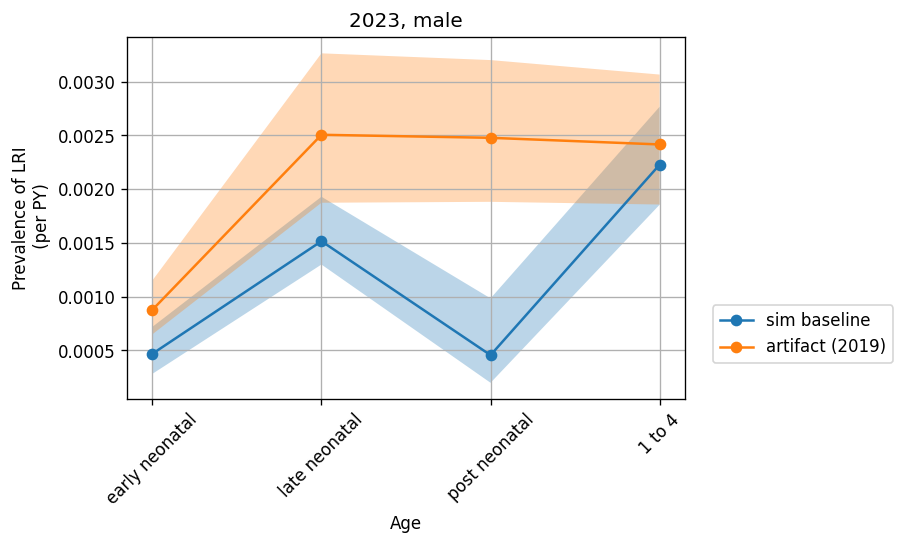

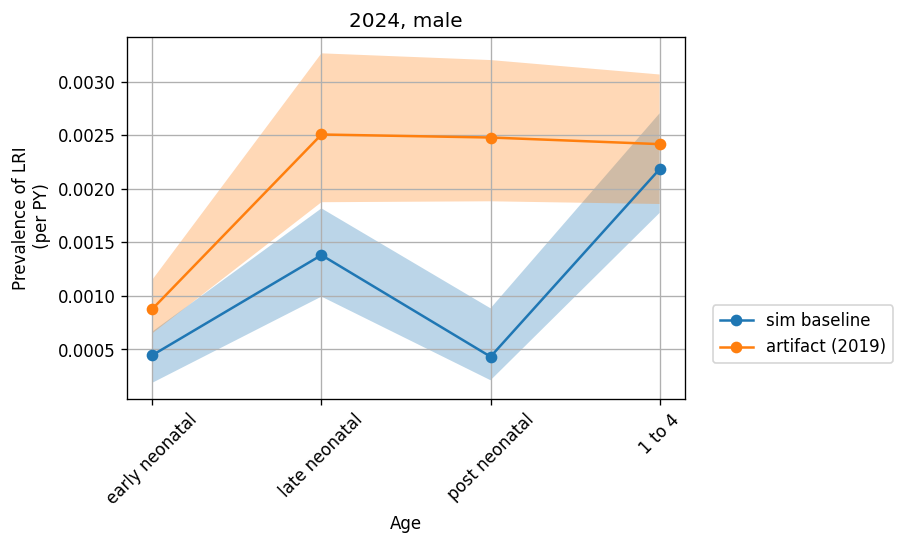

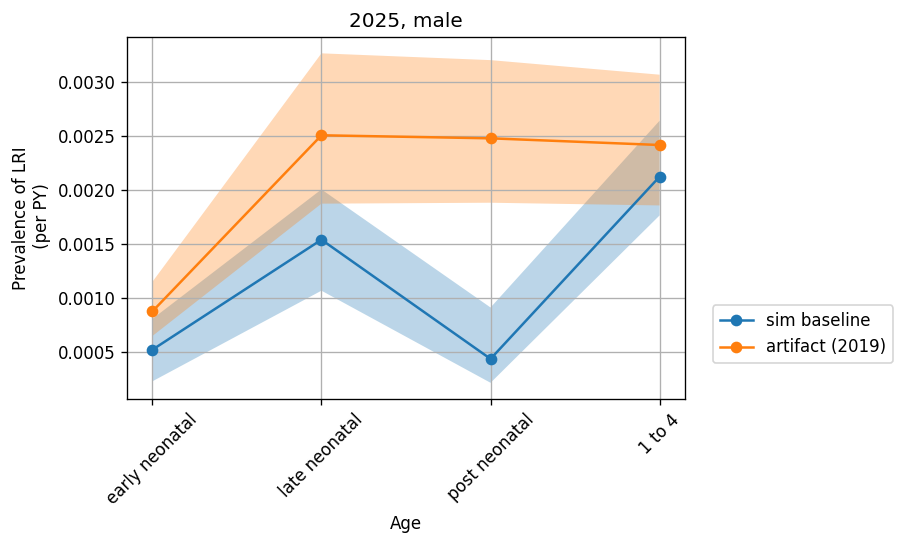

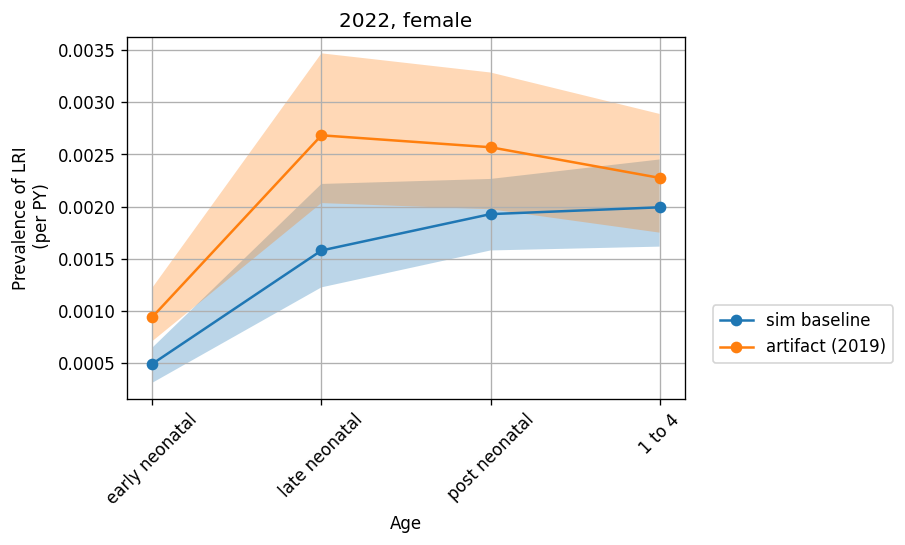

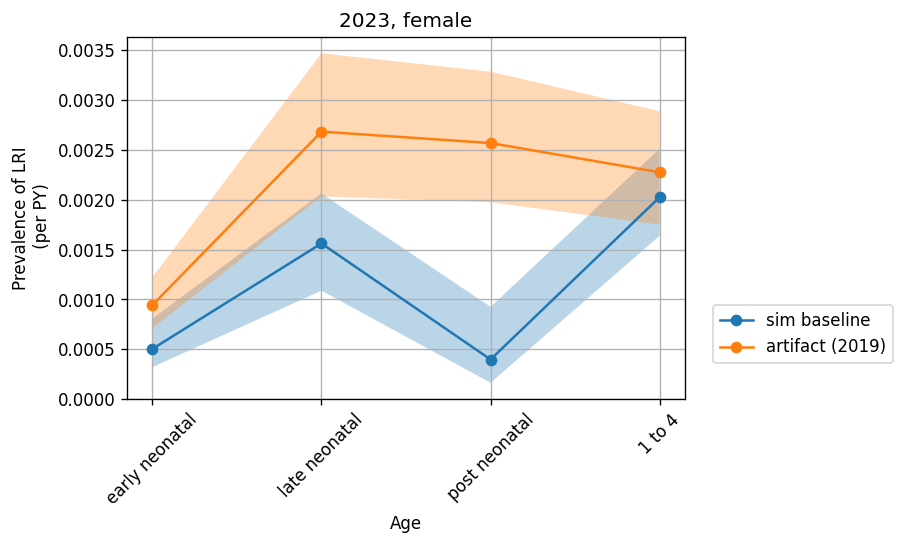

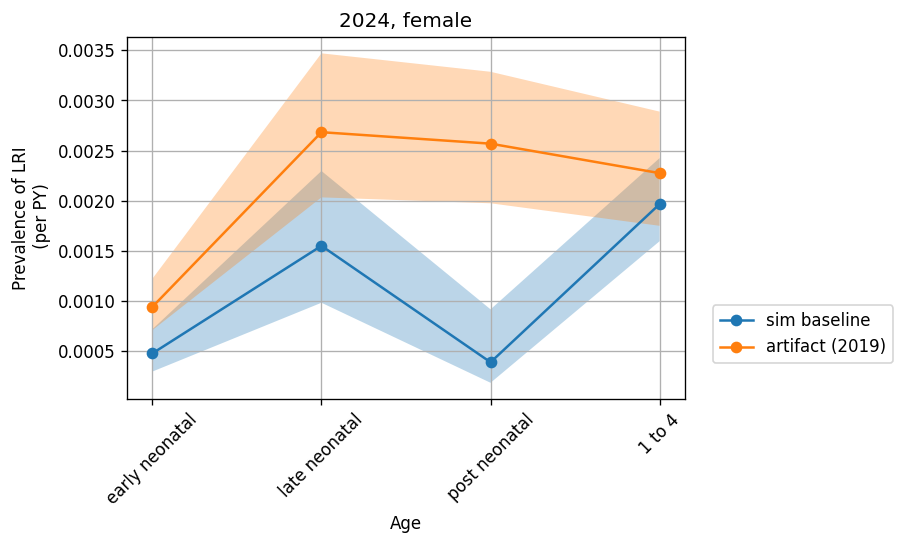

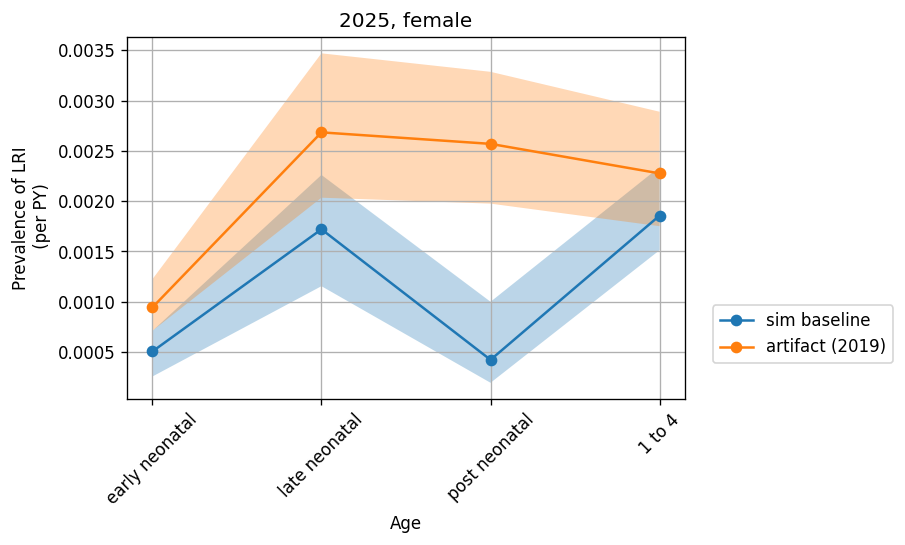

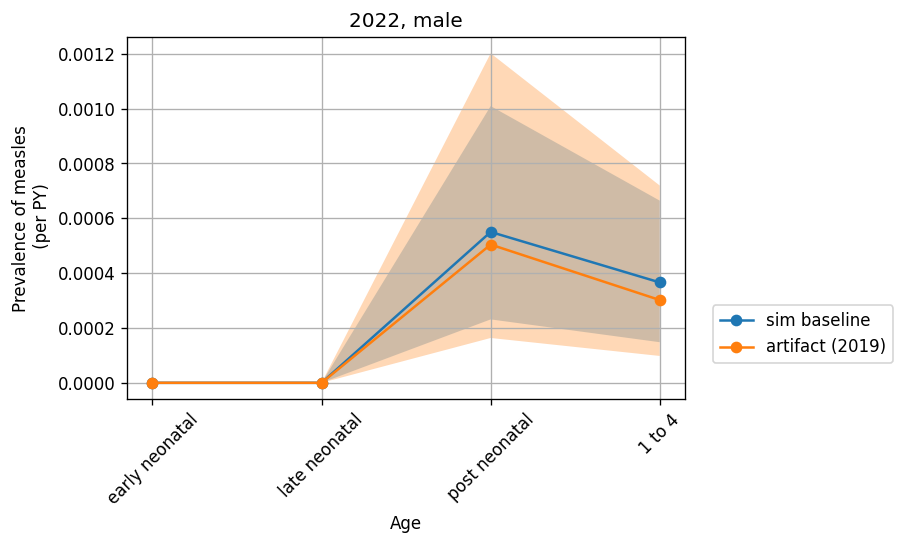

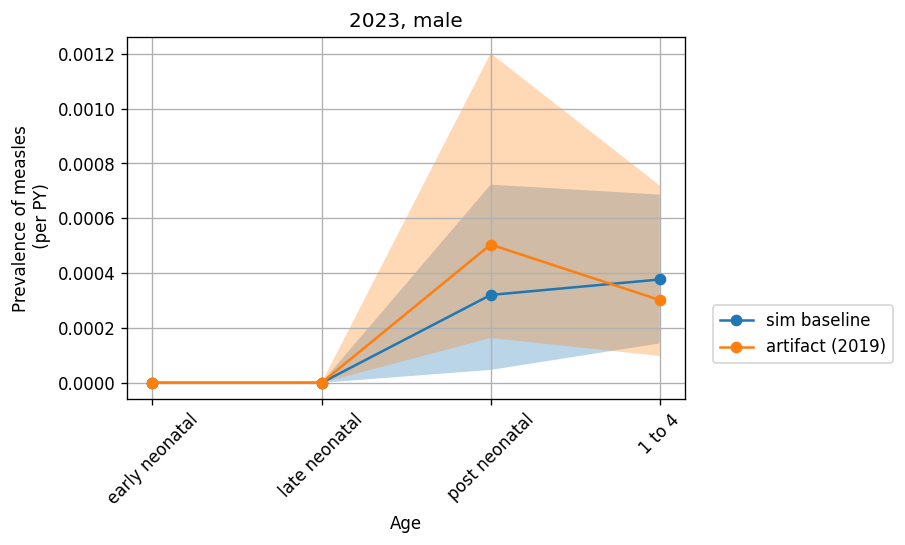

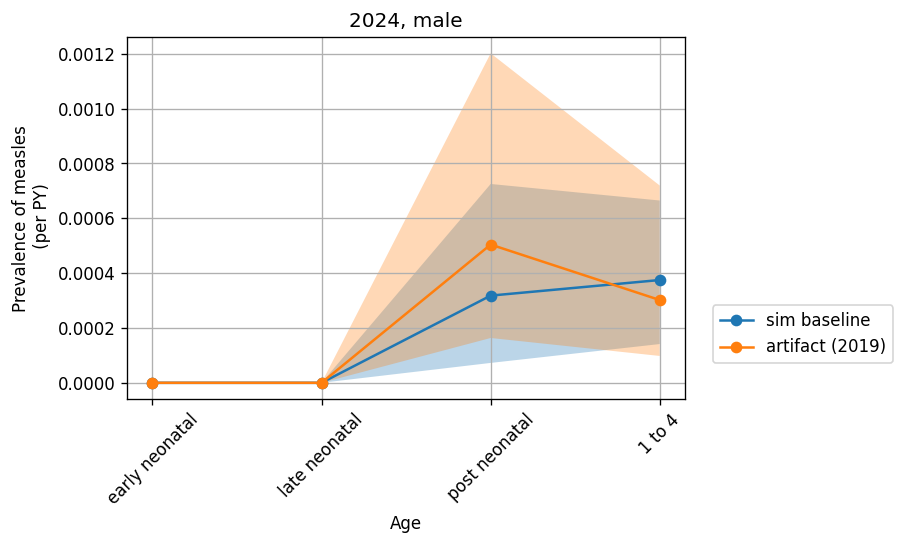

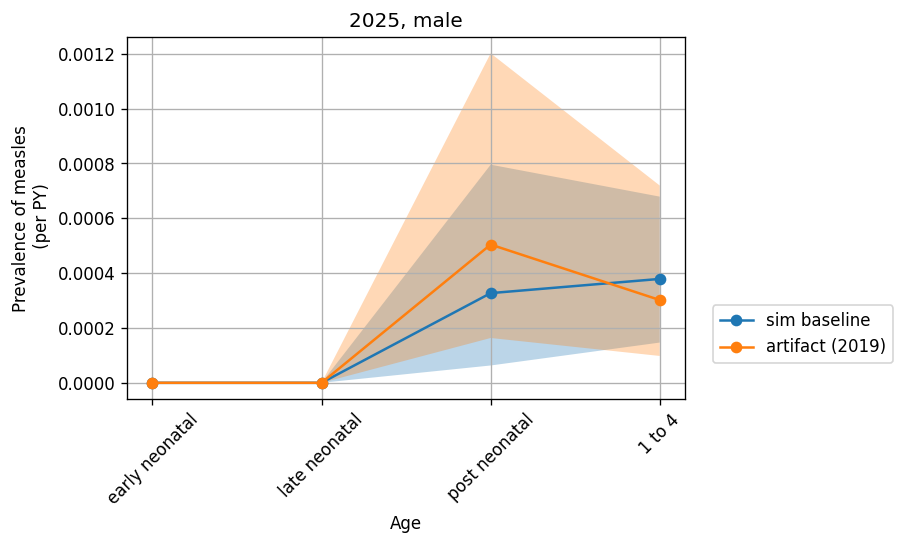

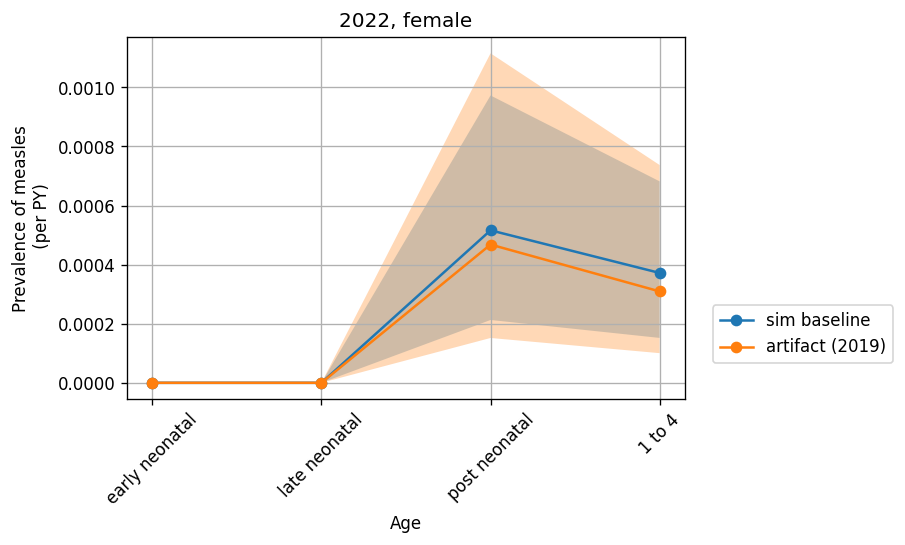

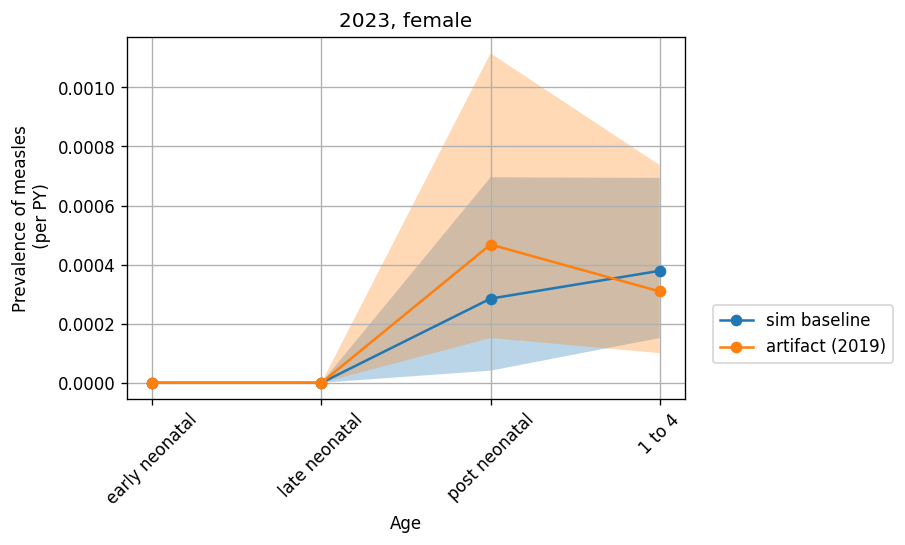

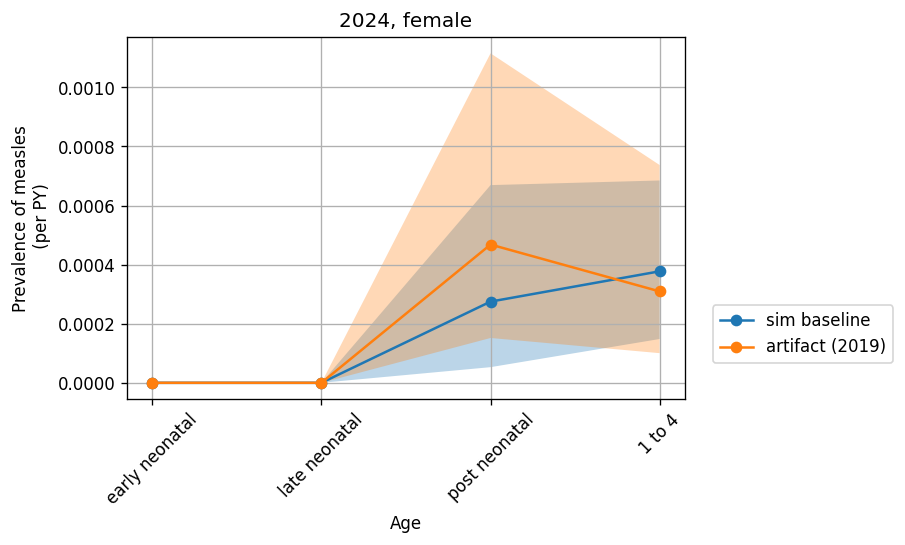

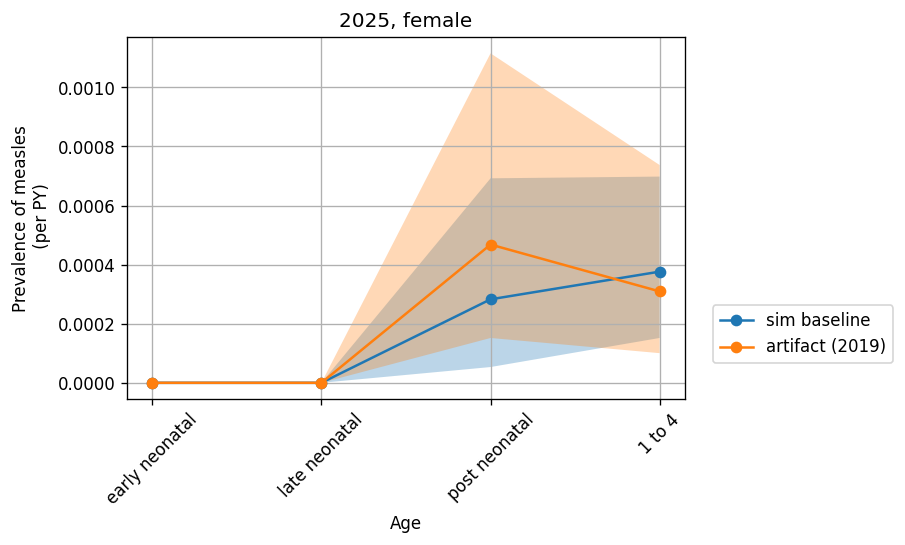

In [72]:
with PdfPages(output_dir + 'diarrhea_prevalence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(prevalence_dd, art_prevalence_dd, sim_year, 2019, sex, 'prevalence_dd')
            pdf.savefig(bbox_inches='tight')
            
with PdfPages(output_dir + 'lri_prevalence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(prevalence_lri, art_prevalence_lri, sim_year, 2019, sex, 'prevalence_lri')                
            pdf.savefig(bbox_inches='tight')

with PdfPages(output_dir + 'measles_prevalence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(prevalence_msls, art_prevalence_msls, sim_year, 2019, sex, 'prevalence_msls')
            pdf.savefig(bbox_inches='tight')


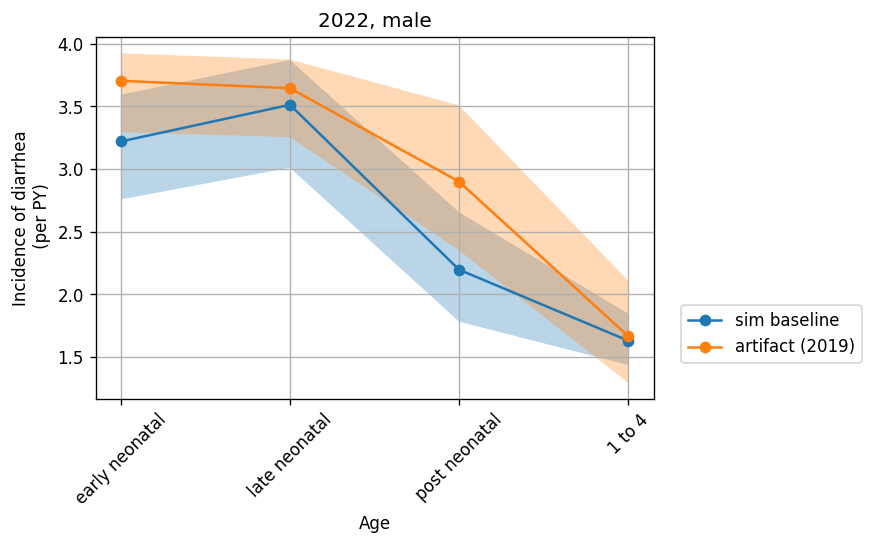

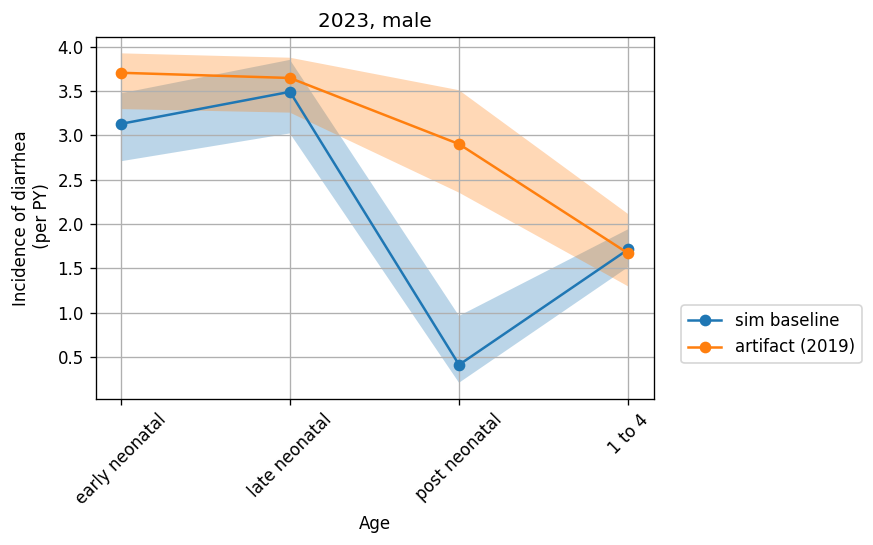

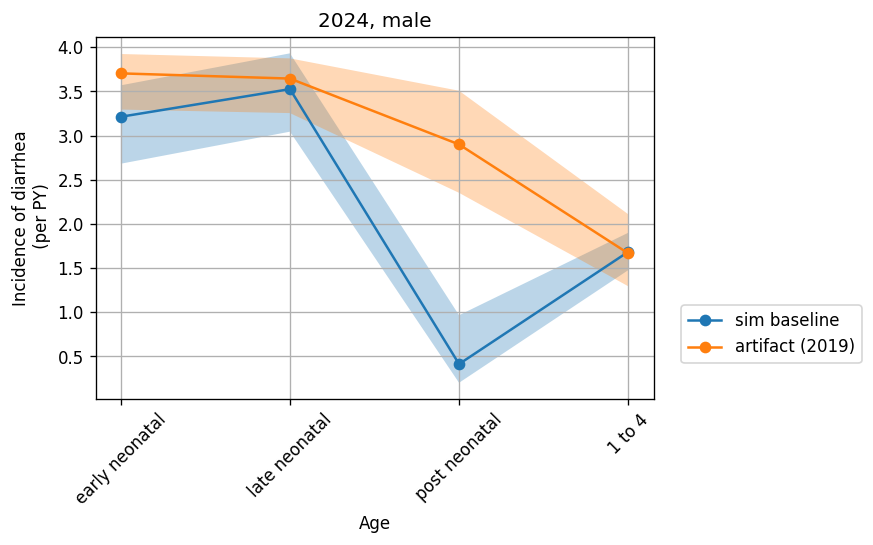

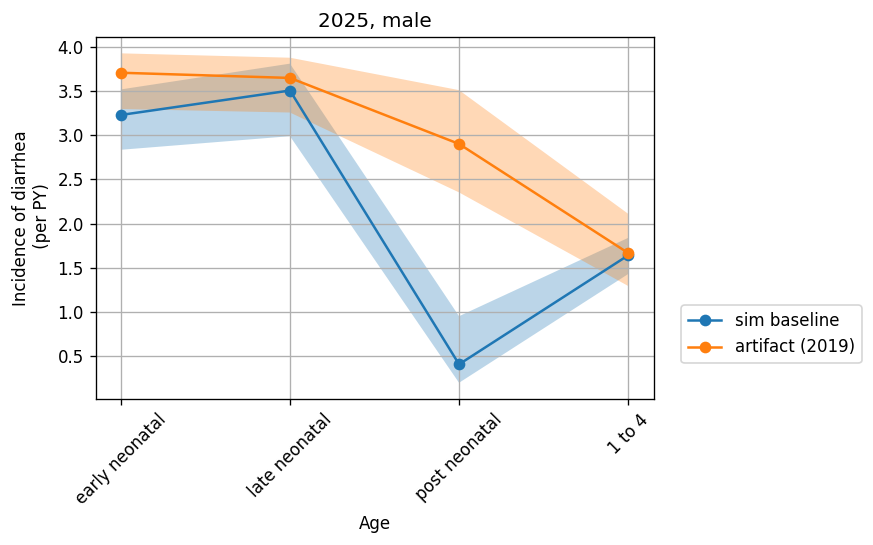

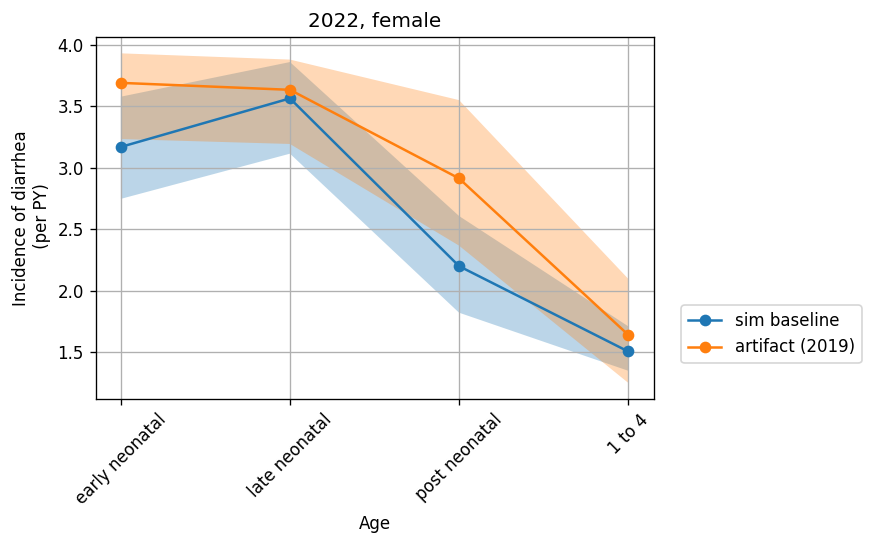

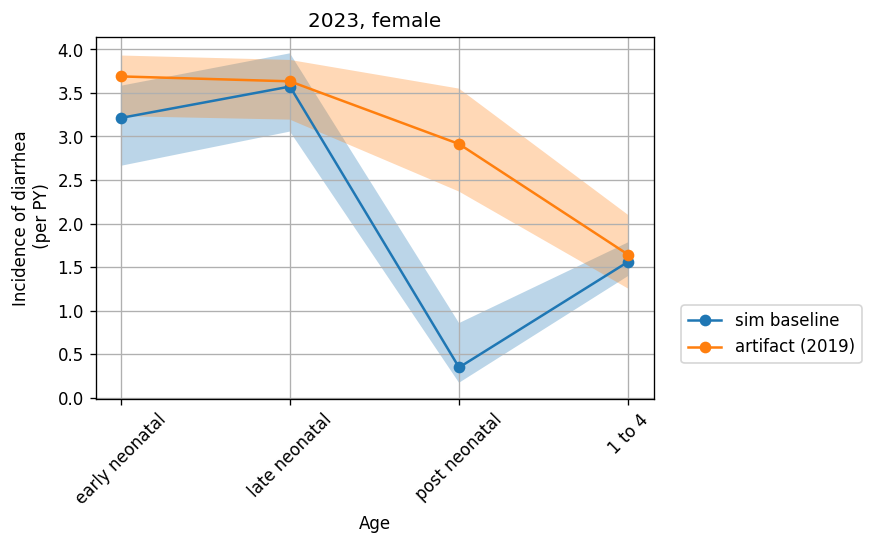

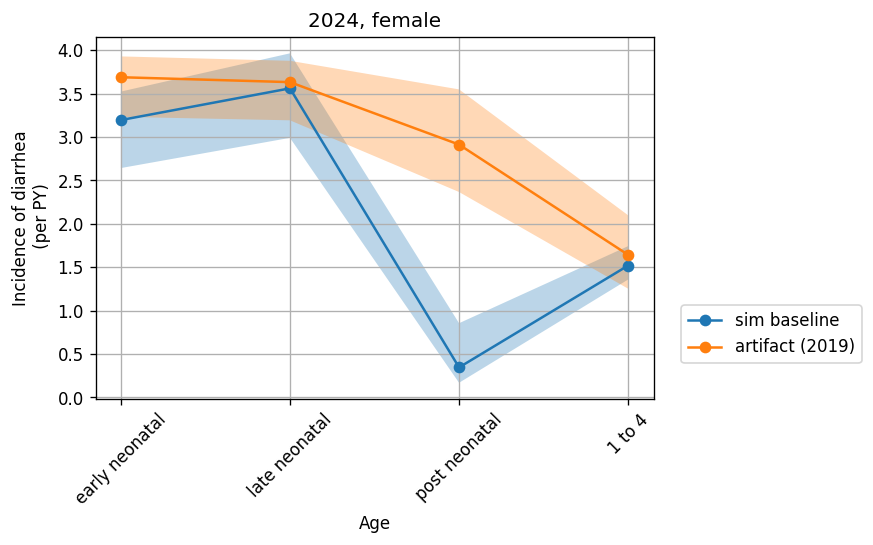

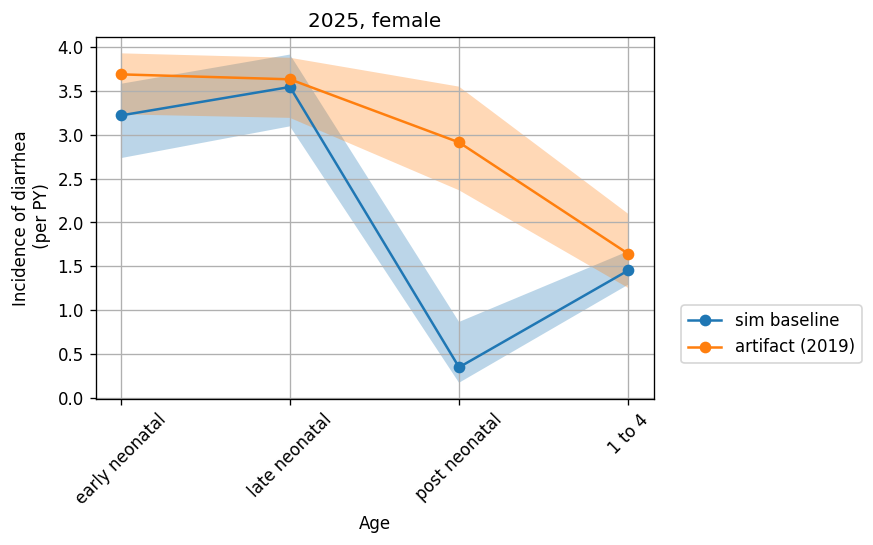

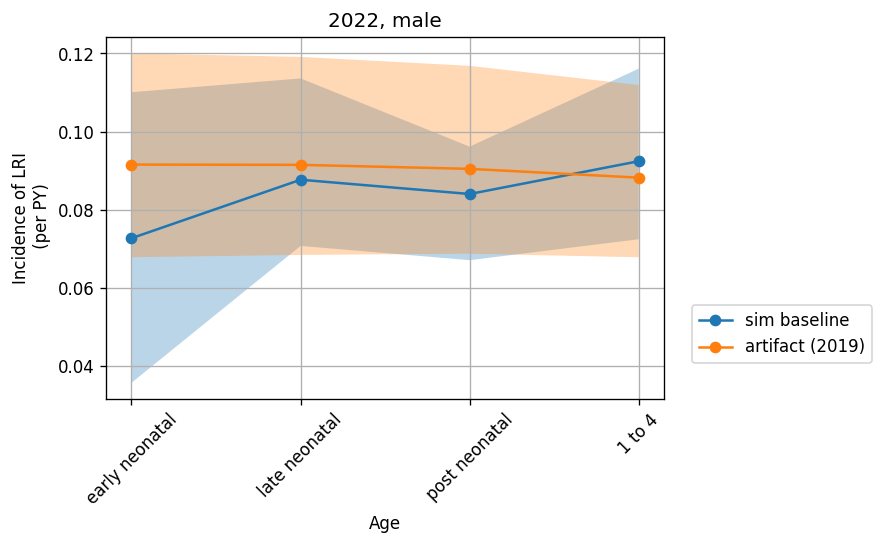

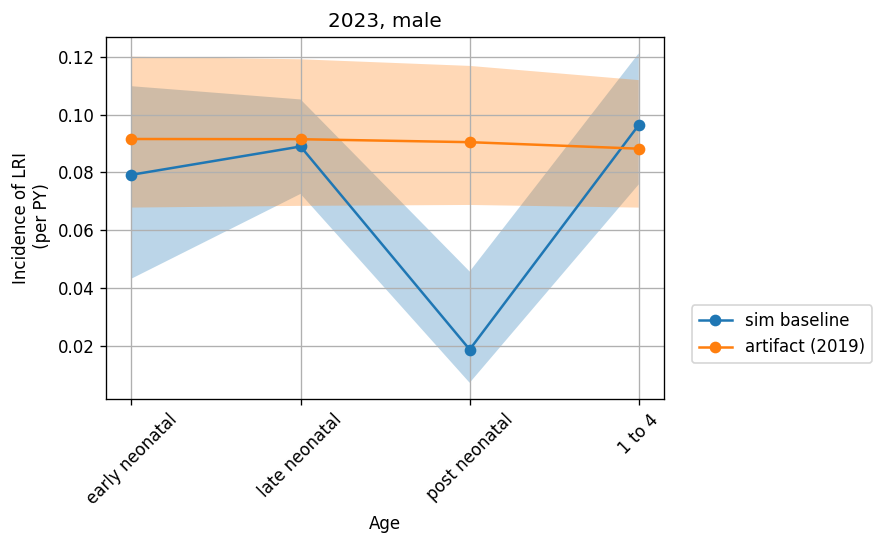

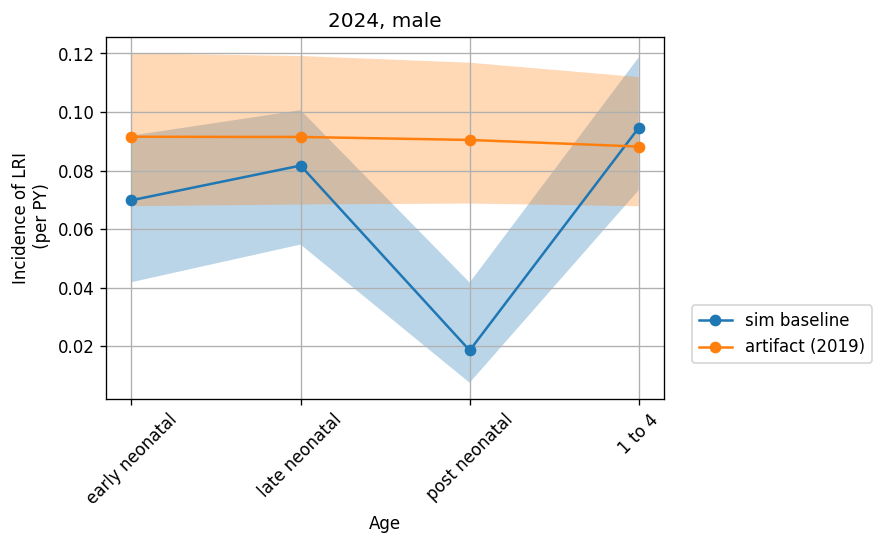

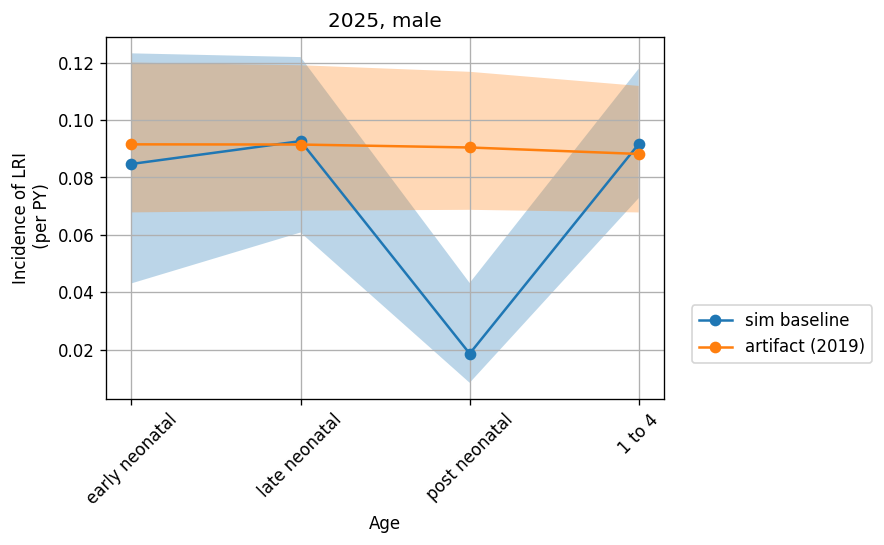

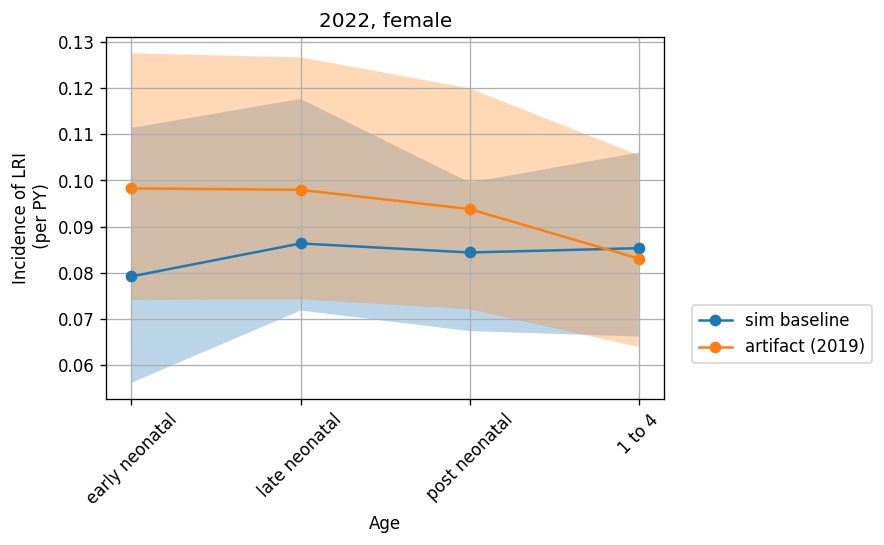

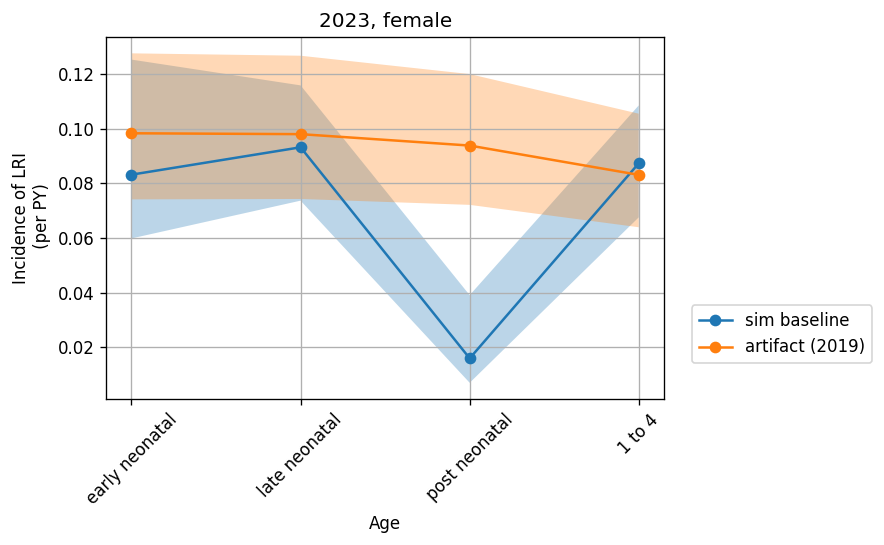

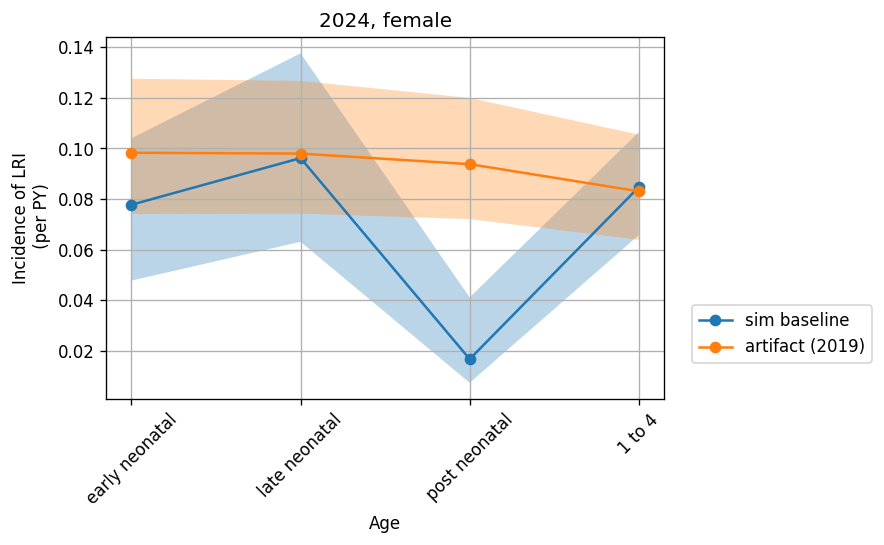

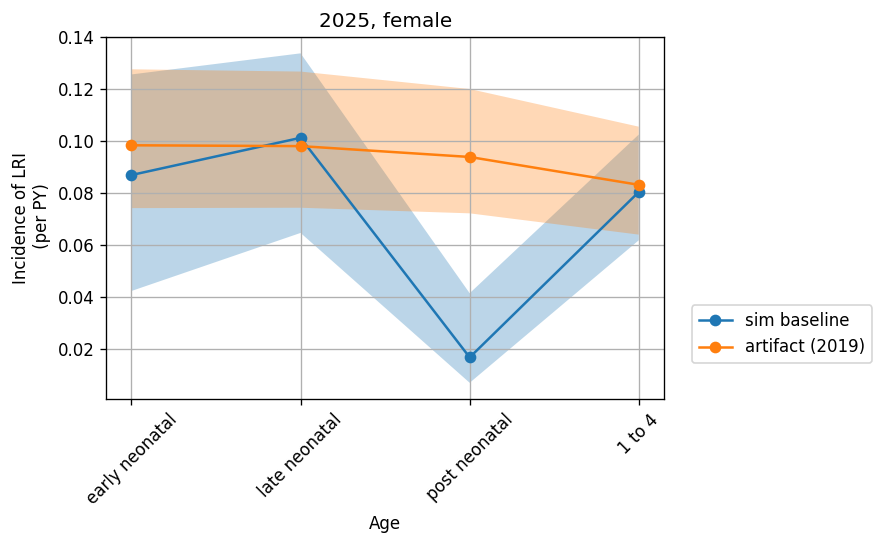

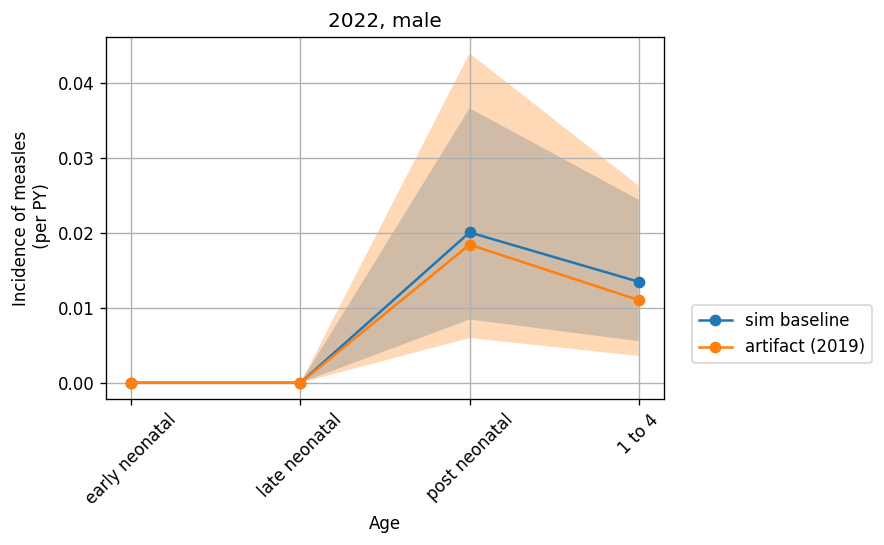

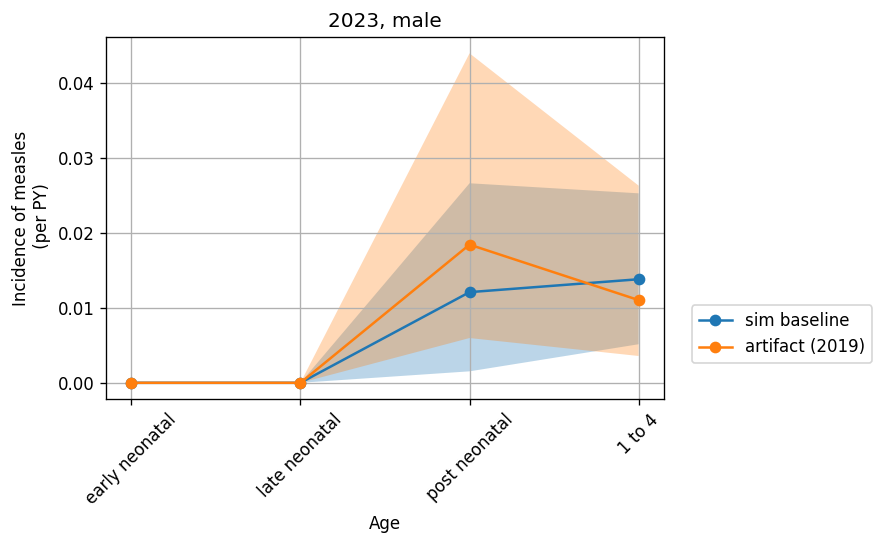

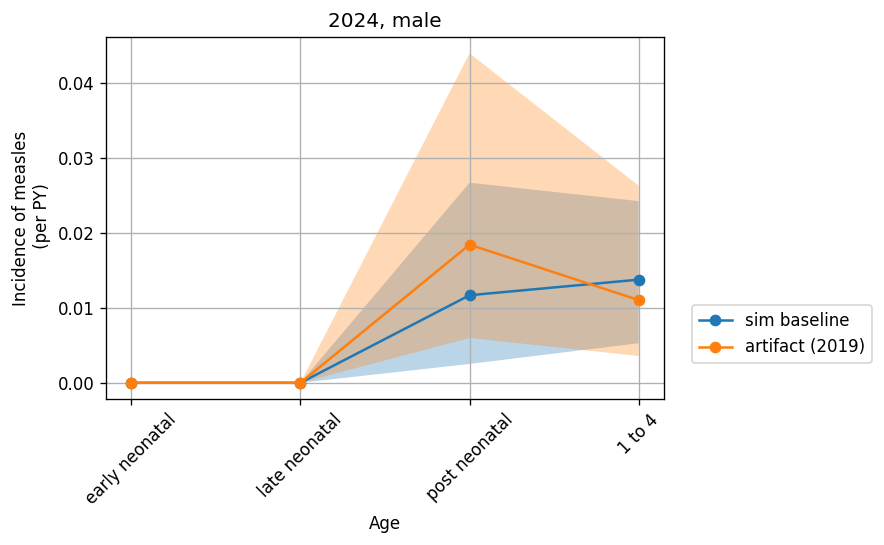

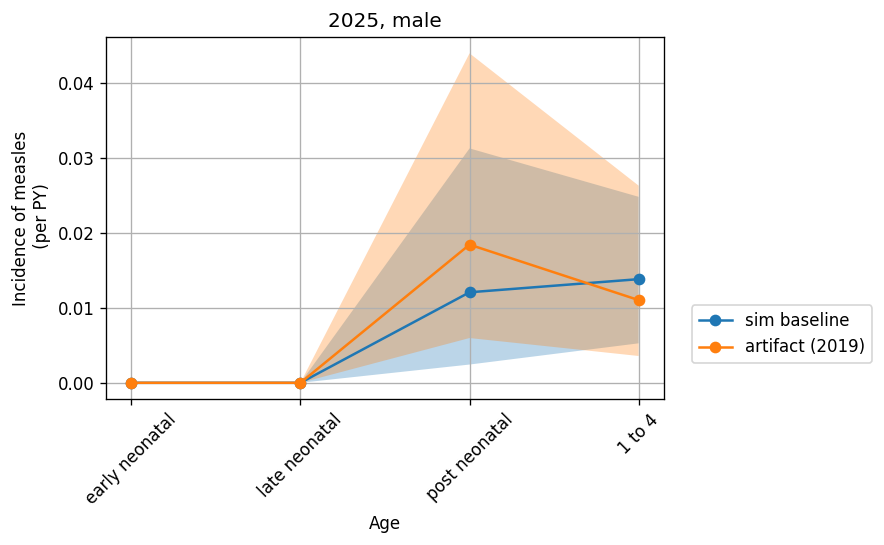

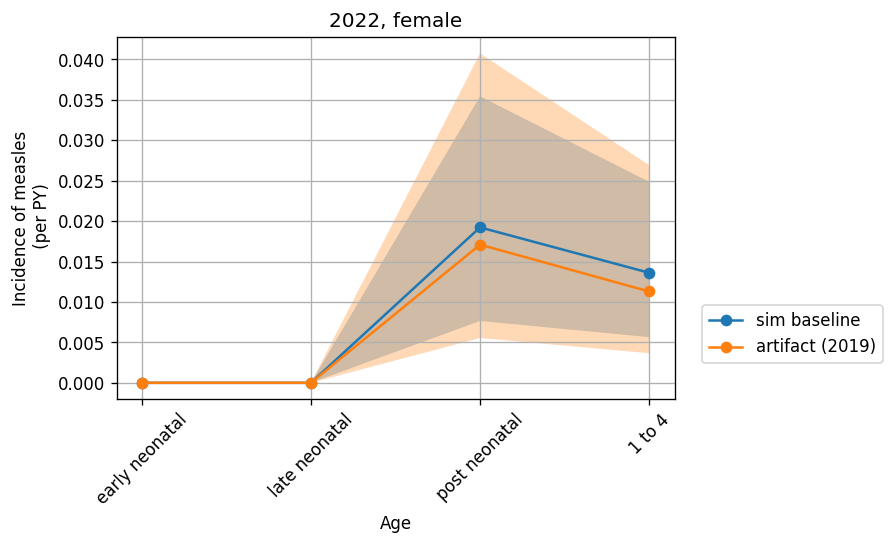

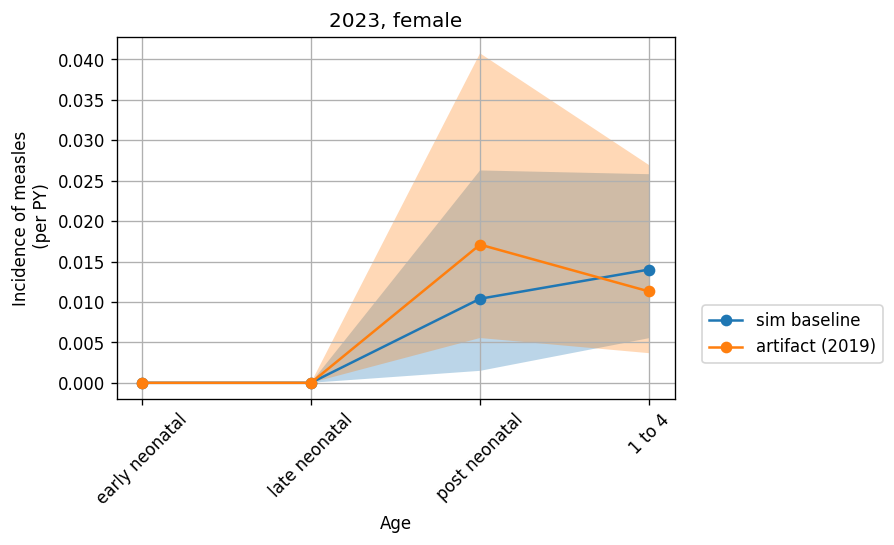

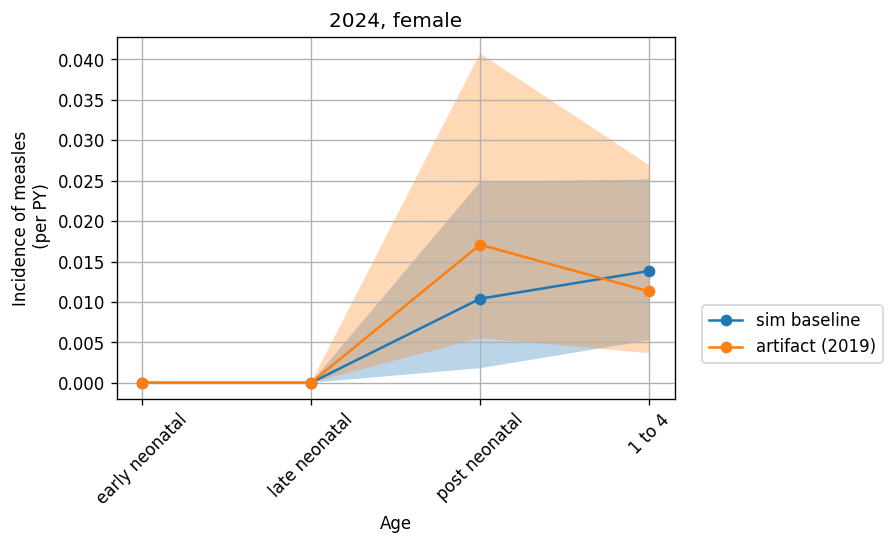

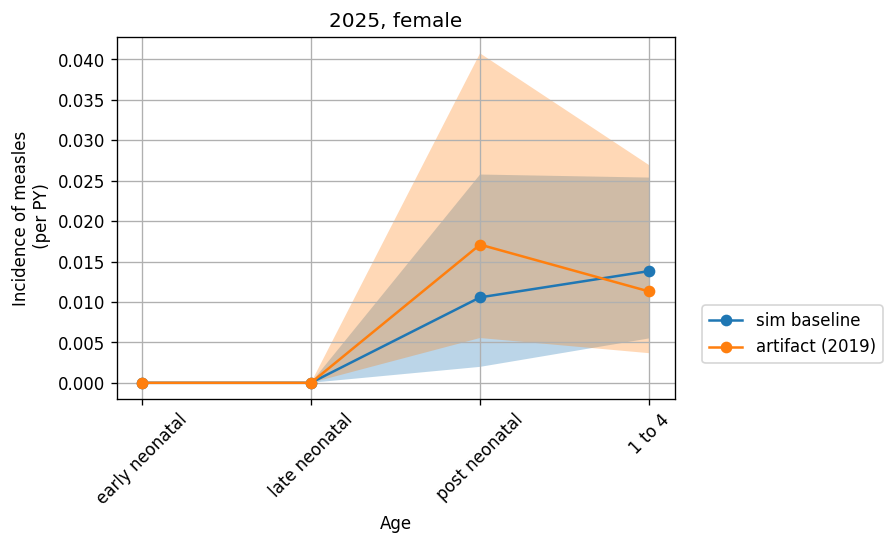

In [73]:
with PdfPages(output_dir + 'diarrhea_incidence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(incidence_dd, art_incidence_dd, sim_year, 2019, sex, 'incidence_dd')           
            pdf.savefig(bbox_inches='tight')
            
with PdfPages(output_dir + 'lri_incidence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(incidence_lri, art_incidence_lri, sim_year, 2019, sex, 'incidence_lri')
            pdf.savefig(bbox_inches='tight')
            
with PdfPages(output_dir + 'measles_incidence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(incidence_msls, art_incidence_msls, sim_year, 2019, sex, 'incidence_msls')
            pdf.savefig(bbox_inches='tight')

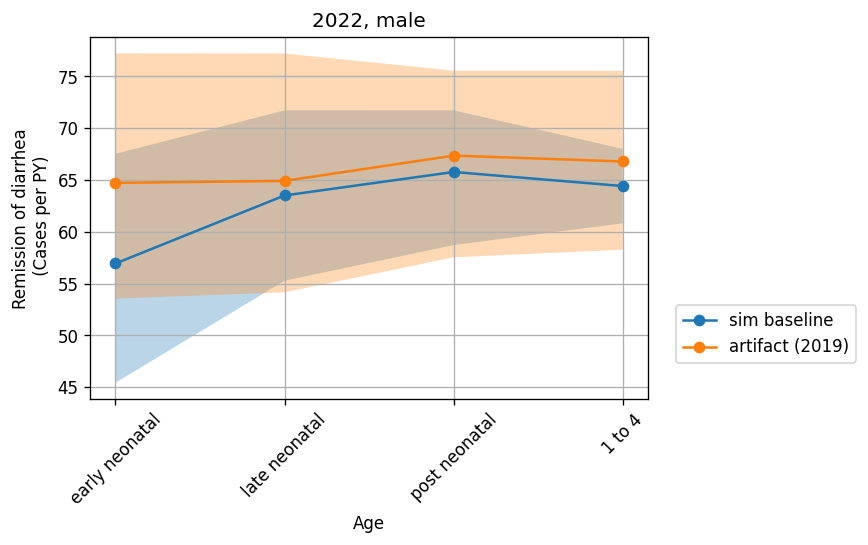

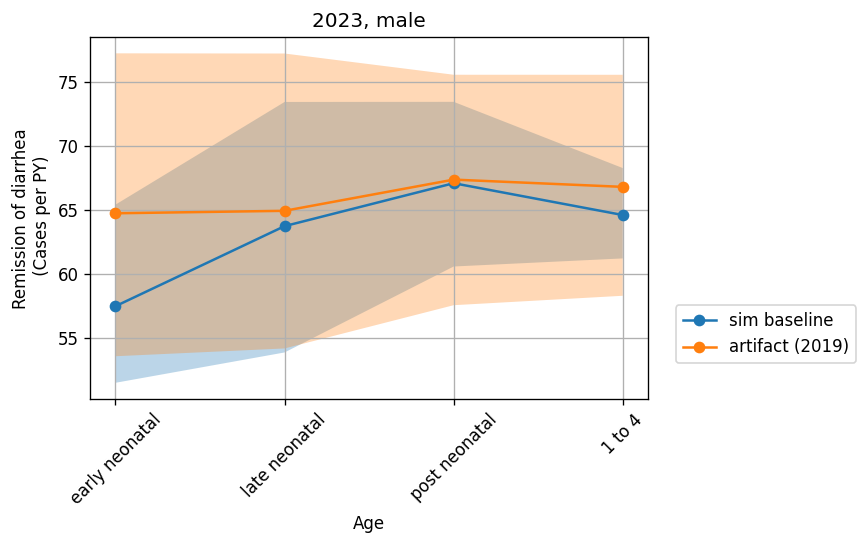

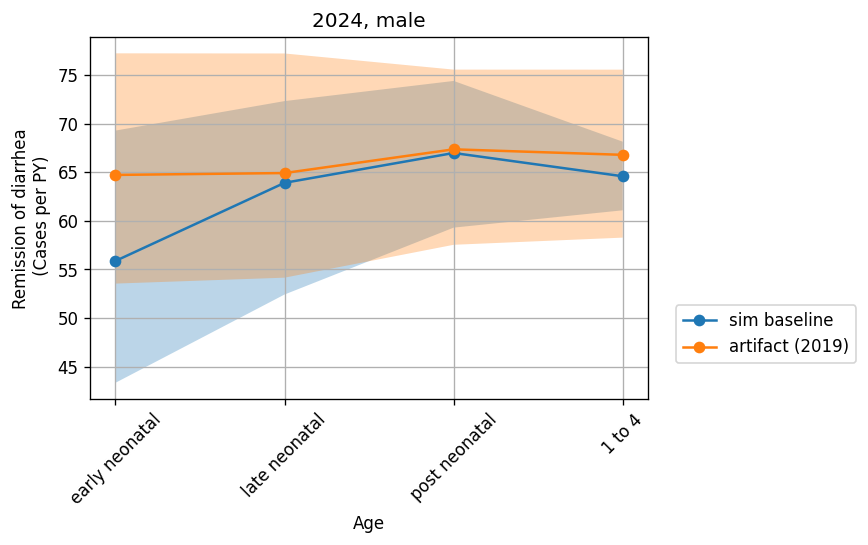

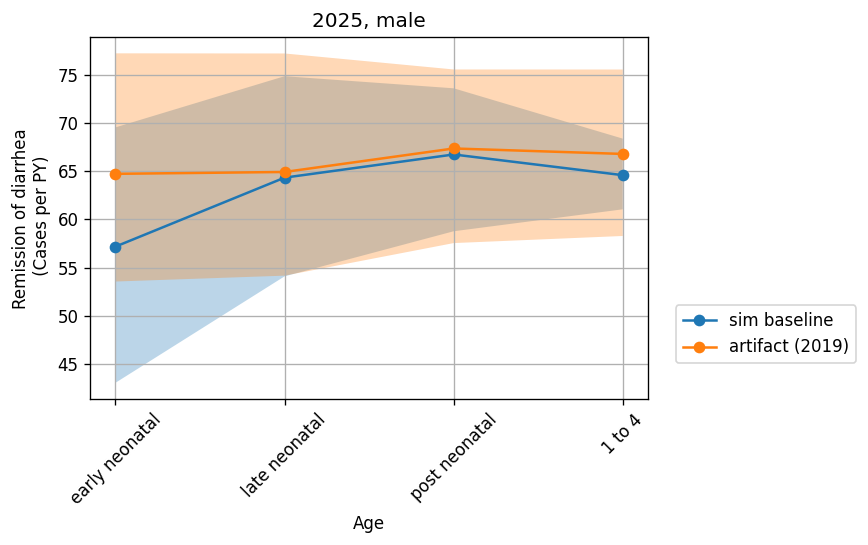

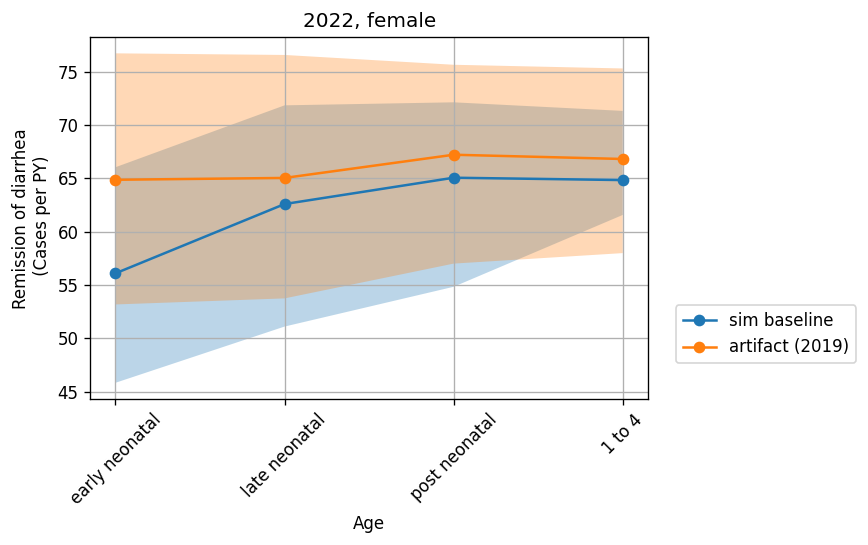

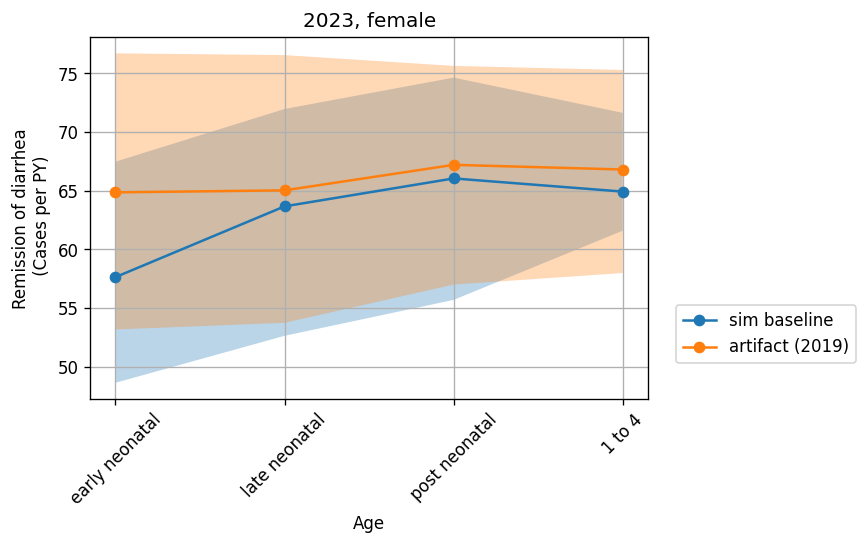

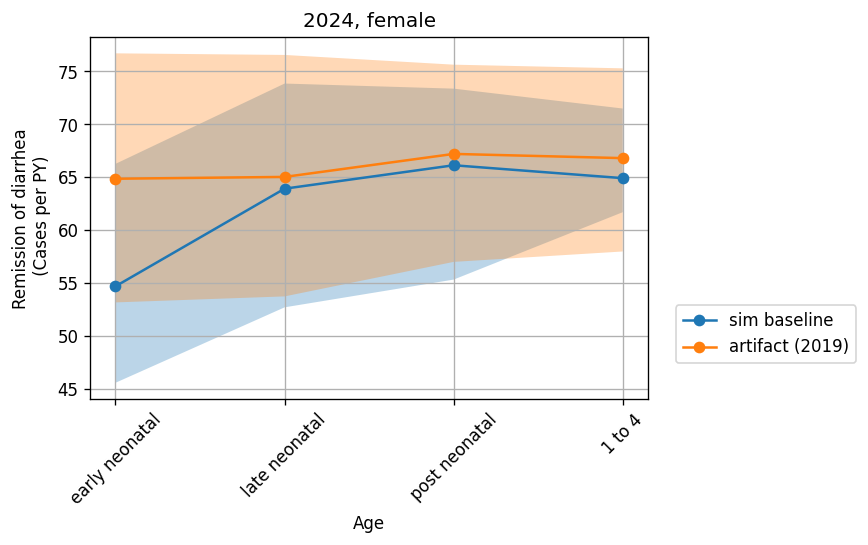

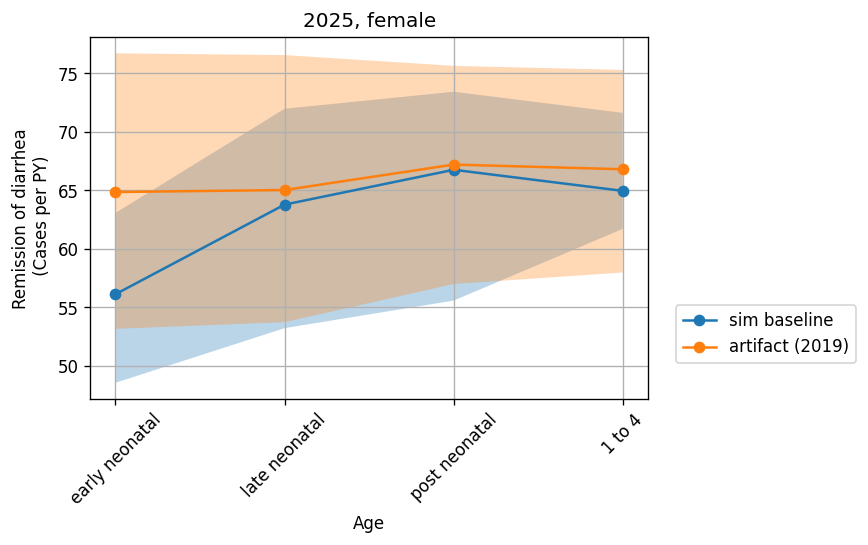

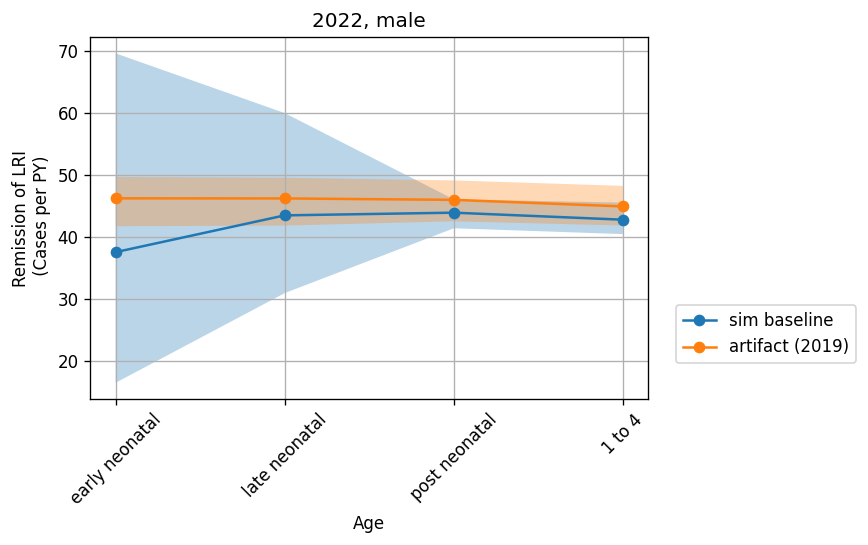

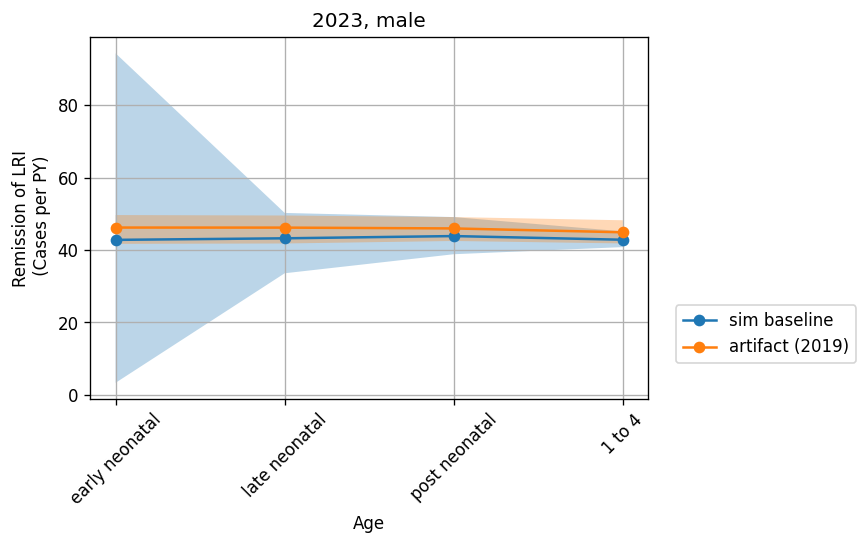

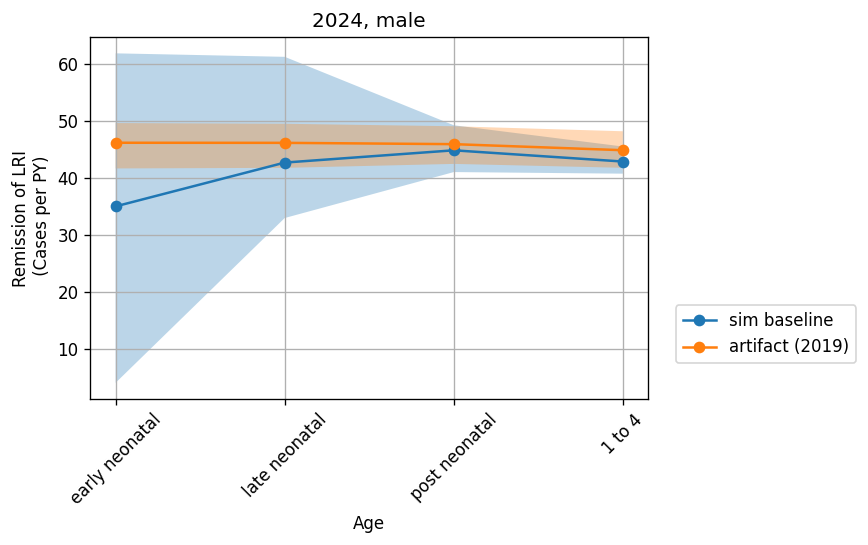

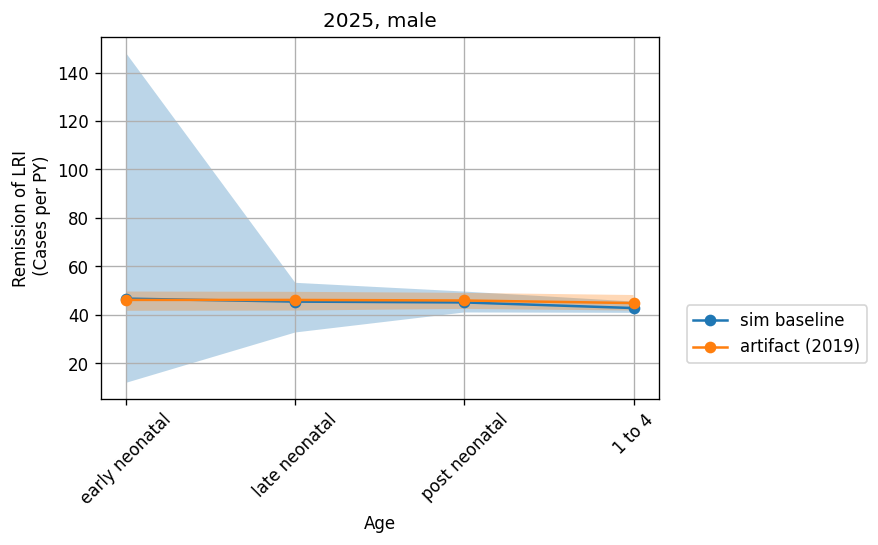

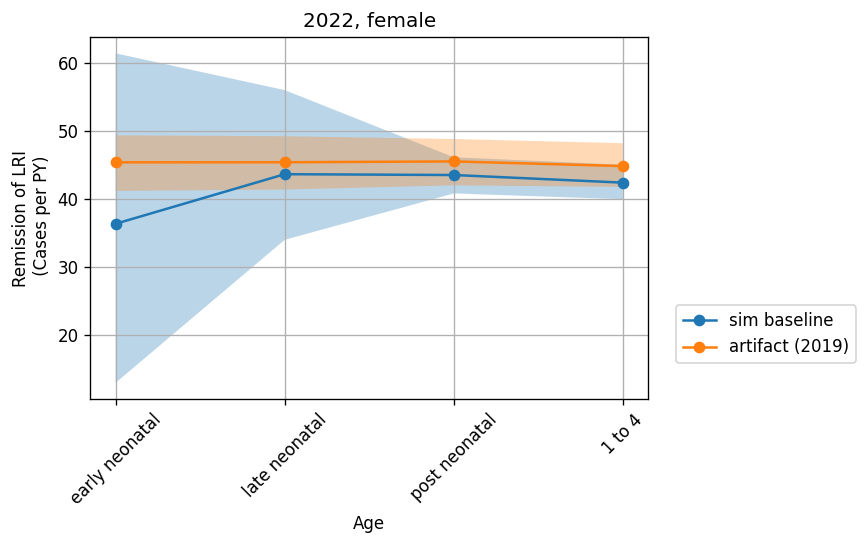

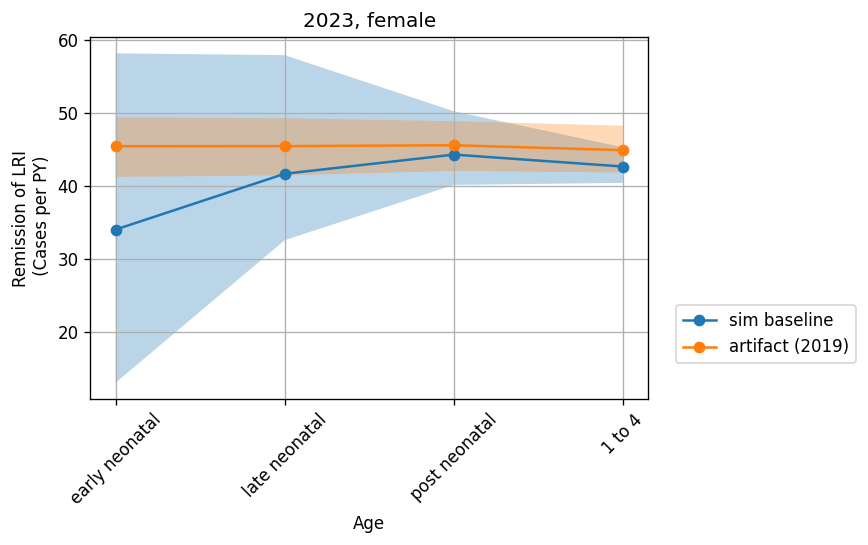

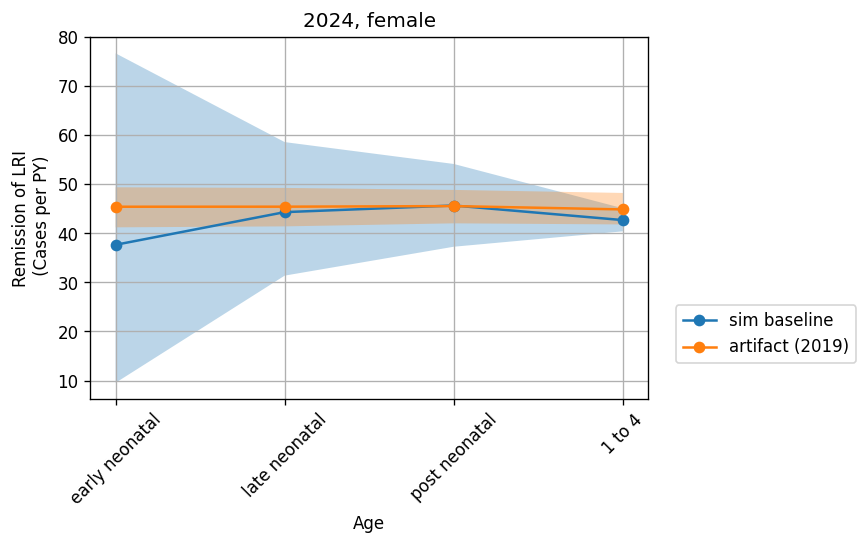

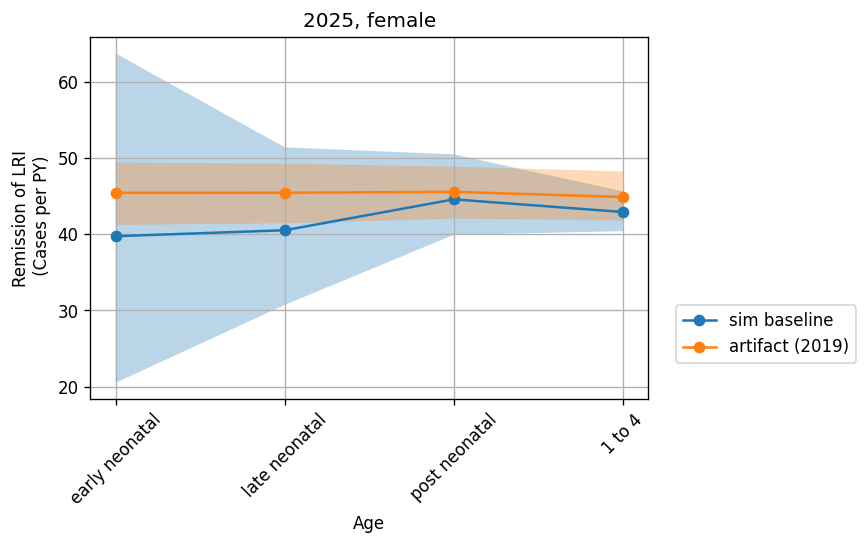

In [74]:
with PdfPages(output_dir + 'diarrhea_remission.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(remission_dd, art_remission_dd, sim_year, 2019, sex, 'remission_dd')
            pdf.savefig(bbox_inches='tight')
            
with PdfPages(output_dir + 'lri_remission.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(remission_lri, art_remission_lri, sim_year, 2019, sex, 'remission_lri')            
            pdf.savefig(bbox_inches='tight')
            
# with PdfPages(output_dir + 'measles_remission.pdf') as pdf:
#     for sex in ['male', 'female']:
#         for sim_year in range(2022, 2026):
#             plot_sim_vs_artifact(remission_msls, art_remission_msls, sim_year, 2019, sex, 'remission_msls')
#             pdf.savefig(bbox_inches='tight')

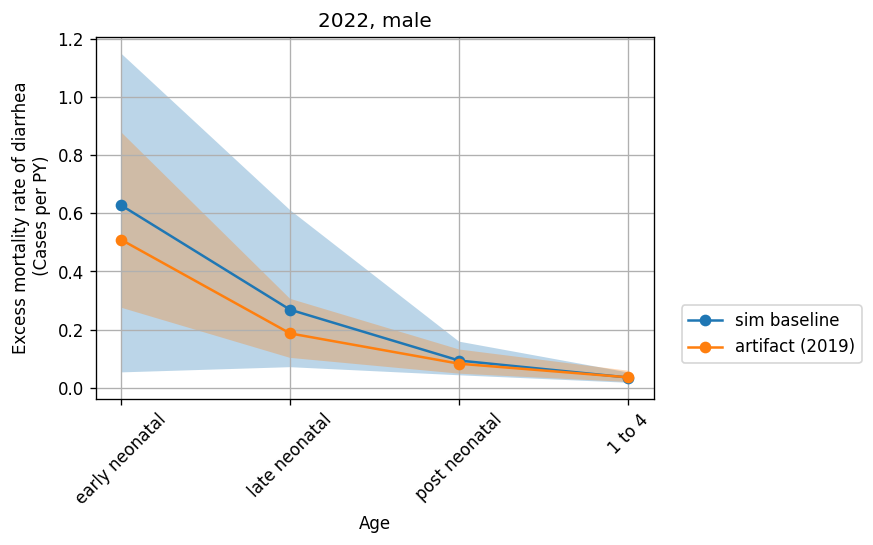

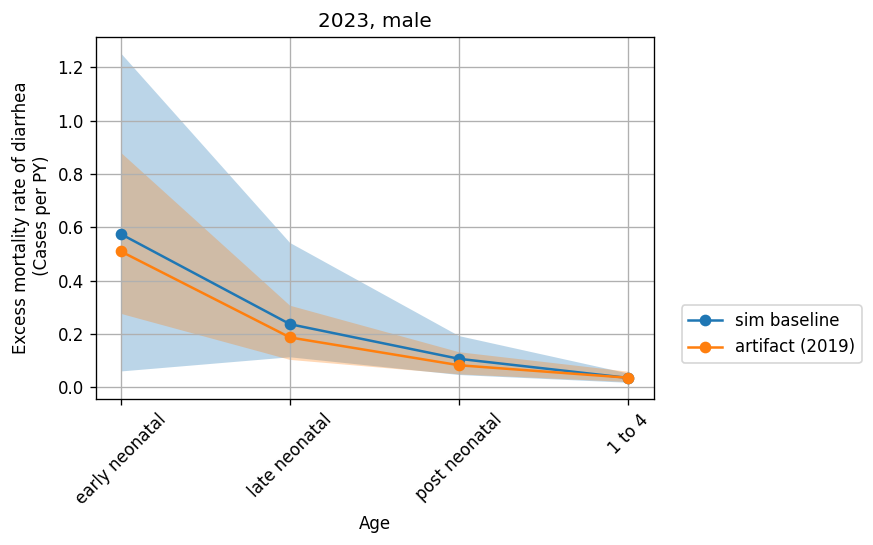

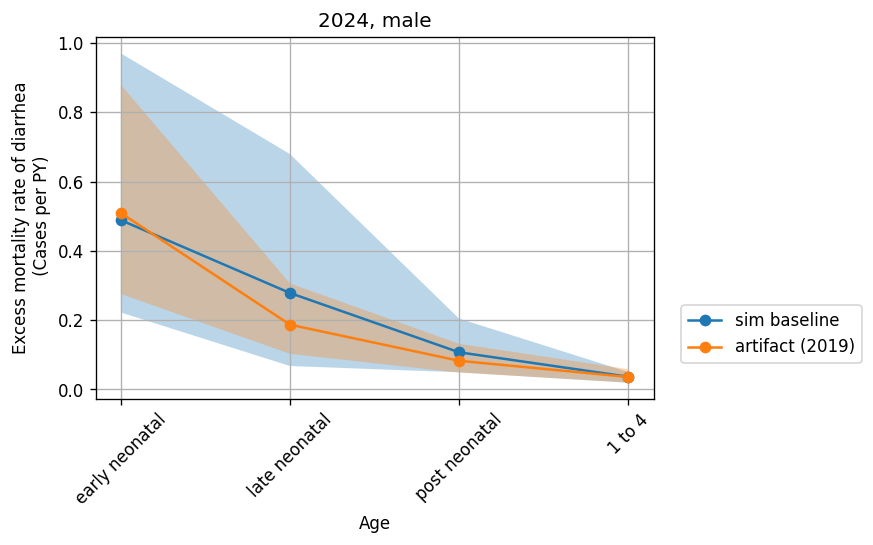

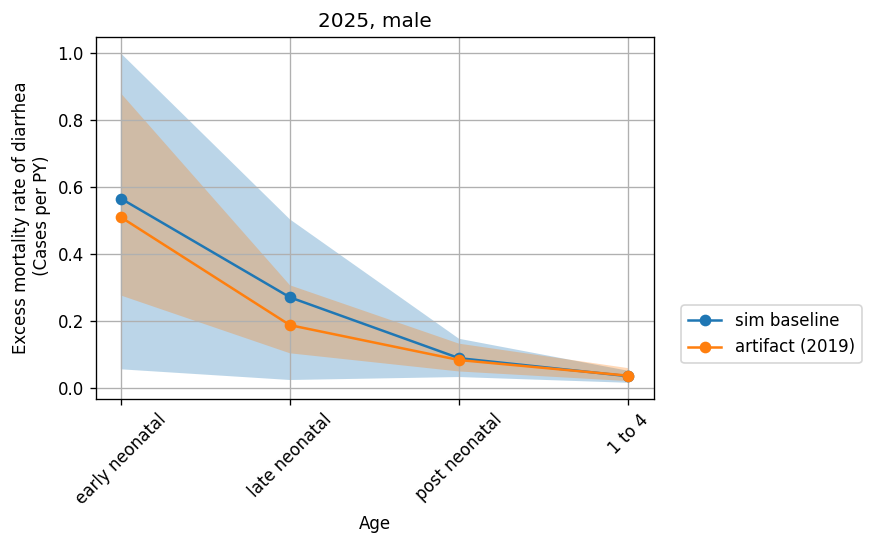

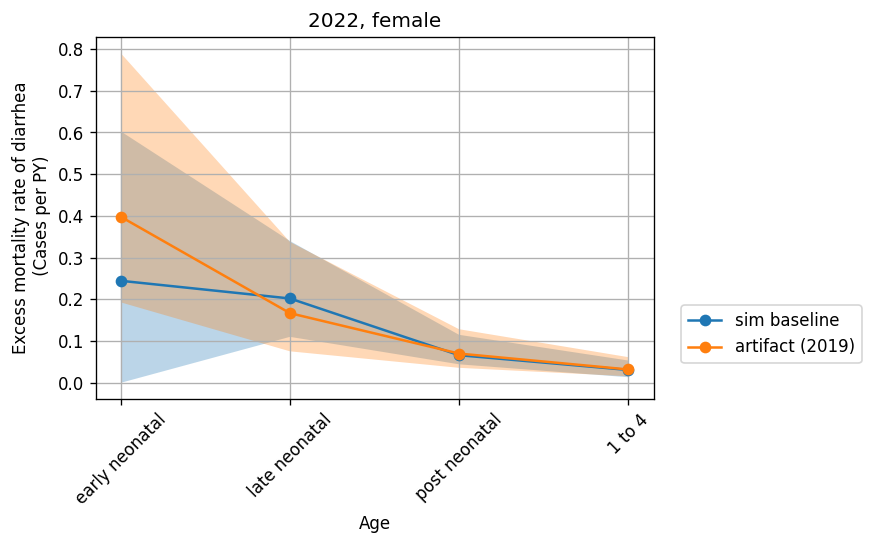

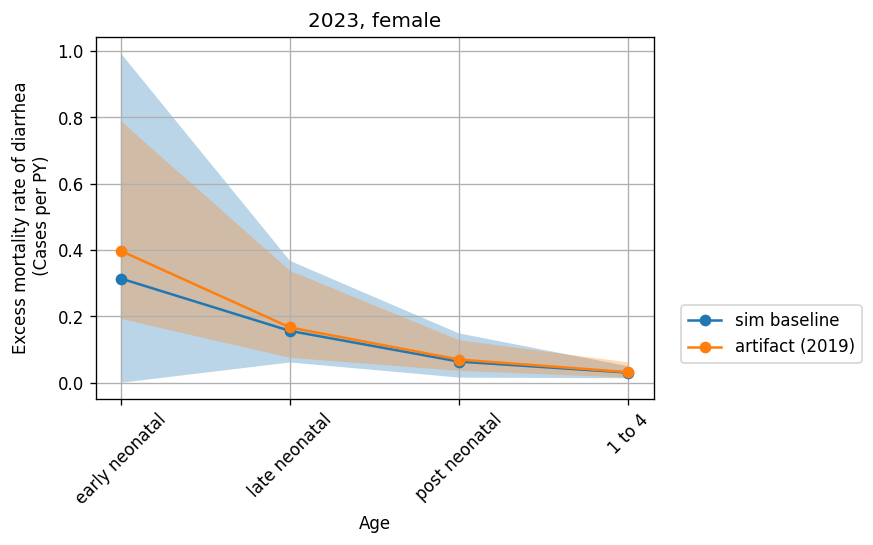

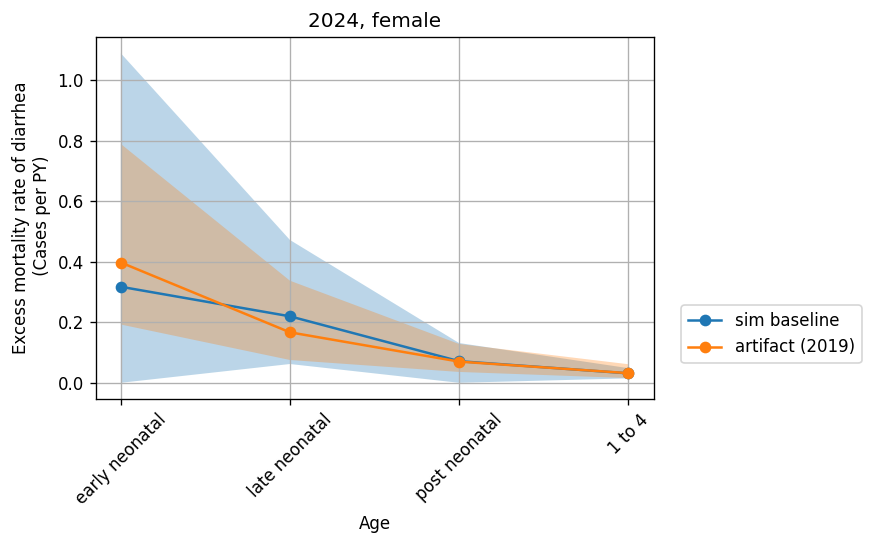

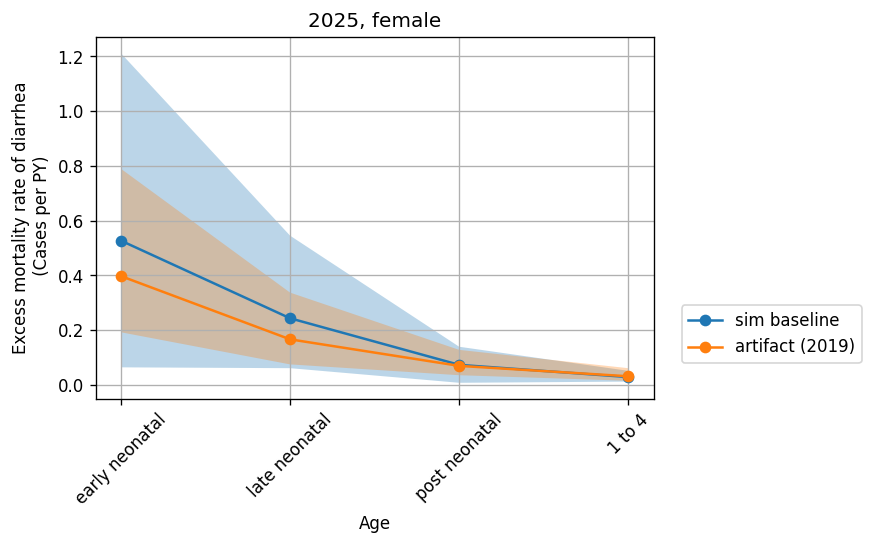

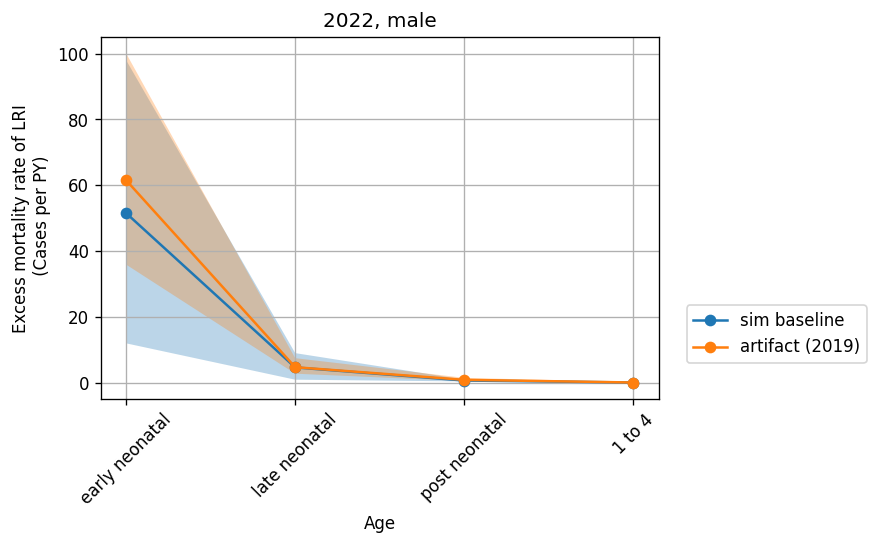

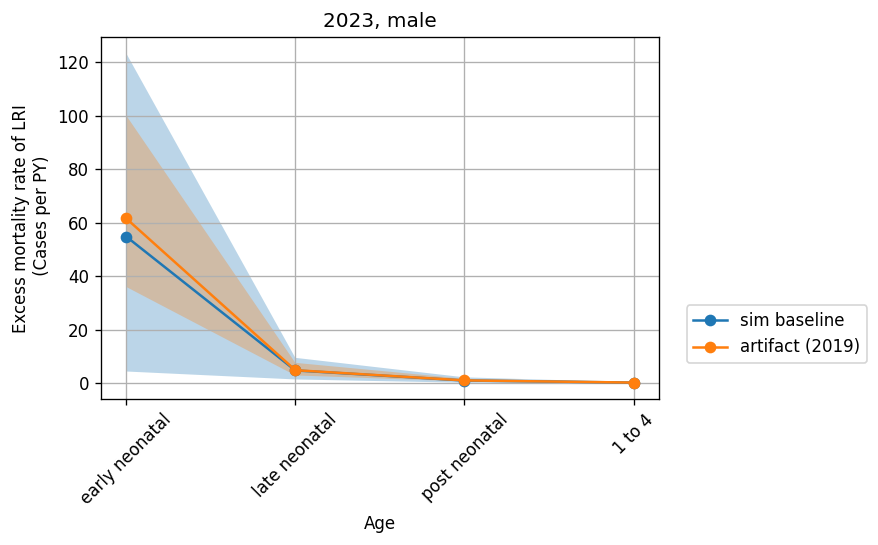

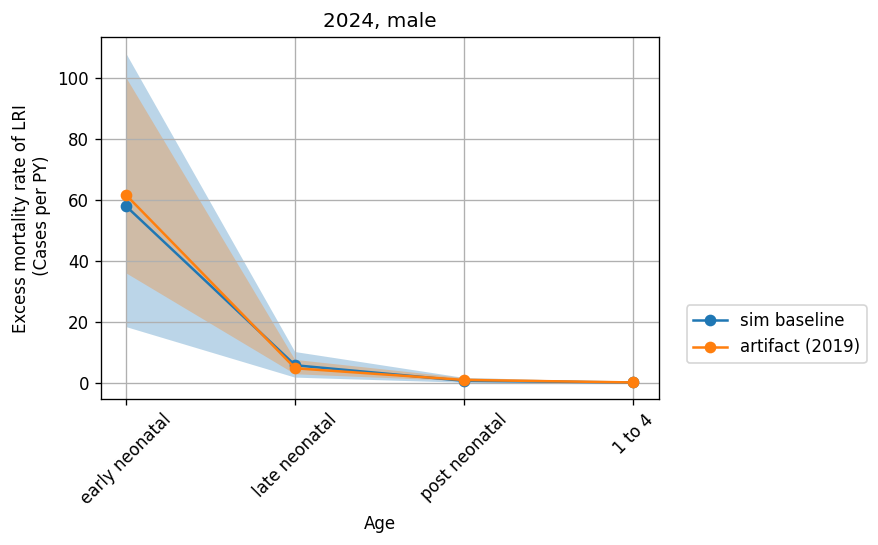

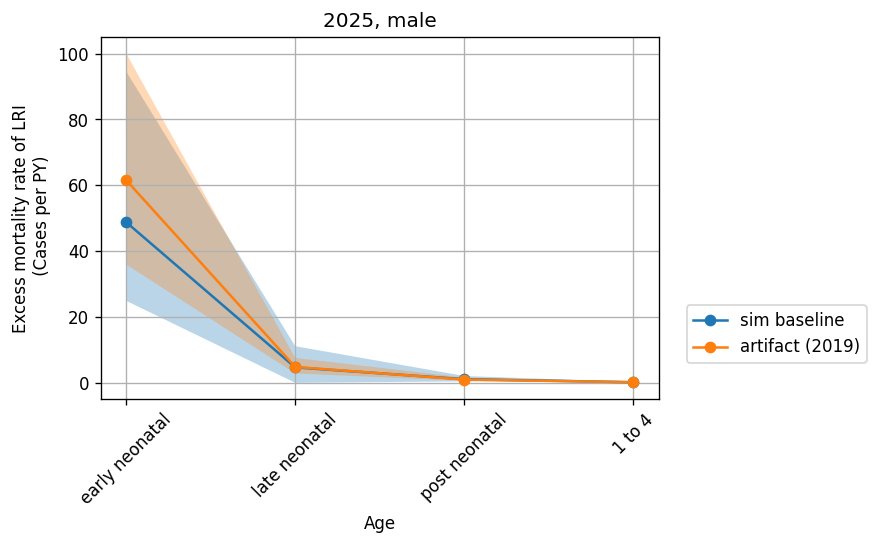

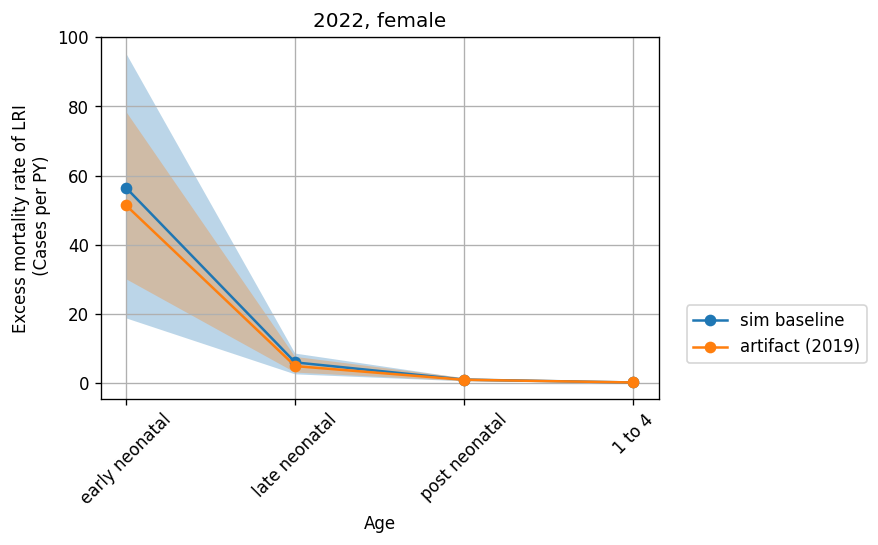

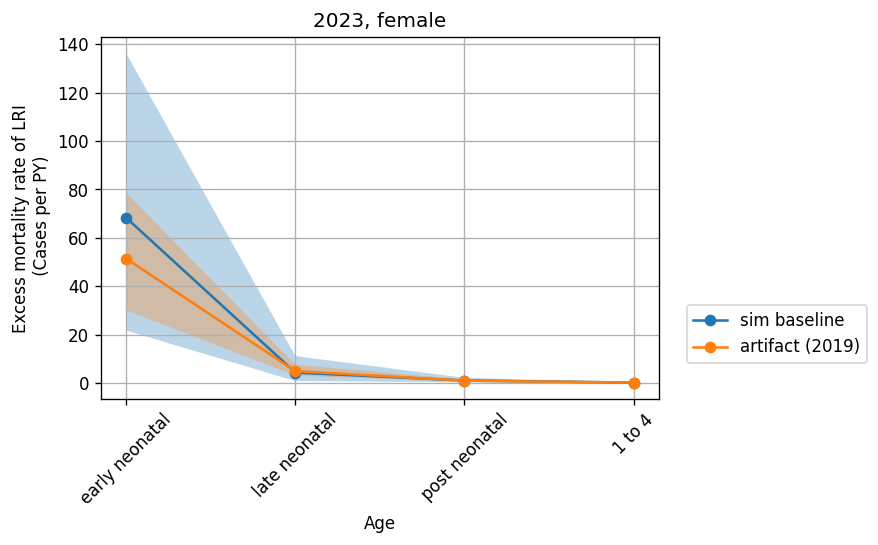

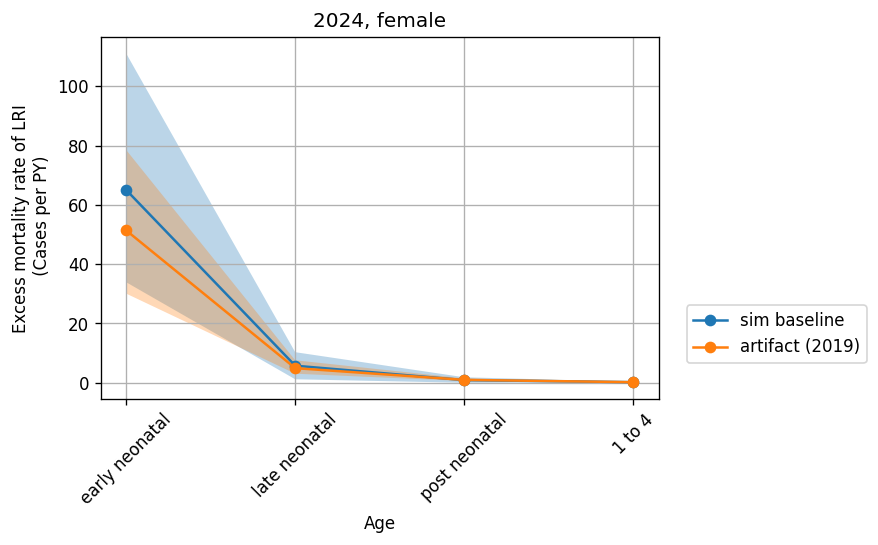

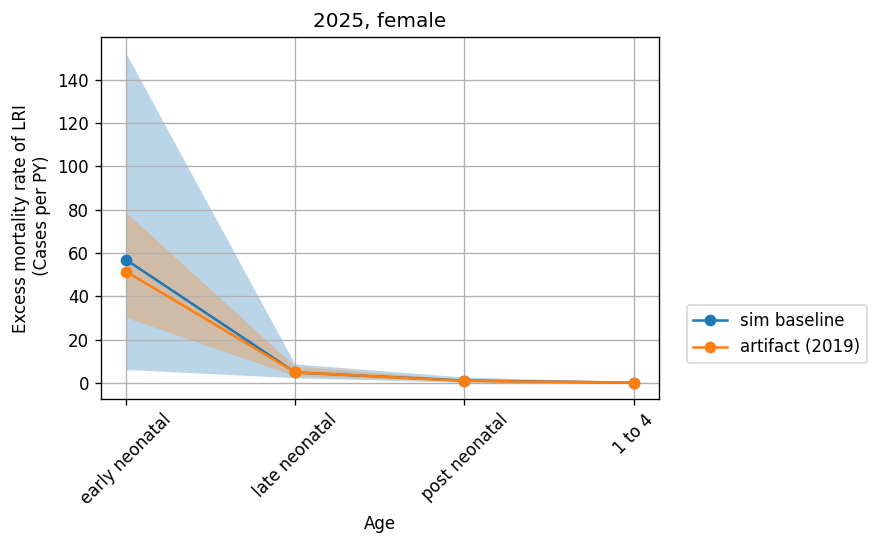

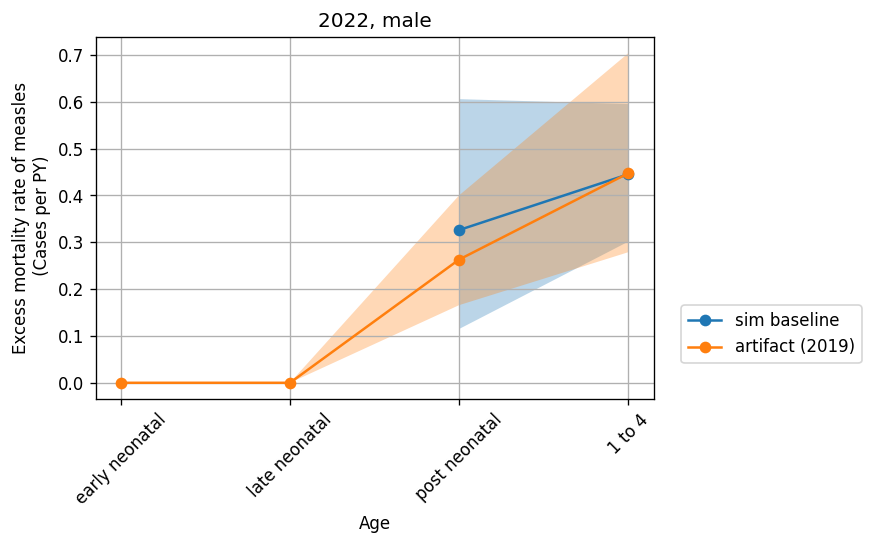

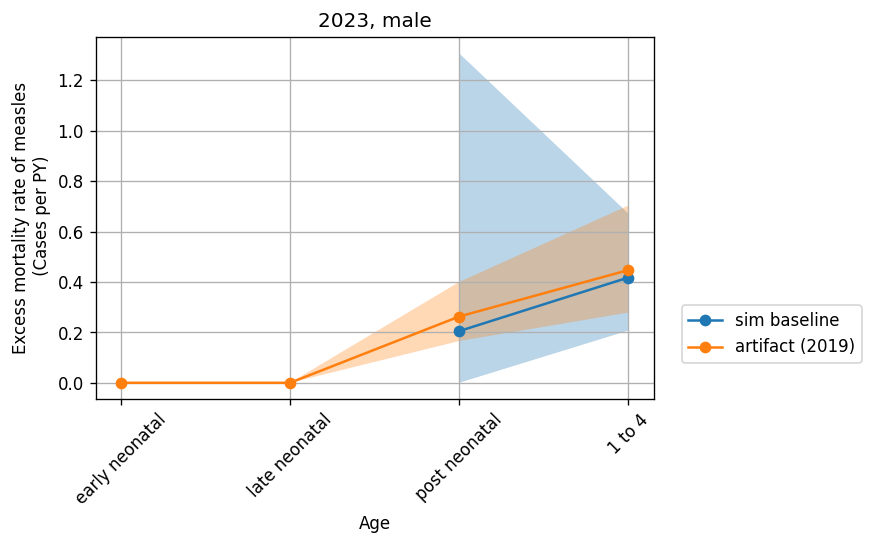

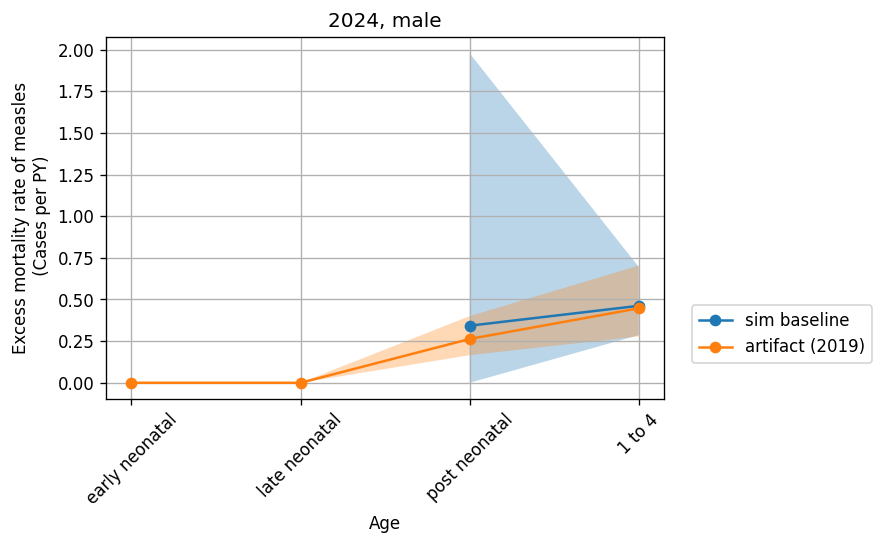

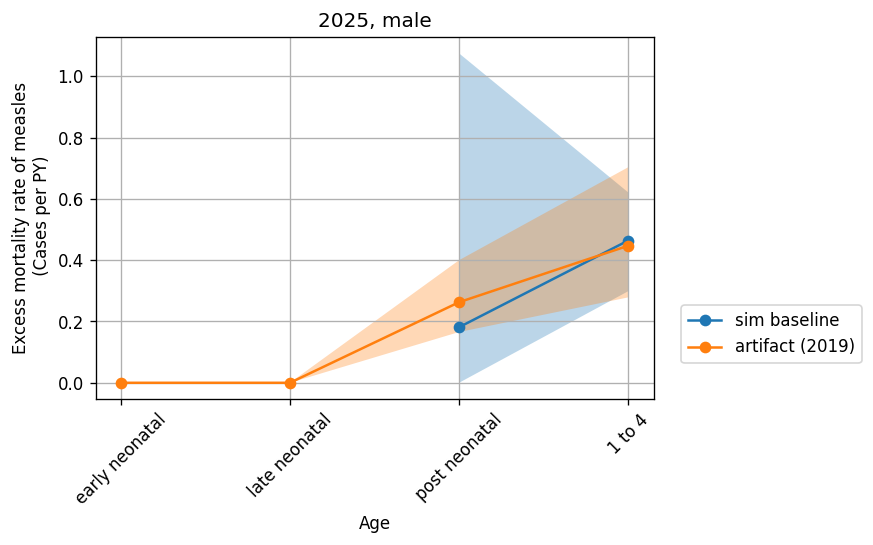

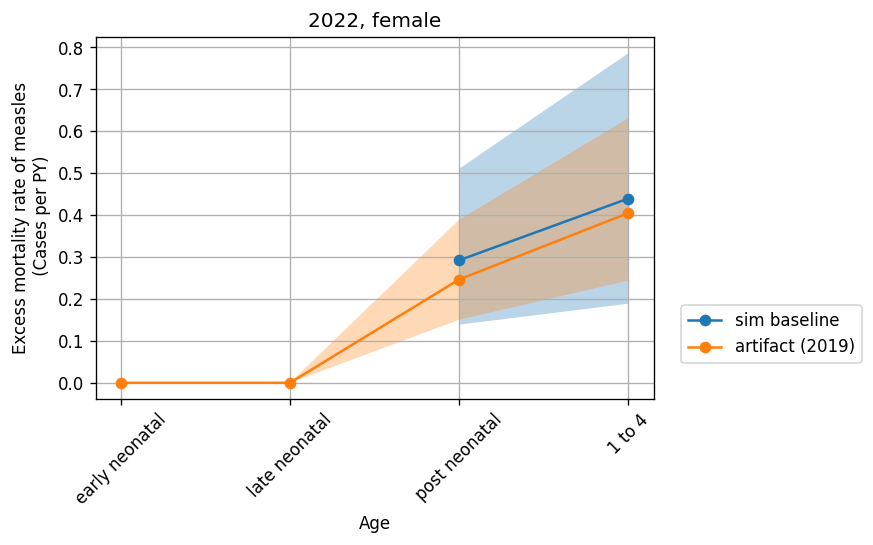

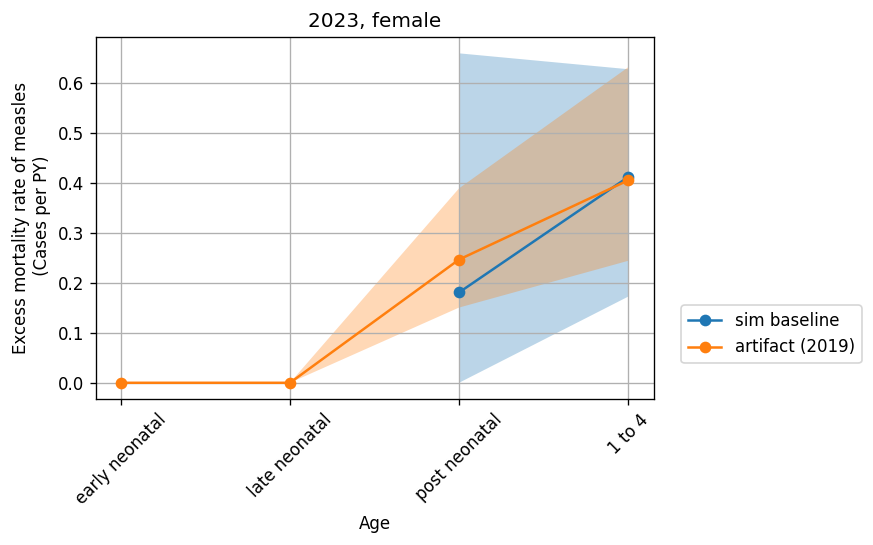

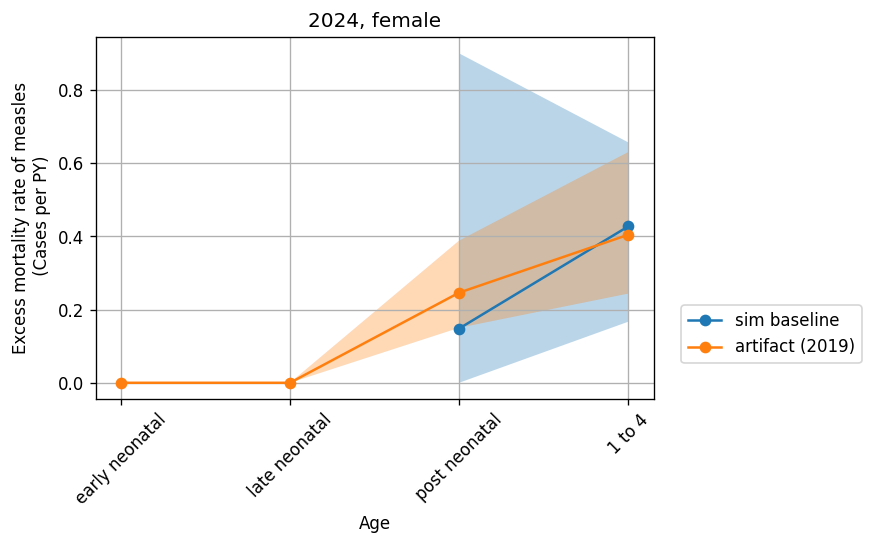

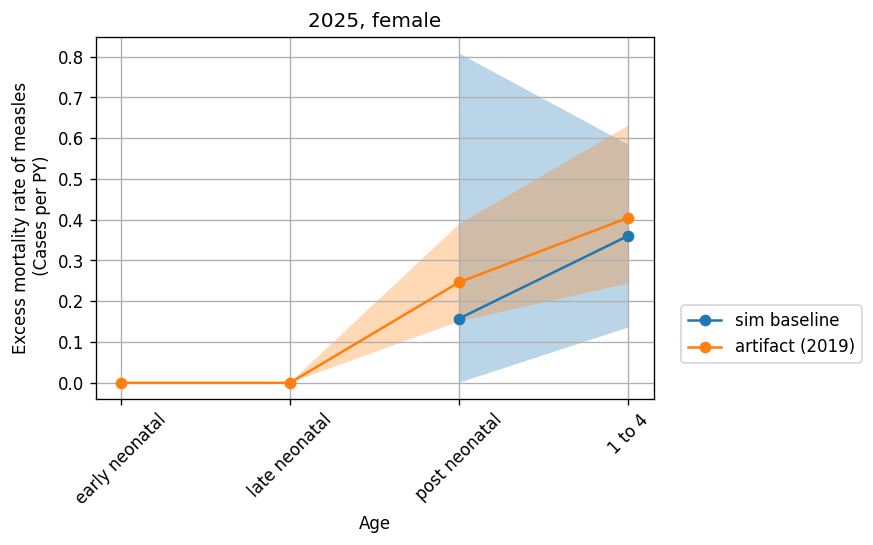

In [75]:
with PdfPages(output_dir + 'diarrhea_emr.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(emr_dd, art_emr_dd, sim_year, 2019, sex, 'emr_dd')    
            pdf.savefig(bbox_inches='tight')
            
with PdfPages(output_dir + 'lri_emr.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(emr_lri, art_emr_lri, sim_year, 2019, sex, 'emr_lri')      
            pdf.savefig(bbox_inches='tight')
            
with PdfPages(output_dir + 'measles_emr.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(emr_msls, art_emr_msls, sim_year, 2019, sex, 'emr_msls')        
            pdf.savefig(bbox_inches='tight')

================================== END ==============================================